# fun_control_init

In [ ]:
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(_L_in=64, _L_out=11, num_workers=0, device=None)
fun_control

In [ ]:
import pandas as pd

def class_attributes_to_dataframe(class_obj):
    # Get the attributes and their values of the class object
    attributes = [attr for attr in dir(class_obj) if not callable(getattr(class_obj, attr)) and not attr.startswith("__")]
    values = [getattr(class_obj, attr) for attr in attributes]
    
    # Create a DataFrame from the attributes and values
    df = pd.DataFrame({'Attribute Name': attributes, 'Attribute Value': values})
    
    return df

# Example usage:
class MyClass:
    def __init__(self):
        self.name = "John"
        self.age = 30
        self.salary = 50000

my_instance = MyClass()
df = class_attributes_to_dataframe(my_instance)
print(df)



In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
# number of initial points:
ni = 7
# number of points
n = 10

fun = analytical().fun_sphere
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=True,
            design_control=design_control,)
spot_1.run()


In [ ]:
from sys import stdout
df = spot_1.class_attributes_to_dataframe()
stdout.write(df.to_string())

In [ ]:
from river import datasets
from river import evaluate
from river.linear_model import LogisticRegression
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()

model = (
    preprocessing.StandardScaler() |
    LogisticRegression()
)

metric = metrics.Accuracy()

evaluate.progressive_val_score(dataset, model, metric)


# Load CSV

In [ ]:
from spotpython.data.csvdataset import CSVDataset
# dataset = CSVDataset(csv_file='./data/spotpython/data.csv', target_column='prognosis')
dataset = CSVDataset(target_column='prognosis')
print(dataset.data.shape)
print(dataset.targets.shape)            

In [ ]:
dataset.extra_repr()

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 3
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# CSV Data set VBDP

In [ ]:
# load the csv_file='./data/spotpython/data.csv' as a pandas df and save it as a pickle file
import pandas as pd
df = pd.read_csv('./data/spotpython/data.csv')
df.to_pickle('./data/spotpython/data.pkl')


In [ ]:
from spotpython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# PyHcf


In [ ]:
from pyhcf.data.daten_sensitive import DatenSensitive
from pyhcf.utils.names import get_short_parameter_names
daten = DatenSensitive()
df = daten.load()
names =  df.columns
names = get_short_parameter_names(names)
# rename columns with short names
df.columns = names
df.head()
# save the df as a csv file
df.to_csv('./data/spotpython/data_sensitive.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotpython/data_sensitive.pkl')
# remove all rows with NaN values
df = df.dropna()
# save the df as a csv file
df.to_csv('./data/spotpython/data_sensitive_rmNA.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotpython/data_sensitive_rmNA.pkl')


# PyHcf data loading

In [ ]:
# from spotpython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotpython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
# from spotpython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotpython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

# Pickle data loading

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset.feature_type

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Data Sensitive

In [ ]:
from spotpython.light.pkldataset import PKLDataset
import torch
dataset = PKLDataset(pkl_file='./data/spotpython/data_sensitive.pkl', target_column='A', feature_type=torch.long, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Test lightdatamodule

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
# dataset = PKLDataset(directory="./data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
print(len(dataset))

In [ ]:
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=7)

In [ ]:
data_module.setup()

In [ ]:
print(f"Training set size: {len(data_module.data_train)}")

In [ ]:
print(f"Validation set size: {len(data_module.data_val)}")

In [ ]:
print(f"Test set size: {len(data_module.data_test)}")

# Set the DataModule in fun_control 

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=7)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same with the sensitive data set

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same, but VBDO data set

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/VBDP/", filename="train.csv",target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


# load Hyperdict

In [ ]:
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
lhd = LightHyperDict()
lhd.hyper_dict
user_lhd = LightHyperDict(filename="user_hyper_dict.json", directory="./hyperdict/")
user_lhd.hyper_dict


# Diabetes data set

In [ ]:
from sklearn.datasets import load_diabetes  
import torch

# Load the diabetes dataset
feature_df, target_df = load_diabetes(return_X_y=True, as_frame=True)
feature_tensor = torch.tensor(feature_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target_df.values, dtype=torch.float32)
feature_tensor


In [ ]:
from spotpython.data.diabetes import Diabetes
dataset = Diabetes()
print(dataset.data.shape)
print(dataset.targets.shape)

# add core model to fun control

In [ ]:
from spotpython.light.netlightregressione import NetLightRegression
from spotpython.utils.init import fun_control_init
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
fun_control["core_model"].__name__

In [ ]:
# check if the fun_control["core_model_hyper_dict"] is a LightHyperDict
isinstance(fun_control["core_model_hyper_dict"], dict)

# test check_X_shape

In [ ]:
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)





# Test hyperlight fun

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.fun.hyperlight import HyperLight
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                    key="data_set",
                    value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
X = np.vstack((X, X))
y = hyper_light.fun(X, fun_control)
y


# test  NetLightRegression Class

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader)) 
print(batch_x.shape)
print(batch_y.shape)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=0.1,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)


# tests optimizer_handler

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L

BATCH_SIZE = 8
lr_mult=0.1

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adam uses a lr which is calculated as lr=lr_mult * 0.001, so this value
# should be 0.1 * 0.001 = 0.0001 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*0.001


net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adadelta', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adadelta uses a lr which is calculated as lr=lr_mult * 1.0, so this value
# should be 1.0 * 0.1 = 0.1 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*1.0


# Test train_model

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotpython.light.traintest import train_model, test_model
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
var_dict = assign_values(X, get_var_name(fun_control))
for config in generate_one_config_from_var_dict(var_dict, fun_control):
    y_train = train_model(config, fun_control)
    y_test = test_model(config, fun_control)
    break
print(y_train)
print(y_test[0])


In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotpython.light.traintest import test_model


def test_traintest_test_model():
    fun_control = fun_control_init(
        _L_in=10,
        _L_out=1,)

    dataset = Diabetes()
    set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

    add_core_model_to_fun_control(core_model=NetLightRegression,
                                fun_control=fun_control,
                                hyper_dict=LightHyperDict)
    X = get_default_hyperparameters_as_array(fun_control)
    var_dict = assign_values(X, get_var_name(fun_control))
    for vals in generate_one_config_from_var_dict(var_dict, fun_control):
        y_test = test_model(test_config=vals,
                            fun_control=fun_control)
        break
    # check if y is a float

# test getVarName()

In [ ]:
from spotpython.hyperparameters.values import get_var_name
fun_control = {"core_model_hyper_dict":{
            "leaf_prediction": {
                "levels": ["mean", "model", "adaptive"],
                "type": "factor",
                "default": "mean",
                "core_model_parameter_type": "str"},
            "leaf_model": {
                "levels": ["linear_model.LinearRegression", "linear_model.PARegressor", "linear_model.Perceptron"],
                "type": "factor",
                "default": "LinearRegression",
                "core_model_parameter_type": "instance"},
            "splitter": {
                "levels": ["EBSTSplitter", "TEBSTSplitter", "QOSplitter"],
                "type": "factor",
                "default": "EBSTSplitter",
                "core_model_parameter_type": "instance()"},
            "binary_split": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"},
            "stop_mem_management": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"}}}
len(get_var_name(fun_control))

# Test netlightregression

In [ ]:
import torch
import numpy as np
from spotpython.spot import spot
from math import inf
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
from spotpython.utils.device import getDevice
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.pkldataset import PKLDataset
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import modify_hyper_parameter_bounds
from spotpython.hyperparameters.values import modify_hyper_parameter_levels
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import (get_bound_values,
    get_var_name,
    get_var_type,)
from spotpython.utils.eda import gen_design_table
from spotpython.hyperparameters.values import get_tuned_architecture
from spotpython.light.testmodel import test_model
from spotpython.light.loadmodel import load_light_from_checkpoint

MAX_TIME = 1
INIT_SIZE = 5
WORKERS = 0
PREFIX="031"

experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    num_workers=WORKERS,
    device=getDevice(),
    _L_in=133,
    _L_out=1,
    TENSORBOARD_CLEAN=True)

dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)



add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
modify_hyper_parameter_bounds(fun_control, "l1", bounds=[5,8])
modify_hyper_parameter_bounds(fun_control, "epochs", bounds=[3,5])
modify_hyper_parameter_bounds(fun_control, "batch_size", bounds=[2, 8])
modify_hyper_parameter_levels(fun_control, "optimizer",["Adam", "AdamW", "Adamax", "NAdam"])

print(gen_design_table(fun_control))

var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
lower = get_bound_values(fun_control, "lower")
upper = get_bound_values(fun_control, "upper")
fun = HyperLight(log_level=50).fun
spot_tuner = spot.Spot(fun=fun,
                       log_level=50,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   max_time = MAX_TIME,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type = var_type,
                   var_name = var_name,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": INIT_SIZE},
                   surrogate_control={"noise": True,
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": len(var_name),
                                      "model_fun_evals": 10_000,
                                      })
spot_tuner.run()

In [ ]:
spot_tuner.plot_progress(log_y=False, filename=None)

In [ ]:
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

In [ ]:
spot_tuner.plot_importance(threshold=0.025, filename=None)

In [ ]:
config = get_tuned_architecture(spot_tuner, fun_control)
print(config)

In [ ]:
test_model(config, fun_control)

In [ ]:
model_loaded = load_light_from_checkpoint(config, fun_control)

In [ ]:
model_loaded

In [ ]:
spot_tuner.plot_important_hyperparameter_contour(filename=None)

In [ ]:
spot_tuner.parallel_plot()

In [ ]:
from spotpython.light.cvmodel import cv_model
# set the number of folds to 10
fun_control["k_folds"] = 10
cv_model(config, fun_control)

# fun

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
y = np.array([1, 2, 3, 4, 5])
fun = analytical(sigma=1.0, seed=123)
fun.add_noise(y)


In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
print(np.array([1, 2, 3, 4, 5]))



In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(seed=4321, sigma=0.1)
fun = analytical(seed=222, sigma=0.0).fun_sphere

In [ ]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-10]),
                   upper = np.array([100]),
                   fun_evals = 100,
                   fun_repeats = 3,
                   max_time = inf,
                   noise = True,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=["num"],
                   infill_criterion = "y",
                   n_points = 1,
                   seed=111,
                   log_level = 10,
                   show_models=False,
                   fun_control = fun_control,
                   design_control={"init_size": 5,
                                   "repeats": 1},
                   surrogate_control={"noise": True,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 1,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })
spot_1.run()

In [ ]:
import numpy as np
def squared_euclidean_distance(X_0, X, theta):
    return np.sum(theta*(X_0 - X)**2)

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0, 1.0])
X = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
print(X.shape)
X

In [ ]:
build_Psi(X, theta)

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
X = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 2]])
fun = analytical()
fun.fun_branin_factor(X)

In [ ]:
import numpy as np
pi = np.pi
X = np.array([[0,0], [-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
fun = analytical()
fun.fun_branin(X)

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
pi = np.pi
X_0 = np.array([[0, 0]])
X_1 = np.array([[-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
X_2 = np.array([[0,0,0], [0,0,1], [0,0,2]])
fun = analytical()
y_0 = fun.fun_branin(X_0)
y_1 = fun.fun_branin(X_1)
y_2 = fun.fun_branin_factor(X_2)

In [ ]:
round(y_1[0], 2) == round(y_1[1],2)


In [ ]:

round(y_1[0], 2) == round(y_1[2],2)


In [ ]:

y_2[0] == y_0


In [ ]:

y_2[1] == y_0 + 10


In [ ]:

y_2[2] == y_0 - 10


In [ ]:
from numpy.random import multivariate_normal
import numpy as np
n = 100
X = np.linspace(0, 10, n, endpoint=False).reshape(-1,1)
X.shape

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0])
Psi = build_Psi(X, theta)
np.round(Psi[:3,:], 3)

In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = (3, 1, 1), check_valid="raise")
Y.shape

In [ ]:
# convert Y to a 3 x 100 array
Y = np.squeeze(Y)
Y.shape
Y

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)


In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = 3, check_valid="raise")
Y.shape

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)

# Data Loader

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

## Test HyperLight

In [ ]:
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (add_core_model_to_fun_control,
    get_default_hyperparameters_as_array)
from spotpython.fun.hyperlight import HyperLight
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
# so that two values are returned
X = np.vstack((X, X))
hyper_light.fun(X, fun_control)


## test pkldataset

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/",
                    filename="data_sensitive.pkl",
                    target_column='N',
                    feature_type=torch.float32,
                    target_type=torch.float32,
                    rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

In [ ]:
import pytest
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_bound_values
from spotpython.hyperparameters.values import get_control_key_value, set_control_key_value
from spotpython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
set_control_key_value(control_dict=fun_control, key="var_type", value=["int", "float", "str"], replace=True)
set_control_key_value(control_dict=fun_control, key="var_name", value=["max_depth", "learning_rate", "model_type"], replace=True)

print(fun_control)

# Test with existing var_name
assert get_var_type_from_var_name(var_name="max_depth", fun_control=fun_control) == "int"
assert get_var_type_from_var_name(var_name="learning_rate", fun_control=fun_control) == "float"
assert get_var_type_from_var_name(var_name="model_type", fun_control=fun_control) == "str"

# Test with non-existing var_name
with pytest.raises(ValueError):
    get_var_type_from_var_name(var_name="non_existing", fun_control=fun_control)

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_control_key_value
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
var_type = get_control_key_value(control_dict=fun_control, key="var_type")
var_name = get_control_key_value(control_dict=fun_control, key="var_name")
print(var_type)
print(var_name)
vn = "l1"
get_var_type_from_var_name(fun_control=fun_control, var_name=vn)

assert var_type[var_name.index(vn)] == "int"
assert get_var_type_from_var_name(fun_control, vn) == "int"
vn = "initialization"
assert var_type[var_name.index(vn)] == "factor"
assert var_type[var_name.index(vn)] == "factor"

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_control_key_value
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import set_control_hyperparameter_value

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="l1", value=[1,7])
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="initialization", value=["xavier2", "kaiming2"])
print(fun_control)


## get names

In [ ]:
def get_entry(dictionary, key, i):
    if key in dictionary:
        if 'levels' in dictionary[key]:
            if i < len(dictionary[key]['levels']):
                return dictionary[key]['levels'][i]
    return None

In [ ]:
import torch
from spotpython.data.pkldataset_intern import PKLDataset
from spotpython.utils.device import getDevice
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.utils.eda import gen_design_table
from math import inf

MAX_TIME = 60
FUN_EVALS = inf
INIT_SIZE = 25
WORKERS = 0
PREFIX="031"
DEVICE = getDevice()


experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=DEVICE,
    enable_progress_bar=False,
    fun_evals=FUN_EVALS,
    log_level=10,
    max_time=MAX_TIME,
    num_workers=WORKERS,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )

dataset = Diabetes()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True, rmMF=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)

set_control_key_value(control_dict=fun_control,
                        key="_L_in",
                        value=133,
                        replace=True)


add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
# from spotpython.hyperparameters.values import modify_hyper_parameter_bounds

from spotpython.hyperparameters.values import set_control_hyperparameter_value
set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "epochs", [4,9])
set_control_hyperparameter_value(fun_control, "batch_size", [1, 4])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])

In [ ]:
fun_control

In [ ]:
def get_entry(dictionary, key, i):
    if 'core_model_hyper_dict' in dictionary:
        if key in dictionary['core_model_hyper_dict']:
            if 'levels' in dictionary['core_model_hyper_dict'][key]:
                if i < len(dictionary['core_model_hyper_dict'][key]['levels']):
                    return dictionary['core_model_hyper_dict'][key]['levels'][i]
    return None
print(get_entry(fun_control, "optimizer", 0)) 

In [ ]:
from spotpython.utils.device import getDevice
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import get_ith_hyperparameter_name_from_fun_control
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import set_control_hyperparameter_value
experiment_name = get_experiment_name(prefix="000")
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=getDevice(),
    enable_progress_bar=False,
    fun_evals=15,
    log_level=10,
    max_time=1,
    num_workers=0,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)

set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])
assert get_ith_hyperparameter_name_from_fun_control(fun_control, key="optimizer", i=0) == "Adam"

In [ ]:
import datetime

def get_timestamp(only_int=True):
    dt = datetime.datetime.now().isoformat(sep=" ", timespec="microseconds")
    if only_int:
        # remove - . : and space
        dt = dt.replace("-", "")
        dt = dt.replace(".", "")
        dt = dt.replace(":", "")
        dt = dt.replace(" ", "")
    return dt


In [ ]:
import pytest
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)

def test_plot_progress():
    # number of initial points:
    ni = 7
    # number of points
    fun_evals = 10
    fun = analytical().fun_sphere
    fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        fun_evals=fun_evals,
        tolerance_x = np.sqrt(np.spacing(1))
    )
    design_control=design_control_init(init_size=ni)
    surrogate_control=surrogate_control_init(n_theta=3)
    S = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control,
                    surrogate_control=surrogate_control,)
    S.run()

    # Test plot_progress with different parameters
    S.plot_progress(show=False)  # Test with show=False
    S.plot_progress(log_x=True, show=False)  # Test with log_x=True
    S.plot_progress(log_y=True, show=False)  # Test with log_y=True
    S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename
    # add NaN to S.y at position 2
    S.y[2] = np.nan
    S.plot_progress(show=False)  # Test with show=False



In [ ]:
import pytest
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)


# number of initial points:
ni = 7
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
)
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
                fun_control=fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control,)
S.run()

# remove points from S.y so that there are less than ni points
S.y = S.y[:3]
# Test plot_progress with different parameters
S.plot_progress(show=False)  # Test with show=False
S.plot_progress(log_x=True, show=False)  # Test with log_x=True
S.plot_progress(log_y=True, show=False)  # Test with log_y=True
S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename

In [ ]:
import numpy as np
from math import inf
from spotpython.spot import spot
from scipy.optimize import differential_evolution
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
def objective_function(X, fun_control=None):
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    if X.shape[1] != 2:
        raise Exception
    x0 = X[:, 0]
    x1 = X[:, 1]
    y = x0**2 + 10*x1**2
    return y
fun_control = fun_control_init(
            lower = np.array([0, 0]),
            upper = np.array([10, 10]),
            fun_evals=8,
            fun_repeats=1,
            max_time=inf,
            noise=True,
            tolerance_x=0,
            ocba_delta=0,
            var_type=["num", "num"],
            infill_criterion="ei",
            n_points=1,
            seed=123,
            log_level=10,
            show_models=False,
            show_progress=True)
design_control = design_control_init(
            init_size=5,
            repeats=1)
surrogate_control = surrogate_control_init(
            log_level=10,
            model_optimizer=differential_evolution,
            model_fun_evals=10000,
            min_theta=-3,
            max_theta=3,
            n_theta=2,
            theta_init_zero=True,
            n_p=1,
            optim_p=False,
            noise=True,
            var_type=["num", "num"],
            seed=124, 
            min_Lambda=1,
            max_Lambda=10)
optimizer_control = optimizer_control_init(
            max_iter=1000,
            seed=125)
spot = spot.Spot(fun=objective_function,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,
            optimizer_control=optimizer_control
            )
spot.run()
spot.plot_progress()
spot.plot_contour(i=0, j=1)
spot.plot_importance()

In [ ]:
import numpy as np
from spotpython.spot import spot
from spotpython.fun.objectivefunctions import Analytical
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

fun = analytical().fun_branin
fun_control = fun_control_init(lower = np.array([-5, 0]),
                               upper = np.array([10, 15]),
                               fun_evals=20)
design_control = design_control_init(init_size=10)
surrogate_control = surrogate_control_init(n_theta=2)
S = spot.Spot(fun=fun, fun_control=fun_control, design_control=design_control)
S.run()


In [ ]:
S.print_results()

In [ ]:
S.plot_progress(log_y=True)

In [ ]:
S.surrogate.plot()

In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [ ]:
fun = analytical().fun_sphere

In [ ]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

In [ ]:
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init
spot_1 = spot.Spot(fun=fun,
                   fun_control=fun_control_init(
                        lower = np.array([-10]),
                        upper = np.array([100]),
                        fun_evals = 7,
                        fun_repeats = 1,
                        max_time = inf,
                        noise = False,
                        tolerance_x = np.sqrt(np.spacing(1)),
                        var_type=["num"],
                        infill_criterion = "y",
                        n_points = 1,
                        seed=123,
                        log_level = 50),
                   design_control=design_control_init(
                        init_size=5,
                        repeats=1),
                   surrogate_control=surrogate_control_init(
                        noise=False,
                        min_theta=-4,
                        max_theta=3,
                        n_theta=1,
                        model_optimizer=differential_evolution,
                        model_fun_evals=10000))

In [ ]:
spot_1.run()

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
fun = analytical().fun_sphere
from spotpython.design.spacefilling import spacefilling
design = spacefilling(2)
from scipy.optimize import differential_evolution
optimizer = differential_evolution
from spotpython.build.kriging import Kriging
surrogate = Kriging()

In [ ]:
from spotpython.utils.init import fun_control_init, design_control_init, optimizer_control_init, surrogate_control_init
fun_control=fun_control_init(lower=np.array([-1, -1]),
                            upper=np.array([1, 1]))
design_control=design_control_init()
optimizer_control=optimizer_control_init()
surrogate_control=surrogate_control_init()

In [ ]:
from spotpython.spot import spot
spot_tuner = spot.Spot(fun=fun,
                       fun_control=fun_control,
                       design_control=design_control,
                       optimizer_control=optimizer_control,
                       surrogate_control=surrogate_control)

In [ ]:
spot_tuner.run()

In [ ]:
import pandas as pd
import pytest
import torch
from pyhcf.data.loadHcfData import build_df, load_hcf_data
from torch.utils.data import DataLoader

In [ ]:
p_list=["L", "AQ", "AS"]
dataset = load_hcf_data(param_list=p_list, target="T",
                        rmNA=True, rmMF=True,
                        load_all_features=False,
                        load_thermo_features=False,
                        scale_data=True,
                        return_X_y=False)
assert isinstance(dataset, torch.utils.data.TensorDataset)
assert len(dataset) > 0
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader    
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    assert inputs.size(0) == batch_size
    print(f"Inputs Shape: {inputs.shape[1]}")
    print(f"P List: {p_list}")
    print(f"P List Length: {len(p_list)}")
    # input is p_list + 1 (for target)
    # p_list = ["L", "AQ", "AS"] plus target "N"
    assert inputs.shape[1] + 1 == len(p_list)
    print(f"Targets Shape: {targets.shape[0]}")
    assert targets.shape[0] == batch_size
    break

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
# data.csv is simple csv file with 11 samples
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup(stage="predict")
print(f"Predict set size: {len(data_module.data_predict)}")
for batch in data_module.predict_dataloader():
    inputs, targets = batch
    print(f"inputs: {inputs}")
    print(f"targets: {targets}")


In [ ]:
len(data_module.data_predict)

In [ ]:
def generate_div2_list(n, n_min):
    result = []
    current = n
    while current >= n_min:
        result.extend([current] * (n // current))
        current = current // 2
    return result

In [ ]:
_L_in = 128
l1 = 

n_low = _L_in // 4
# ensure that n_high is larger than n_low
n_high = max(l1, 2 * n_low)
generate_div2_list(n_high, n_low)

In [ ]:
from spotpython.utils.math import generate_div2_list
generate_div2_list(64, 63)

# Positional Encoding

In [ ]:
from spotpython.light.transformer.positionalEncoding import PositionalEncoding
import torch
# number of tensors
n = 3
# dimension of each tensor
k = 32
pe = PositionalEncoding(d_model=k, dropout_prob=0, verbose=False)
input = torch.zeros(1, n, k)
# Generate a tensor of size (1, 10, 4) with values from 1 to 10
for i in range(n):
    input[0, i, :] = i
print(f"Input shape: {input.shape}")
print(f"Input: {input}")
output = pe(input)
print(f"Output shape: {output.shape}")
print(f"Output: {output}")

In [ ]:
from spotpython.light.transformer.skiplinear import SkipLinear
import torch
n_in = 2
n_out = 4
sl = SkipLinear(n_in, n_out)
input = torch.zeros(1, n_in)
for i in range(n_in):
    input[0, i] = i
print(f"Input shape: {input.shape}")
print(f"Input: {input}")
output = sl(input)
print(f"Output shape: {output.shape}")
print(f"Output: {output}")
print(sl.lst_modules)
for i in sl.lst_modules:
    print(f"weights: {i.weights}")



# Transformer Example from J. Caffrey

In [ ]:
# people_income_transformer.py
# predict income from sex, age, city, politics
# PyTorch 2.0.0-CPU Anaconda3-2022.10  Python 3.9.13
# Windows 10/11 

# Transformer component for regression

import numpy as np
import torch as T

device = T.device('cpu')  # apply to Tensor or Module

# -----------------------------------------------------------

class PeopleDataset(T.utils.data.Dataset):
  def __init__(self, src_file):
    # sex age   state   income   politics
    # -1  0.27  0 1 0   0.7610   0 0 1
    # +1  0.19  0 0 1   0.6550   1 0 0

    tmp_x = np.loadtxt(src_file, usecols=[0,1,2,3,4,6,7,8],
      delimiter=",", comments="#", dtype=np.float32)
    tmp_y = np.loadtxt(src_file, usecols=5, delimiter=",",
      comments="#", dtype=np.float32)
    tmp_y = tmp_y.reshape(-1,1)  # 2D required

    self.x_data = T.tensor(tmp_x, dtype=T.float32).to(device)
    self.y_data = T.tensor(tmp_y, dtype=T.float32).to(device)

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    preds = self.x_data[idx]
    incom = self.y_data[idx] 
    return (preds, incom)  # as a tuple

# -----------------------------------------------------------

class SkipLinear(T.nn.Module):

  # -----

  class Core(T.nn.Module):
    def __init__(self, n):
      super().__init__()
      # 1 node to n nodes, n gte 2
      self.weights = T.nn.Parameter(T.zeros((n,1),
        dtype=T.float32))
      self.biases = T.nn.Parameter(T.tensor(n,
        dtype=T.float32))
      lim = 0.01
      T.nn.init.uniform_(self.weights, -lim, lim)
      T.nn.init.zeros_(self.biases)

    def forward(self, x):
      wx= T.mm(x, self.weights.t())
      v = T.add(wx, self.biases)
      return v

  # -----

  def __init__(self, n_in, n_out):
    super().__init__()
    self.n_in = n_in; self.n_out = n_out
    if n_out  % n_in != 0:
      print("FATAL: n_out must be divisible by n_in")
    n = n_out // n_in  # num nodes per input

    self.lst_modules = \
      T.nn.ModuleList([SkipLinear.Core(n) for \
        i in range(n_in)])

  def forward(self, x):
    lst_nodes = []
    for i in range(self.n_in):
      xi = x[:,i].reshape(-1,1)
      oupt = self.lst_modules[i](xi)
      lst_nodes.append(oupt)
    result = T.cat((lst_nodes[0], lst_nodes[1]), 1)
    for i in range(2,self.n_in):
      result = T.cat((result, lst_nodes[i]), 1)
    result = result.reshape(-1, self.n_out)
    return result

# -----------------------------------------------------------

class PositionalEncoding(T.nn.Module):  # documentation code
  def __init__(self, d_model: int, dropout: float=0.1,
   max_len: int=5000):
    super(PositionalEncoding, self).__init__()  # old syntax
    self.dropout = T.nn.Dropout(p=dropout)
    pe = T.zeros(max_len, d_model)  # like 10x4
    position = \
      T.arange(0, max_len, dtype=T.float).unsqueeze(1)
    div_term = T.exp(T.arange(0, d_model, 2).float() * \
      (-np.log(10_000.0) / d_model))
    pe[:, 0::2] = T.sin(position * div_term)
    pe[:, 1::2] = T.cos(position * div_term)
    pe = pe.unsqueeze(0).transpose(0, 1)
    self.register_buffer('pe', pe)  # allows state-save

  def forward(self, x):
    x = x + self.pe[:x.size(0), :]
    return self.dropout(x)

# -----------------------------------------------------------

class TransformerNet(T.nn.Module):
  def __init__(self):
    super(TransformerNet, self).__init__()
    self.embed = SkipLinear(8, 32)  # 8 inputs, each goes to 4 
    self.pos_enc = \
      PositionalEncoding(4, dropout=0.20)  # positional
    self.enc_layer = T.nn.TransformerEncoderLayer(d_model=4,
      nhead=2, dim_feedforward=10, 
      batch_first=True)  # d_model divisible by nhead
    self.trans_enc = T.nn.TransformerEncoder(self.enc_layer,
      num_layers=2)  # 6 layers default

    self.fc1 = T.nn.Linear(32, 10)  # 8--32-T-10-1
    self.fc2 = T.nn.Linear(10, 1)

    # default weight and bias initialization

  def forward(self, x):
    z = self.embed(x)  # 8 inpts to 32 embed
    z = z.reshape(-1, 8, 4)  # bat seq embed
    z = self.pos_enc(z) 
    z = self.trans_enc(z) 
    z = z.reshape(-1, 32)  # torch.Size([bs, xxx])
    z = T.tanh(self.fc1(z))
    z = self.fc2(z)  # regression: no activation
    return z

# -----------------------------------------------------------

def accuracy(model, ds, pct_close):
  # assumes model.eval()
  # correct within pct of true income
  n_correct = 0; n_wrong = 0

  for i in range(len(ds)):
    X = ds[i][0].reshape(1,-1)  # make it a batch
    Y = ds[i][1].reshape(1)
    with T.no_grad():
      oupt = model(X)         # computed income

    if T.abs(oupt - Y) <= T.abs(pct_close * Y):
      n_correct += 1
    else:
      n_wrong += 1
  acc = (n_correct * 1.0) / (n_correct + n_wrong)
  return acc

# -----------------------------------------------------------

def accuracy_x(model, ds, pct_close):
  # all-at-once (quick)
  # assumes model.eval()
  X = ds.x_data  # all inputs
  Y = ds.y_data  # all targets
  n_items = len(X)
  with T.no_grad():
    pred = model(X)  # all predicted incomes
 
  n_correct = T.sum((T.abs(pred - Y) <= \
    T.abs(pct_close * Y)))
  result = (n_correct.item() / n_items)  # scalar
  return result  

# -----------------------------------------------------------

def train(model, ds, bs, lr, me, le, test_ds):
  # dataset, bat_size, lrn_rate, max_epochs, log interval
  train_ldr = T.utils.data.DataLoader(ds, batch_size=bs,
    shuffle=True)
  loss_func = T.nn.MSELoss()
  optimizer = T.optim.Adam(model.parameters(), lr=lr)

  for epoch in range(0, me):
    epoch_loss = 0.0  # for one full epoch
    for (b_idx, batch) in enumerate(train_ldr):
      X = batch[0]  # predictors
      y = batch[1]  # target income
      optimizer.zero_grad()
      oupt = model(X)
      loss_val = loss_func(oupt, y)  # a tensor
      epoch_loss += loss_val.item()  # accumulate
      loss_val.backward()  # compute gradients
      optimizer.step()     # update weights

    if epoch % le == 0:
      print("epoch = %4d  |  loss = %0.4f" % \
        (epoch, epoch_loss))
      # model.eval()
      # print("-------------")
      # acc_train = accuracy(model, ds, 0.10)
      # print("Accuracy on train data = %0.4f" % acc_train)
      # acc_test = accuracy(model, test_ds, 0.10) 
      # print("Accuracy on test data = %0.4f" % acc_test)
      # model.train()
      # print("-------------")

# -----------------------------------------------------------

def main():
  # 0. get started
  print("\nBegin People predict income using Transformer ")
  T.manual_seed(0)
  np.random.seed(0)
  


  # 1. create Dataset objects
  print("\nCreating People Dataset objects ")
  train_file = "../src/spotpython/data/people_train.csv"
  train_ds = PeopleDataset(train_file)  # 200 rows

  test_file = "../src/spotpython/data/people_test.csv"
  test_ds = PeopleDataset(test_file)  # 40 rows

  # 2. create network
  print("\nCreating (8--32)-T-10-1 neural network ")
  net = TransformerNet().to(device)

# -----------------------------------------------------------

  # 3. train model
  print("\nbat_size = 10 ")
  print("loss = MSELoss() ")
  print("optimizer = Adam ")
  print("lrn_rate = 0.01 ")

  print("\nStarting training")
  net.train()
  train(net, train_ds, bs=10, lr=0.01, me=300,
    le=50, test_ds=test_ds)
  print("Done ")

# -----------------------------------------------------------

  # 4. evaluate model accuracy
  print("\nComputing model accuracy (within 0.10 of true) ")
  net.eval()
  acc_train = accuracy(net, train_ds, 0.10)  # item-by-item
  print("Accuracy on train data = %0.4f" % acc_train)

  acc_test = accuracy_x(net, test_ds, 0.10)  # all-at-once
  print("Accuracy on test data = %0.4f" % acc_test)

# -----------------------------------------------------------

  # 5. make a prediction
  print("\nPredicting income for M 34 Oklahoma moderate: ")
  x = np.array([[-1, 0.34, 0,0,1,  0,1,0]],
    dtype=np.float32)
  x = T.tensor(x, dtype=T.float32).to(device) 

  with T.no_grad():
    pred_inc = net(x)
  pred_inc = pred_inc.item()  # scalar
  print("$%0.2f" % (pred_inc * 100_000))  # un-normalized

# -----------------------------------------------------------

  # 6. save model (state_dict approach)
  print("\nSaving trained model state")
  fn = ".\\Models\\people_income_model.pt"
  T.save(net.state_dict(), fn)

  # model = Net()
  # model.load_state_dict(T.load(fn))
  # use model to make prediction(s)

  print("\nEnd People income demo ")

if __name__ == "__main__":
  main()

# Skip Linear

In [ ]:
import torch

class SkipLinear(torch.nn.Module):
    class Core(torch.nn.Module):
        """A simple linear layer with n outputs."""

        def __init__(self, n):
            """
            Initialize the layer.

            Args:
                n (int): The number of output nodes.
            """
            super().__init__()
            self.weights = torch.nn.Parameter(torch.zeros((n, 1), dtype=torch.float32))
            self.biases = torch.nn.Parameter(torch.zeros(n, dtype=torch.float32))
            lim = 0.01
            torch.nn.init.uniform_(self.weights, -lim, lim)

        def forward(self, x)->torch.Tensor:
            """
            Forward pass through the layer.

            Args:
                x (torch.Tensor): The input tensor.

            Returns:
                torch.Tensor: The output of the layer.
            """
            return x @ self.weights.t() + self.biases

    def __init__(self, n_in, n_out):
        super().__init__()
        self.n_in = n_in
        self.n_out = n_out
        if n_out % n_in != 0:
            raise ValueError("n_out % n_in != 0")
        n = n_out // n_in  # num nodes per input

        self.lst_modules = torch.nn.ModuleList([SkipLinear.Core(n) for i in range(n_in)])

    def forward(self, x):
        lst_nodes = []
        for i in range(self.n_in):
            xi = x[:, i].reshape(-1, 1)
            oupt = self.lst_modules[i](xi)
            lst_nodes.append(oupt)
        result = torch.cat((lst_nodes[0], lst_nodes[1]), 1)
        for i in range(2, self.n_in):
            result = torch.cat((result, lst_nodes[i]), 1)
        result = result.reshape(-1, self.n_out)
        return result


In [ ]:
class SkipLinear(torch.nn.Module):

    class Core(torch.nn.Module):
        """A simple linear layer with n outputs."""

        def __init__(self, n):
            """
            Initialize the layer.

            Args:
                n (int): The number of output nodes.
            """
            super().__init__()
            self.weights = torch.nn.Parameter(torch.zeros((n, 1), dtype=torch.float32))
            self.biases = torch.nn.Parameter(torch.zeros(n, dtype=torch.float32))
            lim = 0.01
            torch.nn.init.uniform_(self.weights, -lim, lim)

        def forward(self, x) -> torch.Tensor:
            """
            Forward pass through the layer.

            Args:
                x (torch.Tensor): The input tensor.

            Returns:
                torch.Tensor: The output of the layer.
            """
            return x @ self.weights.t() + self.biases

    def __init__(self, n_in, n_out):
        super().__init__()
        self.n_in = n_in
        self.n_out = n_out
        if n_out % n_in != 0:
            raise ValueError("n_out % n_in != 0")
        n = n_out // n_in  # num nodes per input

        self.lst_modules = torch.nn.ModuleList([SkipLinear.Core(n) for i in range(n_in)])

    def forward(self, x):
        lst_nodes = []
        for i in range(self.n_in):
            xi = x[:, i].reshape(-1, 1)
            oupt = self.lst_modules[i](xi)
            lst_nodes.append(oupt)
        result = torch.cat((lst_nodes[0], lst_nodes[1]), 1)
        for i in range(2, self.n_in):
            result = torch.cat((result, lst_nodes[i]), 1)
        result = result.reshape(-1, self.n_out)
        return result

# spotGUI

from spotpython.hyperdict.light_hyper_dict import LightHyperDict

In [ ]:
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import get_default_values, get_bound_values
lhd = LightHyperDict()
# generate a dictionary fun_control with the key "core_model_hyper_dict" and the value lhd.hyper_dict['NetLightRegression']
fun_control = {"core_model_hyper_dict": lhd.hyper_dict['NetLightRegression']}
get_default_values(fun_control)




In [ ]:
import tkinter as tk
import json
from spotpython.hyperparameters.values import get_default_values, get_bound_values
from spotpython.hyperdict.light_hyper_dict import LightHyperDict


def create_gui(model):
    lhd = LightHyperDict()
    # generate a dictionary fun_control with the key "core_model_hyper_dict" and the value lhd.hyper_dict['NetLightRegression']
    fun_control = {"core_model_hyper_dict": lhd.hyper_dict['NetLightRegression']}

    # Apply the functions to the dictionary
    default_values = get_default_values(fun_control)
    lower_bound_values = get_bound_values(fun_control, "lower")
    upper_bound_values = get_bound_values(fun_control, "upper")

    # Create a tkinter window
    root = tk.Tk()

    # Loop over the dictionary and create labels and entries for each key-value pair
    for i, (key, value) in enumerate(lhd.hyper_dict['NetLightRegression'].items()):
            # Create a label with the key as text
            label = tk.Label(root, text=key)
            label.grid(row=i, column=0, sticky="W")

            # Create an entry with the default value as the default text
            default_entry = tk.Entry(root)
            default_entry.insert(0, value)
            default_entry.grid(row=i, column=1, sticky="W")
        # add the lower bound values in column 2
            lower_bound_entry = tk.Entry(root)
            lower_bound_entry.insert(0, lower_bound_values[i])
            lower_bound_entry.grid(row=i, column=2, sticky="W")
        # add the upper bound values in column 3
            upper_bound_entry = tk.Entry(root)
            upper_bound_entry.insert(0, upper_bound_values[i])
            upper_bound_entry.grid(row=i, column=3, sticky="W")

    # Run the tkinter main loop
    root.mainloop()

# Call the function to create the GUI
create_gui(model = 'NetLightRegression')

In [ ]:
import tkinter as tk
from spotpython.hyperdict.light_hyper_dict import LightHyperDict


def create_gui(model):
    lhd = LightHyperDict()
    dict =  lhd.hyper_dict[model]

    
    # Create a tkinter window
    root = tk.Tk()

    # Loop over the dictionary and create labels and entries for each key-value pair
    # TODO: Add labels to the column headers
    for i, (key, value) in enumerate(dict.items()):            
            if dict[key]["type"] == "int" or dict[key]["type"] == "float":
                # Create a label with the key as text
                label = tk.Label(root, text=key)
                label.grid(row=i, column=0, sticky="W")
                # Create an entry with the default value as the default text
                default_entry = tk.Entry(root)
                default_entry.insert(0, dict[key]["default"])
                default_entry.grid(row=i, column=1, sticky="W")
                # add the lower bound values in column 2
                lower_bound_entry = tk.Entry(root)                
                lower_bound_entry.insert(0, dict[key]["lower"])
                lower_bound_entry.grid(row=i, column=2, sticky="W")
                # add the upper bound values in column 3
                upper_bound_entry = tk.Entry(root)
                upper_bound_entry.insert(0, dict[key]["upper"])
                upper_bound_entry.grid(row=i, column=3, sticky="W")
            if dict[key]["type"] == "factor":        
                # Create a label with the key as text
                label = tk.Label(root, text=key)
                label.grid(row=i, column=0, sticky="W")
                # Create an entry with the default value as the default text
                default_entry = tk.Entry(root)
                default_entry.insert(0, dict[key]["default"])
                default_entry.grid(row=i, column=1, sticky="W")
                # add the lower bound values in column 2
                factor_level_entry = tk.Entry(root)
                # add a comma to each level
                dict[key]["levels"] = ", ".join(dict[key]["levels"])                                
                factor_level_entry.insert(0, dict[key]["levels"])
                # TODO: Fix columnspan
                factor_level_entry.grid(row=i, column=2, columnspan=2, sticky="W")

    # Run the tkinter main loop
    root.mainloop()

# Call the function to create the GUI
create_gui(model = 'NetLightRegression')

In [ ]:
create_gui(model = 'TransformerLightRegression')

# save Load Test

In [ ]:
import os
from spotpython.utils.file import save_experiment, load_experiment
import numpy as np
from math import inf
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
from spotpython.fun.objectivefunctions import Analytical

def test_file_save_load():
    fun = analytical().fun_branin

    fun_control = fun_control_init(
                PREFIX="branin",
                SUMMARY_WRITER=False,
                lower = np.array([0, 0]),
                upper = np.array([10, 10]),
                fun_evals=8,
                fun_repeats=1,
                max_time=inf,
                noise=False,
                tolerance_x=0,
                ocba_delta=0,
                var_type=["num", "num"],
                infill_criterion="ei",
                n_points=1,
                seed=123,
                log_level=20,
                show_models=False,
                show_progress=True)
    design_control = design_control_init(
                init_size=5,
                repeats=1)
    surrogate_control = surrogate_control_init(
                model_fun_evals=10000,
                min_theta=-3,
                max_theta=3,
                n_theta=2,
                theta_init_zero=True,
                n_p=1,
                optim_p=False,
                var_type=["num", "num"],
                seed=124)
    optimizer_control = optimizer_control_init(
                max_iter=1000,
                seed=125)
    spot_tuner = spot.Spot(fun=fun,
                fun_control=fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control,
                optimizer_control=optimizer_control)
    # Call the save_experiment function
    filename = save_experiment(
        spot_tuner=spot_tuner,
        fun_control=fun_control,
        design_control=None,
        surrogate_control=None,
        optimizer_control=None
    )

    # Verify that the pickle file is created
    assert os.path.exists(filename)

    # Call the load_experiment function
    spot_tuner_1, fun_control_1, design_control_1, surrogate_control_1, optimizer_control_1 = load_experiment(filename)

    # Verify the name of the pickle file
    assert filename == f"spot_{fun_control['PREFIX']}experiment.pickle"

    # Clean up the temporary directory
    os.remove(filename)


In [ ]:
test_file_save_load()

# Netlightregression2

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression2 import NetLightRegression2
from torch import nn
import lightning as L
import torch
BATCH_SIZE = 8
dataset = Diabetes()
train1_set, test_set = torch.utils.data.random_split(dataset, [0.6, 0.4])
train_set, val_set = torch.utils.data.random_split(train1_set, [0.6, 0.4])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(f"batch_x.shape: {batch_x.shape}")
print(f"batch_y.shape: {batch_y.shape}")
net_light_base = NetLightRegression2(l1=128,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='Default',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=10,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=10,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# LightDataModule

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
# data.csv is simple csv file with 11 samples
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")

# Get Tuned Hyperparameters

In [ ]:
import os
import pprint
from spotpython.utils.file import save_experiment, load_experiment
import numpy as np
from math import inf
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
from spotpython.fun.objectivefunctions import Analytical
fun = analytical().fun_branin
fun_control = fun_control_init(
            PREFIX="branin",
            SUMMARY_WRITER=False,
            lower = np.array([0, 0]),
            upper = np.array([10, 10]),
            fun_evals=8,
            fun_repeats=1,
            max_time=inf,
            noise=False,
            tolerance_x=0,
            ocba_delta=0,
            var_type=["num", "num"],
            infill_criterion="ei",
            n_points=1,
            seed=123,
            log_level=20,
            show_models=False,
            show_progress=True)
design_control = design_control_init(
            init_size=5,
            repeats=1)
surrogate_control = surrogate_control_init(
            model_fun_evals=10000,
            min_theta=-3,
            max_theta=3,
            n_theta=2,
            theta_init_zero=True,
            n_p=1,
            optim_p=False,
            var_type=["num", "num"],
            seed=124)
optimizer_control = optimizer_control_init(
            max_iter=1000,
            seed=125)
spot_tuner = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,
            optimizer_control=optimizer_control)
spot_tuner.run()

In [ ]:
spot_tuner.get_tuned_hyperparameters()

In [ ]:
spot_tuner.get_tuned_hyperparameters(fun_control=fun_control)

# Get Tuned Hyperparameters from a Machine/Deep Learning Model

In [ ]:
from spotpython.utils.device import getDevice
from math import inf
from spotpython.utils.init import fun_control_init
import numpy as np
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.diabetes import Diabetes

MAX_TIME = 1
FUN_EVALS = 10
INIT_SIZE = 5
WORKERS = 0
PREFIX="037"
DEVICE = getDevice()
DEVICES = 1
TEST_SIZE = 0.4
TORCH_METRIC = "mean_squared_error"
dataset = Diabetes()

fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,
    _torchmetric=TORCH_METRIC,
    PREFIX=PREFIX,
    TENSORBOARD_CLEAN=True,
    data_set=dataset,
    device=DEVICE,
    enable_progress_bar=False,
    fun_evals=FUN_EVALS,
    log_level=50,
    max_time=MAX_TIME,
    num_workers=WORKERS,
    show_progress=True,
    test_size=TEST_SIZE,
    tolerance_x=np.sqrt(np.spacing(1)),
    )
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
add_core_model_to_fun_control(fun_control=fun_control,
                              core_model=NetLightRegression,
                              hyper_dict=LightHyperDict)
from spotpython.hyperparameters.values import set_control_hyperparameter_value

set_control_hyperparameter_value(fun_control, "l1", [7, 8])
set_control_hyperparameter_value(fun_control, "epochs", [3, 5])
set_control_hyperparameter_value(fun_control, "batch_size", [4, 5])
set_control_hyperparameter_value(fun_control, "optimizer", [
                "Adam",
                "RAdam",
            ])
set_control_hyperparameter_value(fun_control, "dropout_prob", [0.01, 0.1])
set_control_hyperparameter_value(fun_control, "lr_mult", [0.5, 5.0])
set_control_hyperparameter_value(fun_control, "patience", [2, 3])
set_control_hyperparameter_value(fun_control, "act_fn",[
                "ReLU",
                "LeakyReLU"
            ] )
from spotpython.utils.init import design_control_init, surrogate_control_init
design_control = design_control_init(init_size=INIT_SIZE)

surrogate_control = surrogate_control_init(noise=True,
                                            n_theta=2)
from spotpython.fun.hyperlight import HyperLight
fun = HyperLight(log_level=50).fun
from spotpython.spot import spot
spot_tuner = spot.Spot(fun=fun,
                       fun_control=fun_control,
                       design_control=design_control,
                       surrogate_control=surrogate_control)
spot_tuner.run()

In [ ]:
spot_tuner.get_tuned_hyperparameters()

In [ ]:
spot_tuner.print_results()

# Factors

* Example from https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/012_num_spot_ei.html#factors

In [ ]:
from spotpython.design.spacefilling import spacefilling
from spotpython.build.kriging import Kriging
from spotpython.fun.objectivefunctions import Analytical
import numpy as np

In [ ]:
gen = spacefilling(2)
n = 30
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin_factor
#fun = analytical(sigma=0).fun_sphere

X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
X1 = np.random.randint(low=0, high=3, size=(n,))
X = np.c_[X0, X1]
y = fun(X)
print(X)
print(y)

In [ ]:

S = Kriging(name='kriging',  seed=123, log_level=10, n_theta=3, noise=False, var_type=["num", "num", "num"])
S.fit(X, y)


In [ ]:

Sf = Kriging(name='kriging',  seed=123, log_level=10, n_theta=3, noise=False, var_type=["num", "num", "factor"])
# Sf = Kriging(name='kriging',  seed=123, log_level=50, n_theta=3, noise=False, var_type=["num", "num", "num"])
Sf.fit(X, y)


In [ ]:
res = 0
for _ in range(100):
    n = 100
    X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
    X1 = np.random.randint(low=0, high=3, size=(n,))
    X = np.c_[X0, X1]
    y = fun(X)
    s=np.sum(np.abs(S.predict(X) - y))
    sf=np.sum(np.abs(Sf.predict(X) - y))
    res = res + (sf - s)
print(res)

# Subset Select

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def select_distant_points(X, y, k):
    """
    Selects k points that are distant from each other using a clustering approach.
    
    :param X: np.array of shape (n, k), with n points in k-dimensional space.
    :param y: np.array of length n, with values corresponding to each point in X.
    :param k: The number of distant points to select.
    :return: Selected k points from X and their corresponding y values.
    """
    # Perform k-means clustering to find k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    
    # Find the closest point in X to each cluster center
    selected_points = np.array([X[np.argmin(np.linalg.norm(X - center, axis=1))] for center in kmeans.cluster_centers_])
    
    # Find indices of the selected points in the original X array
    indices = np.array([np.where(np.all(X==point, axis=1))[0][0] for point in selected_points])
    
    # Select the corresponding y values
    selected_y = y[indices]
    
    return selected_points, selected_y


In [ ]:
X = np.random.rand(100, 2)  # Generate some random points
y = np.random.rand(100)     # Random corresponding y values
k = 5

selected_points, selected_y = select_distant_points(X, y, k)
print("Selected Points:", selected_points)
print("Corresponding y values:", selected_y)

# Plot Importance

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 5
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1, -1]),
    upper = np.array([1, 1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,)
S.run()
S.plot_important_hyperparameter_contour(max_imp=2)

In [ ]:
array = [['x0', 85.50983192204619], ['x1', 100.0], ['x2', 81.35712613549178]]

# Sorting the array in descending order by the second element of each sub-list
sorted_array = sorted(array, key=lambda x: x[1], reverse=True)

print(sorted_array)

In [ ]:
def sort_by_second_and_return_indices(array):
    """
    Sorts an array of arrays based on the second values in descending order and returns
    the indices of the original array entries.

    :param array: List of lists, where each inner list has at least two elements.
    :return: Indices of the original array entries after sorting by the second value.
             Returns an empty list if the input is empty or None.
    :raises ValueError: If any sub-array is improperly structured.
    """
    if not array:
        return []

    # Check for improperly structured sub-arrays
    for item in array:
        if not isinstance(item, list) or len(item) < 2:
            raise ValueError("All sub-arrays must be lists with at least two elements.")

    # Enumerate the array to keep track of original indices, then sort by the second item
    sorted_indices = [index for index, value in sorted(enumerate(array), key=lambda x: x[1][1], reverse=True)]

    return sorted_indices

# Example usage
try:
    array = [['x0', 85.50983192204619], ['x1', 100.0], ['x2', 81.35712613549178]]
    indices = sort_by_second_and_return_indices(array)
    print("Indices of the sorted elements:", indices)
except ValueError as error:
    print(f"Error: {error}")

# Get Core Model Hyperparameters

In [ ]:
from river.tree import HoeffdingAdaptiveTreeRegressor
from spotriver.data.river_hyper_dict import RiverHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_for_core_model, get_default_values
fun_control = {}
add_core_model_to_fun_control(core_model=HoeffdingAdaptiveTreeRegressor,
    fun_control=fun_control,
    hyper_dict=RiverHyperDict,
    filename=None)
values = get_default_values(fun_control)
print(values)
# get_default_hyperparameters_for_core_model(fun_control)


# XAI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
import pprint
from spotpython.plot.xai import (get_activations, get_gradients, get_weights, plot_nn_values_hist, plot_nn_values_scatter, visualize_weights, visualize_gradients, visualize_activations, visualize_activations_distributions, visualize_gradient_distributions, visualize_weights_distributions)

def test_plot_nn_values_scatter_reshaped_values():
    # Mock data for testing
    nn_values = {
        'layer0': np.random.rand(10),  # 10 values suggesting padding for a 4x4
        'layer1': np.random.rand(64),  # 64 values suggesting a perfect square (8x8)
        'layer2': np.random.rand(32),  # 32 values suggesting  padding for a 6x6
        'layer3': np.random.rand(16),  # 16 values suggesting a perfect square (4x4)
    }

    # Use the modified function that returns reshaped_values for testing
    reshaped_values = plot_nn_values_scatter(nn_values, 'Test NN', return_reshaped=True)    

    pprint.pprint(nn_values)
    pprint.pprint(reshaped_values)
    

    # Assert for layer0: Checks if reshaping is correct for perfect square
    assert reshaped_values['layer0'].shape == (4, 4)
    # Assert for layer1: Checks if reshaping is correct for non-square
    assert reshaped_values['layer1'].shape == (8, 8)
    assert reshaped_values['layer2'].shape == (6, 6)
    assert reshaped_values['layer3'].shape == (4, 4)



test_plot_nn_values_scatter_reshaped_values()

In [ ]:
from spotpython.utils.convert import set_dataset_target_type
import pandas as pd
dataset = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9], "y": [True, False, True]})
print(dataset)
dataset = set_dataset_target_type(dataset)
print(dataset)

In [ ]:
import river.tree
core_model_name = "tree.HoeffdingTreeRegressor"
core_model_module = core_model_name.split(".")[0]
coremodel = core_model_name.split(".")[1]
core_model_instance = getattr(getattr(river, core_model_module), coremodel)

In [ ]:
from spotpython.data.friedman import FriedmanDriftDataset
import matplotlib.pyplot as plt
data_generator = FriedmanDriftDataset(n_samples=100, seed=42, change_point1=50, change_point2=75, constant=False)
data = [data for data in data_generator]
indices = [i for _, _, i in data]
values = {f"x{i}": [] for i in range(5)}
values["y"] = []
for x, y, _ in data:
    for i in range(5):
        values[f"x{i}"].append(x[i])
    values["y"].append(y)
plt.figure(figsize=(10, 6))
for label, series in values.items():
    plt.plot(indices, series, label=label)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('')
plt.axvline(x=50, color='k', linestyle='--', label='Drift Point 1')
plt.axvline(x=75, color='r', linestyle='--', label='Drift Point 2')
plt.legend()
plt.grid(True)
plt.show()

## Test Scaler for Lightning

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
from spotpython.utils.scaler import TorchStandardScaler
import torch

scaler=TorchStandardScaler()

dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.float64)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5, scaler=scaler)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import numpy as np
np.max(diabetes.data)

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
from torch.utils.data import DataLoader
import torch
from spotpython.data.diabetes import Diabetes
dataset = Diabetes()
# Set batch size for DataLoader
batch_size = 1
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.data

In [ ]:
from spotpython.data.california_housing import CaliforniaHousing
dataset = CaliforniaHousing()
print(dataset.get_names())
print(len(dataset))


In [ ]:
from spotpython.data.california_housing import CaliforniaHousing
dataset = CaliforniaHousing()
print(dataset.data.shape)
print(dataset.targets.shape)


In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.california_housing import CaliforniaHousing
import torch
dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.california_housing import CaliforniaHousing
import torch
dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
data_module = LightDataModule(dataset=dataset, batch_size=2, test_size=0.5, scaler=scaler)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")
# print the first batch of the training set from data_module.data_train
print(next(iter(data_module.train_dataloader())))
# print the first batch of the training set from data_module.data_train as a numpy array
print(next(iter(data_module.train_dataloader()))[0].detach().numpy())


In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.run(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")

In [ ]:
import torch
from torch.utils.data import DataLoader
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.utils.scaler import TorchStandardScaler, TorchMinMaxScaler
from spotpython.data.california_housing import CaliforniaHousing


dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
scaler = TorchMinMaxScaler()
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5, scaler=scaler)
data_module.setup()

loader = data_module.train_dataloader

total_sum = None
total_count = 0

# Iterate over batches in the DataLoader
for batch in loader():
    inputs, targets = batch
    

total_sum


In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from torch import nn
import lightning as L


def test_net_light_regression_class():
    BATCH_SIZE = 8

    dataset = Diabetes()
    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

    net_light_regression = NetLightRegression(
        l1=128,
        epochs=10,
        batch_size=BATCH_SIZE,
        initialization="Default",
        act_fn=nn.ReLU(),
        optimizer="Adam",
        dropout_prob=0.1,
        lr_mult=0.1,
        patience=5,
        _L_in=10,
        _L_out=1,
        _torchmetric="mean_squared_error",
    )
    trainer = L.Trainer(
        max_epochs=2,
        enable_progress_bar=False,
    )
    trainer.fit(net_light_regression, train_loader, val_loader)
    res = trainer.test(net_light_regression, test_loader)
    # test if the entry 'hp_metric' is in the res dict
    assert "hp_metric" in res[0].keys()

test_net_light_regression_class()

## set_int_hyperparameter_values

In [ ]:
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_int_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_int_hyperparameter_values(fun_control, "n_estimators", 2, 5)
print("After modification:")
print(gen_design_table(fun_control))

In [ ]:
import pprint
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_factor_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_factor_hyperparameter_values(fun_control, "leaf_model", ['LinearRegression',
                                                     'Perceptron'])
print("After modification:")
print(gen_design_table(fun_control))


In [ ]:
fun_control = fun_control_init(
    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
)

set_factor_hyperparameter_values(fun_control, "leaf_model", ["LinearRegression",
                                                                "Perceptron"])

# Access updated hyperparameters
updated_hyperparameters = fun_control["core_model_hyper_dict"]
print(updated_hyperparameters)

In [ ]:
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_boolean_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_boolean_hyperparameter_values(fun_control, "use_aggregation", 0, 0)
print("After modification:")
print(gen_design_table(fun_control))

# Scaler

## Dataset

In [ ]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

## DataModule

In [ ]:
import pytorch_lightning as pl
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, random_split

class MyDataModule(pl.LightningDataModule):
    def __init__(self, full_dataset, train_size=0.8, batch_size=32, num_workers=4):
        super().__init__()
        self.dataset = full_dataset
        self.train_size = train_size
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.scaler = StandardScaler()

    def setup(self, stage=None):
        # Split the dataset
        train_len = int(len(self.dataset) * self.train_size)
        val_len = len(self.dataset) - train_len
        self.train_set, self.val_set = random_split(self.dataset, [train_len, val_len])
        
        # Fit scaler on training data
        train_data = torch.stack([item[0] for item in self.train_set])
        print(f"train_data before scaling\n: {train_data}")  
        self.scaler.fit(train_data)
       
        # Transform training data
        scaled_train_data = self.scaler.transform(train_data)
        self.train_set = self._update_dataset(self.train_set, scaled_train_data)
        print(f"train_data after scaling\n: {self.train_set}")  
        
        # Transform validation data
        val_data = torch.stack([item[0] for item in self.val_set])
        scaled_val_data = self.scaler.transform(val_data)
        self.val_set = self._update_dataset(self.val_set, scaled_val_data)

    def _update_dataset(self, original_dataset, scaled_data):
        updated_dataset = []
        for i, (data, label) in enumerate(original_dataset):
            updated_dataset.append((torch.tensor(scaled_data[i]), label))
        return updated_dataset

    def train_dataloader(self):
        return DataLoader(self.train_set, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_set, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        test_data = torch.stack([item[0] for item in self.test_set])
        scaled_test_data = self.scaler.transform(test_data)
        self.test_set = self._update_dataset(self.test_set, scaled_test_data)
        return DataLoader(self.test_set, batch_size=self.batch_size, num_workers=self.num_workers)

    def prepare_data(self):
        # Here you can download datasets if needed
        pass

## Example

In [ ]:
# generate a 3-dimensional tensor with 1000 samples
n = 10
data = torch.rand((n, 3))
print(f"data: {data}")
labels = torch.tensor([i % 2 for i in range(n)], dtype=torch.float32)
print(f"labels: {labels}")
full_dataset = MyDataset(data, labels)

# Creating DataModule instance
data_module = MyDataModule(full_dataset)

# Setup the data module
data_module.setup()

# Example of fetching a single batch
train_loader = data_module.train_dataloader()
for batch in train_loader:
    print(f"Batch data shape: {batch[0].shape}")
    x, y = batch
    print(x)
    print(y)
    break

# Get Model Name

In [ ]:
# Important, do not delete the following imports, they are needed for the function add_core_model_to_fun_control
import river
from river import forest, tree, linear_model, rules
from river import preprocessing
import sklearn.metrics
import spotpython
from spotpython.light import regression

def get_core_model_from_name(core_model_name: str) -> tuple:
    """
    Returns the river core model name and instance from a core model name.

    Args:
        core_model_name (str): The full name of the core model in the format 'module.Model'.

    Returns:
        (str, object): A tuple containing the core model name and an instance of the core model.
    """
    # Split the model name into its components
    name_parts = core_model_name.split(".")
    
    if len(name_parts) < 2:
        raise ValueError(f"Invalid core model name: {core_model_name}. Expected format: 'module.ModelName'.")

    module_name = name_parts[0]
    model_name = name_parts[1]
    
    try:
        # Try to get the model from the river library
        core_model_instance = getattr(getattr(river, module_name), model_name)
        return model_name, core_model_instance
    except AttributeError:
        try:
            # Try to get the model from the spotpython library
            submodule_name = name_parts[1]
            model_name = name_parts[2] if len(name_parts) == 3 else model_name
            print(f"module_name: {module_name}")
            print(f"submodule_name: {submodule_name}")
            print(f"model_name: {model_name}")
            core_model_instance = getattr(getattr(getattr(spotpython, module_name), submodule_name), model_name)
            return model_name, core_model_instance
        except AttributeError:
            raise ValueError(f"Model '{core_model_name}' not found in either 'river' or 'spotpython' libraries.")


In [ ]:

# Example of usage
model_name, model_instance = get_core_model_from_name('tree.HoeffdingTreeRegressor')
print(f"Model Name: {model_name}, Model Instance: {model_instance}")

In [ ]:
model_name, model_instance = get_core_model_from_name("light.regression.NNLinearRegressor")
print(f"Model Name: {model_name}, Model Instance: {model_instance}")

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression import NNLinearRegressor
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8
dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNLinearRegressor(l1=128,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=10,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes(return_X_y=False, as_frame=True)
# svaing the data to a csv file
data.frame.to_csv('~/data.csv', index=False)

## Moons Data Set


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
n_features = 2
n_samples = 500
target_column = "y"
ds =  make_moons(n_samples, noise=0.5, random_state=0)
X, y = ds
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
train = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))))
test = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))))
train.columns = [f"x{i}" for i in range(1, n_features+1)] + [target_column]
test.columns = [f"x{i}" for i in range(1, n_features+1)] + [target_column]
train.head()
# combine the training and test data and save to a csv file
data = pd.concat([train, test])
data.to_csv('moon.csv', index=False)

# Sklearn Data Sets

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
X, y = make_classification(n_samples=1000, n_features=20,  n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('binary_classification.csv', index=False)



In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
X, y = make_classification(n_samples=1000, n_features=20,  n_informative=9, n_redundant=2, n_repeated=0, n_classes=10, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('multiple_classification.csv', index=False)

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('regression.csv', index=False)


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris(as_frame=True)
data.frame.to_csv('iris.csv', index=False)


In [ ]:
from spotGUI.tuner.spotRun import get_report_file_name
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(PREFIX="test")
get_report_file_name(fun_control)

In [ ]:
from spotGUI.tuner.spotRun import get_scenario_dict
import pprint
dic = get_scenario_dict("sklearn")
pprint.pprint(dic)

In [ ]:
from pyhcf.utils.io import load_hcf_dataframe, hcf_df2tensor
from pyhcf.utils.names import load_all_features_N_regression_list
from torch.utils.data import DataLoader
df = load_hcf_dataframe(A=True,
    H=True,
    param_list=load_all_features_N_regression_list(),
    target='N',
    rmNA=True,
    rmMF=True,
    rmV=4,
    min_freq=1000,
    incl_drossel=False)
dataset = hcf_df2tensor(df, target='N', return_X_y=False)
print(type(dataset))
print(len(dataset))
# save the 'TensorDataset' object to a pkl file
# import pickle
# with open('hcf_dataset.pkl', 'wb') as f:
#     pickle.dump(dataset, f)
# load the 'TensorDataset' object from the pkl file
# with open('hcf_dataset.pkl', 'rb') as f:
#     dataset = pickle.load(f)

In [ ]:
dataset.__getitem__(0)
# get the dimensions of the first sample
dataset.__getitem__(0)[0].shape[0]

# Generate Random Point

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            )
X0, y0 = S.generate_random_point()
print(f"X0: {X0}")
print(f"y0: {y0}")
assert X0.size == 2
assert y0.size == 1
assert np.all(X0 >= S.lower)
assert np.all(X0 <= S.upper)
assert y0 >= 0

# Tensorboard Path

In [ ]:
from spotpython.utils.init import get_spot_tensorboard_path
get_spot_tensorboard_path("00_ubuntu_2021-08-31_14-30-00")

In [ ]:
from spotpython.utils.init import get_experiment_name
get_experiment_name(prefix="00")

# Plot Contour

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 5
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1, -1]),
    upper = np.array([1, 1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,)
S.run()
S.plot_important_hyperparameter_contour()

In [ ]:
import numpy as np
from spotpython.spot import spot
from spotpython.utils.init import design_control_init
from spotpython.fun.objectivefunctions import Analytical
design_control = design_control_init(init_size=3)
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
S = spot.Spot(fun = analytical().fun_sphere,
              fun_control = fun_control,
              design_control = design_control)
X = S.generate_design(size=3, repeats=1, lower=np.array([0, 0]), upper=np.array([100, 1]))
assert X.shape[0] == 3
assert X.shape[1] == 2
print(X)

# Save Experiment

In [ ]:
import os
import numpy as np
import pandas as pd
from math import inf
from sklearn.metrics import mean_absolute_error
from spotriver.utils.data_conversion import convert_to_df
from river.datasets import synth
import warnings
if not os.path.exists('./figures'):
    os.makedirs('./figures')
warnings.filterwarnings("ignore")
PREFIX="TEST_SAVE"

from sklearn.metrics import mean_absolute_error
from river.datasets import synth
from spotriver.utils.data_conversion import convert_to_df
from math import inf
import numpy as np
from spotriver.fun.hyperriver import HyperRiver
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init


target_column = "y"
metric = mean_absolute_error
horizon = 7*24
n_train = horizon
p_1 = int(n_train/4)
p_2 = int(n_train/2)
position=(p_1, p_2)
dataset_train = synth.FriedmanDrift(
   drift_type='gra',
   position=position,
   seed=123
)

train = convert_to_df(dataset_train, n_total=n_train)
train.columns = [f"x{i}" for i in range(1, 11)] + [target_column]


n_val = 10_000
p_1 = int(n_val/4)
p_2 = int(n_val/2)
position=(p_1, p_2)
dataset_val = synth.FriedmanDrift(
   drift_type='gra',
   position=position,
   seed=124
)
val = convert_to_df(dataset_val, n_total=n_val)
val.columns = [f"x{i}" for i in range(1, 11)] + [target_column]

from math import inf
import numpy as np
from spotriver.fun.hyperriver import HyperRiver
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init

fun = HyperRiver().fun_oml_horizon

fun_control = fun_control_init(
    PREFIX=PREFIX,
    TENSORBOARD_CLEAN=False,
    tensorboard_start=False,
    tensorboard_stop=False,
    fun_evals=inf,
    max_time=0.1,

    prep_model_name="StandardScaler",
    test=val, # tuner uses the validation set as test set
    train=train,
    target_column=target_column,

    metric_sklearn_name="mean_absolute_error",
    horizon=7*24,
    oml_grace_period=7*24,
    weight_coeff=0.0,
    weights=np.array([100, 0.1, 0.1]),

    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
   )


design_control = design_control_init(
    init_size=3,
)

surrogate_control = surrogate_control_init(
    noise=True,
    n_theta=2,
    min_Lambda=0.001,
    max_Lambda=100,
)

optimizer_control = optimizer_control_init()

from spotpython.spot import spot
spot_tuner = spot.Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control,
    optimizer_control=optimizer_control,
)
res = spot_tuner.run()

In [ ]:
from spotpython.utils.file import load_and_run_spot_python_experiment
spot_tuner = load_and_run_spot_python_experiment("spot_000_experiment.pickle")

# Lightning 

In [ ]:
def _generate_div2_list(n, n_min) -> list:
    """
    Generate a list of numbers from n to n_min (inclusive) by dividing n by 2
    until the result is less than n_min.
    This function starts with n and keeps dividing it by 2 until n_min is reached.
    The number of times each value is added to the list is determined by n // current.

    Args:
        n (int): The number to start with.
        n_min (int): The minimum number to stop at.

    Returns:
        list: A list of numbers from n to n_min (inclusive).

    Examples:
        _generate_div2_list(10, 1)
        [10, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        _generate_div2_list(10, 2)
        [10, 5, 5, 2, 2, 2, 2, 2]
    """
    result = []
    current = n
    repeats = 1
    max_repeats = 4
    while current >= n_min:
        result.extend([current] * min(repeats, max_repeats))
        current = current // 2
        repeats = repeats + 1
    return result

In [ ]:
_generate_div2_list(10, 3)

In [ ]:
_generate_div2_list(128, 32)

In [ ]:
def _get_hidden_sizes(_L_in = 80, l1=2**9):
    n_low = _L_in // 4
    n_high = max(l1, 2 * n_low)
    hidden_sizes = _generate_div2_list(n_high, n_low)
    return hidden_sizes

In [ ]:
_get_hidden_sizes(l1=2**5)

In [ ]:
from pyhcf.data.daten_lightv2 import DatenLightV2
from pyhcf.utils.io import hcf_df2tensor
df = DatenLightV2().load()
print(f"Datensatz der Größe {df.shape} erfolgreich geladen.")
print(df.columns.to_list())
dataset = hcf_df2tensor(df, target='N', return_X_y=False)
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Multi-Network Approach

* First, we generate an 80-dim dataframe with 10000 samples, where the first two columns are random integers and the rest are random floats.
* Then, we generate a target variable as the sum of the squared values.
* The dataframe is converted to a tensor and split into a training, validation, and testing set. The corresponding data loaders are created.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
np.random.seed(42)
n_samples = 10_000
n_int = 2
n_float = 76
input_dim = n_int + n_float
output_dim = 1
data = np.random.rand(n_samples, n_float)
data = np.hstack((np.random.randint(0, 10, (n_samples, n_int)), data))
df = pd.DataFrame(data)
df['y'] = np.sum(df.iloc[:, 2:]**2, axis=1)
df.head()
X = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float32)
y = torch.tensor(df.iloc[:, -1].values, dtype=torch.float32)
dataset = TensorDataset(X, y)
print(f"Dataset with input tensor shape: {dataset.tensors[0].shape}")
print(f"Dataset with target tensor shape: {dataset.tensors[1].shape}")
# print(dataset[0][0])
# print(dataset[0][1])
train_size_0 = int(0.8 * len(dataset))
train_size = int(0.8 * train_size_0)
val_size = train_size_0 - train_size
test_size = len(dataset) - train_size_0
train_dataset_0, test_dataset = random_split(dataset, [train_size_0, test_size])
train_dataset, val_dataset = random_split(train_dataset_0, [train_size, val_size])
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Test NNLinearRegressor 

In [ ]:
from spotpython.light.regression import NNLinearRegressor
from torch import nn
import lightning as L
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNLinearRegressor(l1=128,
                                    batch_norm=True,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=input_dim,
                                    _L_out=output_dim,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# Multi-Network

In [ ]:
import lightning as L
import torch
from torch import nn
from spotpython.hyperparameters.optimizer import optimizer_handler
import torchmetrics.functional.regression
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from spotpython.light.regression import NNLinearRegressor

class SettingsDataset(Dataset):
    """Custom Dataset to handle settings-based data."""
    def __init__(self, dataframe, settings_columns, target_column):
        self.dataframe = dataframe
        self.settings_columns = settings_columns
        self.target_column = target_column

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        settings = tuple(self.dataframe.iloc[idx][self.settings_columns])
        features = self.dataframe.iloc[idx].drop(self.settings_columns + [self.target_column]).values
        target = self.dataframe.iloc[idx][self.target_column]
        return settings, torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class FilteredNNLinearRegressor:
    def __init__(self, settings_columns, data, target_column='target', **nn_kwargs):
        self.settings_columns = settings_columns
        self.models = {}
        self.nn_kwargs = nn_kwargs
        self.data = data
        self.target_column = target_column
        self.prepare_networks()

    def prepare_networks(self):
        settings_combinations = self.data[self.settings_columns].drop_duplicates().to_records(index=False)
        i = 0
        for combination in settings_combinations:
            print(f"Combination {i}: {combination}")
            i += 1
            self.models[combination] = NNLinearRegressor(**self.nn_kwargs)

    def feature_filter(self, settings):
        """Filter the data based on given settings tuple."""
        df_filtered = self.data[(self.data[self.settings_columns] == pd.Series(settings)).all(axis=1)]
        print(f"df_filtered: {df_filtered}")
        return df_filtered

    def train(self, trainer_kwargs):
        # Split data and train each model separately
        for settings, model in self.models.items():
            filtered_data = self.feature_filter(settings)
            dataset = SettingsDataset(filtered_data, self.settings_columns, self.target_column)
            train_loader = DataLoader(dataset, batch_size=self.nn_kwargs['batch_size'])
            trainer = L.Trainer(**trainer_kwargs)
            trainer.fit(model, train_loader)

    def predict(self, test_data):
        predictions = {}
        for settings, model in self.models.items():
            filtered_data = self.feature_filter(settings)
            if not filtered_data.empty:
                dataset = SettingsDataset(filtered_data, self.settings_columns, self.target_column)
                test_loader = DataLoader(dataset, batch_size=self.nn_kwargs['batch_size'])
                trainer = L.Trainer()
                preds = trainer.predict(model, test_loader)
                predictions[settings] = preds
        return predictions

In [ ]:
data = pd.DataFrame({
    'setting1': [-1, -1, 1, 1],
    'setting2': ['A', 'B', 'A', 'B'],
    'feature1': [0.1, 0.2, 0.3, 0.4],
    'feature2': [0.5, 0.6, 0.7, 0.8],
    'target': [1, 2, 3, 4]
})

settings_columns = ['setting1', 'setting2']
target_column = 'target'
nn_kwargs = {
    'l1': 16,
    'epochs': 5,
    'batch_size': 2,
    'initialization': 'xavier',
    'act_fn': nn.ReLU(),
    'optimizer': 'Adam',
    'dropout_prob': 0.1,
    'lr_mult': 0.1,
    'patience': 2,
    'batch_norm': True,
    '_L_in': 2,  # For this example, 2 features besides settings
    '_L_out': 1,
    '_torchmetric': "mean_squared_error",
}

multi_network = FilteredNNLinearRegressor(settings_columns, data, target_column, **nn_kwargs)

In [ ]:
trainer_kwargs = {'max_epochs': 2,  'enable_progress_bar': True}

In [ ]:
multi_network.train(trainer_kwargs)
predictions = multi_network.predict(data)


Explanation:
1. SettingsDataset: A custom dataset class that includes settings as part of the data. Each row has a tuple of settings, feature values, and the target value.

2. FilteredNNLinearRegressor: An umbrella class that handles setting combinations and assigns each its own `NNLinearRegressor` model instance. It trains these models using only relevant data filtered by the `feature_filter()` function.

3. Feature Filtering: The `feature_filter()` function uses Pandas to filter rows based on their relevant setting information before creating dataset and loader instances for each unique settings combination.

4. Training and Prediction: We generate and train separate models for each settings combination and then predict using test data filtered similarly using the defined `feature_filter()`.

This approach provides modularity as each model is logically separated based on settings, while utilizing your existing class structure to individually specify training processes and handle data.

# Get Gradients

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.plot.xai import get_gradients
import numpy as np
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
gradients = get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
# assert that the gradients are a dictionary with keys that contain the string 'layers' and values that are arrays
assert all([key in gradients.keys() for key in gradients.keys()])
assert all([isinstance(value, np.ndarray) for value in gradients.values()])
print(gradients)

# Get model architecture

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.plot.xai import get_gradients
import numpy as np
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
model

## CondNets

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConditionalLayer(nn.Module):
    def __init__(self, input_dim, condition_dim, output_dim):
        super(ConditionalLayer, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.condition_fc = nn.Linear(condition_dim, output_dim)

    def forward(self, x, condition):
        # Basic linear transformation
        base_output = self.fc(x)
        # Compute a condition-dependent transformation
        condition_output = self.condition_fc(condition)
        # Modulate the output by adding the condition-dependent transformation
        output = base_output + condition_output
        return F.relu(output)

class ConditionalNet(nn.Module):
    def __init__(self, input_dim, condition_dim, hidden_dim, output_dim):
        super(ConditionalNet, self).__init__()
        self.cond_layer1 = ConditionalLayer(input_dim, condition_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, condition):
        x = self.cond_layer1(x, condition)
        x = self.fc2(x)
        return x

# Example usage
input_dim = 10
condition_dim = 2  # For instance, if you have two conditional features like region and season
hidden_dim = 20
output_dim = 1

model = ConditionalNet(input_dim, condition_dim, hidden_dim, output_dim)

# Example data
x = torch.randn(5, input_dim)
condition = torch.randn(5, condition_dim)

output = model(x, condition)
print(output)

In [ ]:
from torch.utils.data import DataLoader
from spotpython.light.regression import NNCondNetRegressor
from torch import nn
import lightning as L
import torch
from torch.utils.data import TensorDataset
PATH_DATASETS = './data'
BATCH_SIZE = 64
# generate data
num_samples = 1_000
input_dim = 10
cond_dim = 2
X = torch.randn(num_samples, input_dim)  # random data for example
Y = torch.randn(num_samples, 1)  # random target for example
data_set = TensorDataset(X, Y)
train_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNCondNetRegressor(l1=128,
                                batch_norm=True,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_cond=cond_dim,
                                    _L_in=input_dim - cond_dim,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
# validation and test should give the same result, because the data is the same
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# CondNet Diabetes

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import (fun_control_init, surrogate_control_init, design_control_init)
from spotpython.utils.eda import gen_design_table
from spotpython.spot import spot
from spotpython.utils.file import get_experiment_filename
from math import inf
from spotpython.hyperparameters.values import set_hyperparameter

PREFIX="4000"

data_set = Diabetes()
input_dim = 10
output_dim = 1
cond_dim = 2

fun_control = fun_control_init(
    PREFIX=PREFIX,
    fun_evals=inf,
    max_time=1,
    data_set = data_set,
    core_model_name="light.regression.NNCondNetRegressor",
    hyperdict=LightHyperDict,
    _L_in=input_dim - cond_dim,
    _L_out=1,
    _L_cond=cond_dim,)

fun = HyperLight().fun


set_hyperparameter(fun_control, "optimizer", [ "Adadelta", "Adam", "Adamax"])
set_hyperparameter(fun_control, "l1", [3,4])
set_hyperparameter(fun_control, "epochs", [3,7])
set_hyperparameter(fun_control, "batch_size", [4,5])
set_hyperparameter(fun_control, "dropout_prob", [0.0, 0.025])
set_hyperparameter(fun_control, "patience", [2,3])
set_hyperparameter(fun_control, "lr_mult", [0.1, 20.0])

design_control = design_control_init(init_size=10)

print(gen_design_table(fun_control))

In [ ]:
spot_tuner = spot.Spot(fun=fun,fun_control=fun_control, design_control=design_control)
res = spot_tuner.run()

## Get weights

In [ ]:
import numpy as np

def get_weights(net, return_index=False) -> tuple:
    """
    Get the weights of a neural network and the size of each layer.

    Args:
        net (object):
            A neural network.
        return_index (bool, optional):
            Whether to return the index. Defaults to False.

    Returns:
        tuple:
            A tuple containing:
            - weights: A dictionary with the weights of the neural network.
            - index: The layer index list (only if return_index is True).
            - layer_sizes: A dictionary with layer names as keys and their sizes as entries in NumPy array format.

    Examples:
        # Example usage (as described in the original function's docstring)
    """
    weights = {}
    index = []
    layer_sizes = {}
    
    for name, param in net.named_parameters():
        if name.endswith(".bias"):
            continue
        
        # Extract layer number
        layer_number = int(name.split(".")[1])
        index.append(layer_number)
        
        # Create dictionary key for this layer
        key_name = f"Layer {layer_number}"
        
        # Store weight information
        weights[key_name] = param.detach().view(-1).cpu().numpy()
        
        # Store layer size as a NumPy array
        layer_sizes[key_name] = np.array(param.size())
    
    if return_index:
        return weights, index, layer_sizes
    else:
        return weights, layer_sizes

In [ ]:
# from spotpython.plot.xai import get_weights
import torch
import numpy as np
import torch.nn as nn
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.data.lightdatamodule import LightDataModule
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
weights, layer_sizes = get_weights(net=model)
weights, layer_sizes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

def plot_nn_values_scatter(
    nn_values,
    layer_sizes,
    nn_values_names="",
    absolute=True,
    cmap="gray",
    figsize=(6, 6),
    return_reshaped=False,
    show=True
) -> dict:
    """
    Plot the values of a neural network including a marker for padding values.
    For simplicity, this example will annotate 'P' directly on the plot for padding values
    using a unique marker value approach.

    Args:
        nn_values (dict):
            A dictionary with the values of the neural network. For example,
            the weights, gradients, or activations.
        layer_sizes (dict):
            A dictionary with layer names as keys and their sizes as entries in NumPy array format.
        nn_values_names (str, optional):
            The name of the values. Defaults to "".
        absolute (bool, optional):
            Whether to use the absolute values. Defaults to True.
        cmap (str, optional):
            The colormap to use. Defaults to "gray".
        figsize (tuple, optional):
            The figure size. Defaults to (6, 6).
        return_reshaped (bool, optional):
            Whether to return the reshaped values. Defaults to False.
        show (bool, optional):
            Whether to show the plot. Defaults to True.

    Returns:
        dict: A dictionary with the reshaped values.
    """
    if cmap == "gray":
        cmap = "gray"
    elif cmap == "BlueWhiteRed":
        cmap = colors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
    elif cmap == "GreenYellowRed":
        cmap = colors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])
    else:
        cmap = "viridis"

    res = {}
    padding_marker = np.nan  # Use NaN as a special marker for padding
    for layer, values in nn_values.items():
        if layer not in layer_sizes:
            print(f"Layer {layer} size not defined, skipping.")
            continue
        
        layer_shape = layer_sizes[layer]
        height, width = layer_shape if len(layer_shape) == 2 else (layer_shape[0], 1)  # Support linear layers
        
        print(f"{len(values)} values in Layer {layer}. Geometry: ({height}, {width})")
        
        total_size = height * width
        if len(values) < total_size:
            padding_needed = total_size - len(values)
            print(f"{padding_needed} padding values added to Layer {layer}.")
            values = np.append(values, [padding_marker] * padding_needed)  # Append padding values

        if absolute:
            reshaped_values = np.abs(values).reshape((height, width))
            # Mark padding values distinctly by setting them back to NaN
            reshaped_values[reshaped_values == np.abs(padding_marker)] = np.nan
        else:
            reshaped_values = values.reshape((height, width))

        _, ax = plt.subplots(figsize=figsize)
        cax = ax.imshow(reshaped_values, cmap=cmap, interpolation="nearest")

        for i in range(height):
            for j in range(width):
                if np.isnan(reshaped_values[i, j]):
                    ax.text(j, i, "P", ha="center", va="center", color="red")
        
        plt.colorbar(cax, label="Value")
        plt.title(f"{nn_values_names} Plot for {layer}")
        if show:
            plt.show()
        
        # Add reshaped_values to the dictionary res
        res[layer] = reshaped_values
    if return_reshaped:
        return res

In [ ]:
weights, layer_sizes = get_weights(net=model)
plot_nn_values_scatter(nn_values=weights, layer_sizes=layer_sizes, nn_values_names="Weights")

## Get Gradients

In [ ]:
import numpy as np
import torch
from torch.nn import functional as F
from spotpython.data.lightdatamodule import LightDataModule

def get_gradients(net, fun_control, batch_size, device="cpu", normalize=False) -> tuple:
    """
    Get the gradients of a neural network and the size of each layer.

    Args:
        net (object):
            A neural network.
        fun_control (dict):
            A dictionary with the function control.
        batch_size (int, optional):
            The batch size.
        device (str, optional):
            The device to use. Defaults to "cpu".
        normalize (bool, optional):
            Whether to normalize the input data. Defaults to False.

    Returns:
        tuple: A tuple containing:
            - grads: A dictionary with the gradients of the neural network.
            - layer_sizes: A dictionary with layer names as keys and their sizes as entries in NumPy array format.

    Examples:
        # Example usage to compute gradients
    """
    net.eval()
    dataset = fun_control["data_set"]
    data_module = LightDataModule(
        dataset=dataset,
        batch_size=batch_size,
        test_size=fun_control["test_size"],
        scaler=fun_control["scaler"],
        verbosity=10,
    )
    data_module.setup(stage="fit")
    train_loader = data_module.train_dataloader()
    inputs, targets = next(iter(train_loader))
    if normalize:
        inputs = (inputs - inputs.mean(dim=0, keepdim=True)) / inputs.std(dim=0, keepdim=True)
    inputs, targets = inputs.to(device), targets.to(device)

    # Pass one batch through the network, and calculate the gradients for the weights
    net.zero_grad()
    preds = net(inputs)
    preds = preds.squeeze(-1)  # Remove the last dimension if it's 1
    loss = F.mse_loss(preds, targets)
    loss.backward()

    grads = {}
    layer_sizes = {}
    for name, params in net.named_parameters():
        if "weight" in name:
            # Collect gradient information
            grads[name] = params.grad.view(-1).cpu().clone().numpy()
            # Collect size information
            layer_sizes[name] = np.array(params.size())

    net.zero_grad()
    return grads, layer_sizes

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

In [ ]:
gradients, layer_sizes = get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
plot_nn_values_scatter(nn_values=gradients, layer_sizes=layer_sizes, nn_values_names="Weights")

## Visualize Activations

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.data.lightdatamodule import LightDataModule
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)

In [ ]:
def check_for_nans(data, layer_index) -> bool:
    """Checks for NaN values in the tensor data.

    Args:
        data (torch.Tensor): The tensor to check for NaN values.
        layer_index (int): The index of the layer for logging purposes.

    Returns:
        bool: True if NaNs are found, False otherwise.
    """
    if torch.isnan(data).any():
        print(f"NaN detected after layer {layer_index}")
        return True
    return False

In [ ]:
def get_activations(net, fun_control, batch_size, device="cpu", normalize=False) -> tuple:
    """
    Computes the activations for each layer of the network, the mean activations,
    and the sizes of the activations for each layer.

    Args:
        net (nn.Module): The neural network model.
        fun_control (dict): A dictionary containing the dataset.
        batch_size (int): The batch size for the data loader.
        device (str): The device to run the model on. Defaults to "cpu".
        normalize (bool): Whether to normalize the input data. Defaults to False.

    Returns:
        tuple: A tuple containing the activations, mean activations, and layer sizes for each layer.

    Examples:
        from spotpython.plot.xai import get_activations
            activations, mean_activations, layer_sizes = get_activations(net, fun_control)
    """
    activations = {}
    mean_activations = {}
    layer_sizes = {}
    net.eval()  # Set the model to evaluation mode
    
    dataset = fun_control["data_set"]
    data_module = LightDataModule(
        dataset=dataset,
        batch_size=batch_size,
        test_size=fun_control["test_size"],
        scaler=fun_control["scaler"],
        verbosity=10,
    )
    data_module.setup(stage="fit")
    train_loader = data_module.train_dataloader()
    inputs, _ = next(iter(train_loader))
    inputs = inputs.to(device)
    
    if normalize:
        inputs = (inputs - inputs.mean(dim=0, keepdim=True)) / inputs.std(dim=0, keepdim=True)

    with torch.no_grad():
        inputs = inputs.view(inputs.size(0), -1)
        # Loop through all layers
        for layer_index, layer in enumerate(net.layers[:-1]):
            inputs = layer(inputs)  # Forward pass through the layer

            # Check for NaNs
            if check_for_nans(inputs, layer_index):
                break

            # Collect activations for Linear layers
            if isinstance(layer, nn.Linear):
                activations[layer_index] = inputs.view(-1).cpu().numpy()
                mean_activations[layer_index] = inputs.mean(dim=0).cpu().numpy()
                # Record the size of the activations
                layer_sizes[layer_index] = np.array(inputs.size())

    return activations, mean_activations, layer_sizes

In [ ]:
activations, mean_activations, layer_sizes = get_activations(net=model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
plot_nn_values_scatter(nn_values=activations, layer_sizes=layer_sizes, nn_values_names="Activations")

## Torchviz

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.data.lightdatamodule import LightDataModule
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)

In [ ]:
model

In [ ]:
import numpy as np
import torch.nn as nn

def extract_linear_dims(model):
    dims = []
    for layer in model.layers:
        if isinstance(layer, nn.Linear):
            # Append input and output features of the Linear layer
            dims.append(layer.in_features)
            dims.append(layer.out_features)
    return np.array(dims)

In [ ]:
extract_linear_dims(model)

In [ ]:
import torch
from torchviz import make_dot
def viz_net(net,
            device="cpu",
            show_attrs=False,
            show_saved=False,
            filename="model_architecture",
            format="png") -> None:
    """
    Visualize the architecture of a linear neural network.

    Args:
        net (nn.Module): The neural network model.
        device (str, optional): The device to use. Defaults to "cpu".
        show_attrs (bool, optional): Whether to show the attributes. Defaults to False.
        show_saved (bool, optional): Whether to show the saved. Defaults to False.
        filename (str, optional): The filename. Defaults to "model_architecture".
        format (str, optional): The format. Defaults to "png".

    Returns:
        None

    Raises:
        ValueError: If the model does not have a linear layer.
        
    """
    try:
       dim=extract_linear_dims(net)
    except:
        error_message = "The model does not have a linear layer."
        raise ValueError(error_message)
    x = torch.randn(1, dim[0]).requires_grad_(True)
    x = x.to(device)
    output = net(x)
    dot = make_dot(output, params=dict(net.named_parameters()), show_attrs=show_attrs , show_saved=show_saved)
    dot.render(filename, format=format)

In [ ]:
viz_net(model)

In [ ]:
from spotpython.plot.xai import viz_net
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
_L_in=10
_L_out=1
_torchmetric="mean_squared_error"
fun_control = fun_control_init(
    _L_in=_L_in,
    _L_out=_L_out,
    _torchmetric=_torchmetric,
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
viz_net(net=model, device="cpu", show_attrs=True, show_saved=True, filename="model_architecture", format="png")

![](model_architecture.png)

# Kriging

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, arange
rng = np.random.RandomState(1)
X = linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
training_indices = rng.choice(arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
S = Kriging(name='kriging', seed=124)
S.fit(X_train, y_train)
mean_prediction, std_prediction, s_ei = S.predict(X, return_val="all")
plt.plot(X, y, label=r"$f(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
    )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")
plt.show()

## exp_imp

In [ ]:
from spotpython.build.kriging import Kriging
S = Kriging(name='kriging', seed=124)
S.aggregated_mean_y = [0.0, 0.0, 0.0, 0.0, 0.0]
S.exp_imp(1.0, 0.0)

In [ ]:
from spotpython.build.kriging import Kriging
S = Kriging(name='kriging', seed=124)
S.aggregated_mean_y = [0.0, 0.0, 0.0, 0.0, 0.0]
# assert S.exp_imp(0.0, 1.0) == 1/np.sqrt(2*np.pi)
# which is approx. 0.3989422804014327
S.exp_imp(0.0, 1.0)
0.3989422804014327

## set_de_bounds

In [ ]:
from spotpython.build.kriging import Kriging
S = Kriging(name='kriging', seed=124)
S.set_de_bounds()
print(S.de_bounds)

## extract_from_bounds

In [ ]:
import numpy as np
from spotpython.build.kriging import Kriging

# Define the number of theta and p parameters
num_theta = 2
num_p = 3

# Initialize the Kriging model
kriging_model = Kriging(
    name='kriging',
    seed=124,
    n_theta=num_theta,
    n_p=num_p,
    optim_p=True,
    noise=False
)

# Extract parameters from given bounds
# Assumes 'extract_from_bounds' will split the array into `theta` and `p` based on `n_theta`.
bounds_array = np.array([1, 2, 3, 4, 5])
kriging_model.extract_from_bounds(new_theta_p_Lambda=bounds_array)

# Validate the expected values for theta and p
# Convert theta and p to lists if they are numpy arrays
theta_list = list(kriging_model.theta)
p_list = list(kriging_model.p)

assert theta_list == [1, 2], f"Expected theta to be [1, 2] but got {theta_list}"
assert p_list == [3, 4, 5], f"Expected p to be [3] but got {p_list}"

In [ ]:
# Initialize logging
import numpy as np
from spotpython.build.kriging import Kriging
import logging
logging.basicConfig(level=logging.DEBUG)
# Define the number of theta and p parameters
num_theta = 2
num_p = 3
# Initialize the Kriging model
kriging_model = Kriging(
    name='kriging',
    seed=124,
    n_theta=num_theta,
    n_p=num_p,
    optim_p=True,
    noise=True
)
# Create bounds array
bounds_array = np.array([1, 2, 3, 4, 5, 6])
# Extract parameters from given bounds
kriging_model.extract_from_bounds(new_theta_p_Lambda=bounds_array)
# Assertions to check if parameters are correctly extracted
assert np.array_equal(kriging_model.theta, [1, 2]), f"Expected theta to be [1, 2] but got {kriging_model.theta}"
assert np.array_equal(kriging_model.p, [3, 4, 5]), f"Expected p to be [3, 4, 5] but got {kriging_model.p}"
assert kriging_model.Lambda == 6, f"Expected Lambda to be 6 but got {kriging_model.Lambda}"
print("All assertions passed!")

## optimize_model()

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n=2
p=2
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
S.initialize_matrices()
S.set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
print(new_theta_p_Lambda)

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n=2
p=2
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
S.initialize_matrices()
S.set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
S.update_log()
print(S.log)

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1, 0], [1, 0]])
nat_y = np.array([1, 2])
S = Kriging()
S.fit(nat_X, nat_y)
print(S.Psi)

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
S = Kriging()
S.initialize_variables(nat_X, nat_y)
print(f"S.nat_X: {S.nat_X}")
print(f"S.nat_y: {S.nat_y}")

In [ ]:
from spotpython.build.kriging import Kriging
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n=2
p=2
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
assert S.var_type == ['num', 'num']
assert S.var_type == ['num', 'num']
assert S.num_mask.all() == True
assert S.factor_mask.all() == False
assert S.int_mask.all() == False
assert S.ordered_mask.all() == True

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
from numpy import array
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n=2
p=2
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
assert S.theta.all() == array([0., 0.]).all()

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
from numpy import log, var
nat_X = np.array([[1, 2], [3, 4], [5, 6]])
nat_y = np.array([1, 2, 3])
n=3
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
S.initialize_matrices()
# if var(self.nat_y) is > 0, then self.pen_val = self.n * log(var(self.nat_y)) + 1e4
# else self.pen_val = self.n * var(self.nat_y) + 1e4
assert S.pen_val == nat_X.shape[0] * log(var(S.nat_y)) + 1e4
assert S.Psi.shape == (n, n)

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[0], [1]])
nat_y = np.array([0, 1])
n=1
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
print(S.nat_X)
print(S.nat_y)
S.set_theta_values()
print(f"S.theta: {S.theta}")
S.initialize_matrices()
S.set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
S.extract_from_bounds(new_theta_p_Lambda)
print(f"S.theta: {S.theta}")
S.build_Psi()
print(f"S.Psi: {S.Psi}")
S.build_U()
print(f"S.U:{S.U}")
S.likelihood()
S.negLnLike

In [ ]:
from spotpython.build.kriging import Kriging
from numpy import power
import numpy as np
nat_X = np.array([[0], [1]])
nat_y = np.array([0, 1])
n=1
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
print(f"S.theta: {S.theta}")
print(S.__is_any__(power(10.0, S.theta), 0))
print(S.__is_any__(S.theta, 0))
S.theta: [0.]

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[0], [1]])
nat_y = np.array([0, 1])
n=1
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
print(S.nat_X)
print(S.nat_y)
S.set_theta_values()
print(f"S.theta: {S.theta}")
S.initialize_matrices()
S.set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
S.extract_from_bounds(new_theta_p_Lambda)
print(f"S.theta: {S.theta}")
S.build_Psi()
print(f"S.Psi: {S.Psi}")

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[0], [1]])
nat_y = np.array([0, 1])
n=1
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
print(S.nat_X)
print(S.nat_y)
S.set_theta_values()
print(f"S.theta: {S.theta}")
S.initialize_matrices()
S.set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
S.extract_from_bounds(new_theta_p_Lambda)
print(f"S.theta: {S.theta}")
S.build_Psi()
print(f"S.Psi: {S.Psi}")
S.build_U()
print(f"S.U:{S.U}")

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1], [2]])
nat_y = np.array([5, 10])
n=2
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False, theta_init_zero=True)
S.initialize_variables(nat_X, nat_y)
S.set_variable_types()
S.set_theta_values()
S.initialize_matrices()
S.build_Psi()
S.build_U()
S.likelihood()
# assert S.mu is close to 7.5 with a tolerance of 1e-6
assert np.allclose(S.mu, 7.5, atol=1e-6)
E = np.exp(1)
sigma2 = E/(E**2 -1) * (25/4 + 25/4*E)
# asssert S.SigmaSqr is close to sigma2 with a tolerance of 1e-6
assert np.allclose(S.SigmaSqr, sigma2, atol=1e-6)
print(f"S.LnDetPsi:{S.LnDetPsi}")
print(f"S.self.negLnLike:{S.negLnLike}")

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init, design_control_init
# 1-dimensional example
fun = analytical().fun_sphere
fun_control=fun_control_init(lower = np.array([-1]),
                            upper = np.array([1]),
                            noise=False)
design_control=design_control_init(init_size=10)
S = spot.Spot(fun=fun,
              fun_control=fun_control,
              design_control=design_control)
S.initialize_design()
S.update_stats()
S.fit_surrogate()
S.surrogate.plot()
# 2-dimensional example
fun = analytical().fun_sphere
fun_control=fun_control_init(lower = np.array([-1, -1]),
                            upper = np.array([1, 1]),
                            noise=False)
design_control=design_control_init(init_size=10)
S = spot.Spot(fun=fun,
              fun_control=fun_control,
              design_control=design_control)
S.initialize_design()
S.update_stats()
S.fit_surrogate()
S.surrogate.plot()

## Predict

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
from numpy import linspace, arange
rng = np.random.RandomState(1)
X = linspace(start=0, stop=10, num=1_0).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
training_indices = rng.choice(arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
S = Kriging(name='kriging', seed=124)
S.fit(X_train, y_train)
mean_prediction, std_prediction, s_ei = S.predict(X, return_val="all")
print(f"mean_prediction: {mean_prediction}")
print(f"std_prediction: {std_prediction}")
print(f"s_ei: {s_ei}")

## predict_coded

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
    from numpy import linspace, arange, empty
rng = np.random.RandomState(1)
X = linspace(start=0, stop=10, num=10).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
training_indices = rng.choice(arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
S = Kriging(name='kriging', seed=124)
S.fit(X_train, y_train)
n = X.shape[0]
y = empty(n, dtype=float)
s = empty(n, dtype=float)
ei = empty(n, dtype=float)
for i in range(n):
    y_coded, s_coded, ei_coded = S.predict_coded(X[i, :])
    y[i] = y_coded if np.isscalar(y_coded) else y_coded.item()
    s[i] = s_coded if np.isscalar(s_coded) else s_coded.item()
    ei[i] = ei_coded if np.isscalar(ei_coded) else ei_coded.item()
print(f"y: {y}")
print(f"s: {s}")
print(f"ei: {-1.0*ei}")

# build_psi_vec

In [ ]:
import numpy as np
from spotpython.build.kriging import Kriging
X_train = np.array([[1., 2.],
                    [2., 4.],
                    [3., 6.]])
y_train = np.array([1., 2., 3.])
S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=False,
            cod_type="norm")
S.fit(X_train, y_train)
# force theta to simple values:
S.theta = np.array([0.0])
nat_X = np.array([1., 0.])
S.psi = np.zeros((S.n, 1))
S.build_psi_vec(nat_X)
res = np.array([[np.exp(-4)],
    [np.exp(-17)],
    [np.exp(-40)]])
assert np.array_equal(S.psi, res)
print(f"S.psi: {S.psi}")
print(f"Control value res: {res}")

## SPOT

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.run(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")

# Tensorboard Log Test

In [ ]:
import os
from math import inf
import warnings
warnings.filterwarnings("ignore")
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import (fun_control_init, surrogate_control_init, design_control_init)
from spotpython.utils.eda import gen_design_table
from spotpython.spot import spot
from spotpython.utils.file import get_experiment_filename

PREFIX="00_TEST"

data_set = Diabetes()

fun_control = fun_control_init(
    PREFIX=PREFIX,
    save_experiment=True,
    fun_evals=inf,
    max_time=10,
    data_set = data_set,
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    show_config=True,)

design_control = design_control_init(init_size=5)

fun = HyperLight().fun

spot_tuner = spot.Spot(fun=fun,fun_control=fun_control, design_control=design_control)
res = spot_tuner.run()

# NNLinearRegressor Teest

In [ ]:
from torch.utils.data import DataLoader
from spotpython.light.regression import NNLinearRegressor
from torch import nn
import lightning as L
import torch
from torch.utils.data import TensorDataset
torch.manual_seed(0)
PATH_DATASETS = './data'
BATCH_SIZE = 64
# generate data
num_samples = 1_000
input_dim = 10
X = torch.randn(num_samples, input_dim)  # random data for example
Y = torch.randn(num_samples, 1)  # random target for example
data_set = TensorDataset(X, Y)
train_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNLinearRegressor(l1=128,
                                batch_norm=True,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=input_dim,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
# validation and test should give the same result, because the data is the same
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# Test Objective Functions

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
X = np.array([[1, 2, 3], [4, 5, 6], [-1, -1, -1]])
fun = analytical()
fun.fun_cubed(X)


In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
X = np.array([np.zeros(10), np.ones(10)])
fun = analytical()
fun.fun_wingwt(X)

# Test architecture

In [ ]:
from spotpython.hyperparameters.architecture import generate_div2_list
# call the function with all integer values between 5 and 10
for n in range(5, 21):
    print(generate_div2_list(n, n_min=5))

In [ ]:
from spotpython.hyperparameters.architecture import get_hidden_sizes
_L_in = 10
max_n = 10
for l1 in range(5, 20):    
    print(get_hidden_sizes(_L_in, l1, max_n))

In [ ]:
from math import ceil
def get_three_layers(_L_in, l1) -> list:
    """
    Calculate three layers based on input values.

    Args:
        _L_in (float): The input value to be multiplied.
        l1 (float): The multiplier for the layers.

    Returns:
        list: A list containing three calculated layers [a, b, c] where:
            - a = 3 * l1 * _L_in
            - b = 2 * l1 * _L_in
            - c = l1 * _L_in

    Examples:
        from spotpython.hyperparameters.architecture import get_three_layers
            _L_in = 10
            l1 = 20
            get_three_layers(_L_in, l1)
            [600, 400, 200]
    """
    a = 3 * l1 * _L_in
    b = 2 * l1 * _L_in
    c = ceil(l1/2) * _L_in
    return [a, b, a, b, b, c, c] 

In [ ]:
_L_in = 20
l1 = 4
get_three_layers(_L_in, l1)

# Tests for 0.20.5

## get_spot_attributes_as_df()

In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, design_control_init
    )
# number of initial points:
ni = 7
# number of points
n = 10
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals=n)
design_control=design_control_init(init_size=ni)
spot_1 = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
spot_1.run()
df = spot_1.get_spot_attributes_as_df()
df["Attribute Name"].to_list()

## to_red_dim()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, design_control_init
    )
# number of initial points:
ni = 3
# number of points
n = 10
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals = n)
design_control=design_control_init(init_size=ni)
spot_1 = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
spot_1.run()
assert spot_1.lower.size == 2
assert spot_1.upper.size == 2
assert len(spot_1.var_type) == 2
assert spot_1.red_dim == False
spot_1.lower = np.array([-1, -1])
spot_1.upper = np.array([-1, -1])
spot_1.to_red_dim()
assert spot_1.lower.size == 0
assert spot_1.upper.size == 0
assert len(spot_1.var_type) == 0
assert spot_1.red_dim == True

## to_all_dim()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init, surrogate_control_init, design_control_init
lower = np.array([-1, -1, 0, 0])
upper = np.array([1, -1, 0, 5])  # Second and third dimensions are fixed
fun_evals = 10
var_type = ['float', 'int', 'float', 'int']
var_name = ['x1', 'x2', 'x3', 'x4']
spot_instance = spot.Spot(
    fun = Analytical().fun_sphere, 
    fun_control=fun_control_init(lower=lower, upper=upper, fun_evals=fun_evals)
)
X0 = np.array([[2.5, 3.5], [4.5, 5.5]])
X_full_dim = spot_instance.to_all_dim(X0)
print(X_full_dim)

## get_new_X0()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.utils.init import (
    fun_control_init,  design_control_init
    )
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init
# number of initial points:
ni = 3
X_start = np.array([[0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
            n_points=10,
            ocba_delta=0,
            lower = np.array([-1, -1]),
            upper = np.array([1, 1])
)
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
             fun_control=fun_control,
             design_control=design_control,
)
S.initialize_design(X_start=X_start)
S.update_stats()
S.fit_surrogate()
X0 = S.get_new_X0()
assert X0.shape[0] == S.n_points
assert X0.shape[1] == S.lower.size
# assert new points are in the interval [lower, upper]
assert np.all(X0 >= S.lower)
assert np.all(X0 <= S.upper)
# print using 20 digits precision
np.set_printoptions(precision=20)
print(f"X0: {X0}")

## run()

In [ ]:
import numpy as np
from spotpython import Analytical
from spotpython import Spot
from spotpython.utils.init import (
    fun_control_init, design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.run(X_start=X_start)

In [ ]:
S.X

In [ ]:
S.y

In [ ]:
S.print_results()

## initialize_design()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init,  design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.initialize_design(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")

## write_tensorboard_log()

In [ ]:
import numpy as np
from spotpython.fun import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(
    tensorboard_log=True,
    TENSORBOARD_CLEAN=True,
    lower = np.array([-1]),
    upper = np.array([1])
    )
fun = Analytical().fun_sphere

S = Spot(fun=fun,
            fun_control=fun_control,
            )
S.initialize_design()
S.write_tensorboard_log()

## initialize_design_matrix()

In [ ]:
import numpy as np
from spotpython.fun import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
fun = Analytical().fun_sphere

S = Spot(fun=fun,
            fun_control=fun_control,
            )
X_start = np.array([[0.1, 0.2], [0.3, 0.4]])
S.initialize_design_matrix(X_start)
print(f"Design matrix: {S.X}")

## evaluate_initial_design()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(
    lower=np.array([-1, -1]),
    upper=np.array([1, 1])
)
fun = Analytical().fun_sphere
S = Spot(fun=fun, fun_control=fun_control)
X0 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
S.initialize_design_matrix(X_start=X0)
S.evaluate_initial_design()
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")

## save experiment

In [ ]:
import copy
import os
import pickle
import logging
from torch.utils.tensorboard import SummaryWriter

class Experiment:
    def save_experiment(self, filename=None, path=None, overwrite=True) -> None:
        """
        Save the experiment to a file.

        Args:
            filename (str): The filename of the experiment file.
            path (str): The path to the experiment file.
            overwrite (bool): If `True`, the file will be overwritten if it already exists. Default is `True`.

        Returns:
            None
        """
        # Ensure we don't accidentally try to pickle unpicklable components
        self.close_and_del_spot_writer()
        self.remove_logger_handlers()

        # Create deep copies of control dictionaries
        fun_control = copy.deepcopy(self.fun_control)
        optimizer_control = copy.deepcopy(self.optimizer_control)
        surrogate_control = copy.deepcopy(self.surrogate_control)
        design_control = copy.deepcopy(self.design_control)

        # Prepare an experiment dictionary excluding any explicitly unpickable components
        experiment = {
            "design_control": design_control,
            "fun_control": fun_control,
            "optimizer_control": optimizer_control,
            "spot_tuner": self._get_pickle_safe_spot_tuner(),
            "surrogate_control": surrogate_control,
        }

        # Determine the filename based on PREFIX if not provided
        PREFIX = fun_control.get("PREFIX", "experiment")
        if filename is None:
            filename = self.get_experiment_filename(PREFIX)

        if path is not None:
            filename = os.path.join(path, filename)
            if not os.path.exists(path):
                os.makedirs(path)

        # Check if the file already exists
        if filename is not None and os.path.exists(filename) and not overwrite:
            print(f"Error: File {filename} already exists. Use overwrite=True to overwrite the file.")
            return

        # Serialize the experiment dictionary to the pickle file
        if filename is not None:
            with open(filename, "wb") as handle:
                try:
                    pickle.dump(experiment, handle, protocol=pickle.HIGHEST_PROTOCOL)
                except Exception as e:
                    print(f"Error during pickling: {e}")
                    raise e
            print(f"Experiment saved to {filename}")

    def remove_logger_handlers(self) -> None:
        """
        Remove handlers from the logger to avoid pickling issues.
        """
        logger = logging.getLogger(__name__)
        for handler in list(logger.handlers):  # Copy the list to avoid modification during iteration
            logger.removeHandler(handler)

    def close_and_del_spot_writer(self) -> None:
        """
        Delete the spot_writer attribute from the object
        if it exists and close the writer.
        """
        if hasattr(self, "spot_writer") and self.spot_writer is not None:
            self.spot_writer.flush()
            self.spot_writer.close()
            del self.spot_writer

    def _get_pickle_safe_spot_tuner(self):
        """
        Create a copy of self excluding unpickleable components for safe pickling.
        This ensures no unpicklable components are passed to pickle.dump().
        """
        # Make a deepcopy and manually remove unpickleable components
        spot_tuner = copy.deepcopy(self)
        for attr in ['spot_writer']:
            if hasattr(spot_tuner, attr):
                delattr(spot_tuner, attr)
        return spot_tuner

    def get_experiment_filename(self, prefix):
        """
        Generate a filename based on a given prefix with additional unique identifiers or timestamps.
        """
        # Implement the logic to generate a filename
        return f"{prefix}_experiment.pkl"

## transform_hyper_parameter_values()

In [ ]:
from spotpython.utils.transform import transform_hyper_parameter_values
fun_control = {
    "core_model_hyper_dict": {
        "leaf_prediction": {
                "type": "factor",
                "transform": "None",
                "default": "mean",
                "levels": ["mean", "model", "adaptive"],
                "core_model_parameter_type": "str"
                            },
        "max_depth": {
                "type": "int",
                "default": 20,
                "transform": "transform_power_2",
                "lower": 2,
                "upper": 20}
            }
    }
hyper_parameter_values = {
        'max_depth': 2,
        'leaf_prediction': 'mean'}
transform_hyper_parameter_values(fun_control, hyper_parameter_values)

In [ ]:
from spotpython.utils.transform import transform_hyper_parameter_values
fun_control = {
    "core_model_hyper_dict": {
        "l1": {
            "type": "int",
            "default": 3,
            "transform": "transform_power_2_int",
            "lower": 3,
            "upper": 8
        },
        "epochs": {
            "type": "int",
            "default": 4,
            "transform": "transform_power_2_int",
            "lower": 4,
            "upper": 9
        },
        "batch_size": {
            "type": "int",
            "default": 4,
            "transform": "transform_power_2_int",
            "lower": 1,
            "upper": 4
        },
        "act_fn": {
            "levels": [
                "Sigmoid",
                "Tanh",
                "ReLU",
                "LeakyReLU",
                "ELU",
                "Swish"
            ],
            "type": "factor",
            "default": "ReLU",
            "transform": "None",
            "class_name": "spotpython.torch.activation",
            "core_model_parameter_type": "instance()",
            "lower": 0,
            "upper": 5
        },
        "optimizer": {
            "levels": [
                "Adadelta",
                "Adagrad",
                "Adam",
                "AdamW",
                "SparseAdam",
                "Adamax",
                "ASGD",
                "NAdam",
                "RAdam",
                "RMSprop",
                "Rprop",
                "SGD"
            ],
            "type": "factor",
            "default": "SGD",
            "transform": "None",
            "class_name": "torch.optim",
            "core_model_parameter_type": "str",
            "lower": 0,
            "upper": 11
        },
        "dropout_prob": {
            "type": "float",
            "default": 0.01,
            "transform": "None",
            "lower": 0.0,
            "upper": 0.25
        },
        "lr_mult": {
            "type": "float",
            "default": 1.0,
            "transform": "None",
            "lower": 0.1,
            "upper": 10.0
        },
        "patience": {
            "type": "int",
            "default": 2,
            "transform": "transform_power_2_int",
            "lower": 2,
            "upper": 6
        },
        "batch_norm": {
            "levels": [
                0,
                1
            ],
            "type": "factor",
            "default": 0,
            "transform": "None",
            "core_model_parameter_type": "bool",
            "lower": 0,
            "upper": 1
        },
        "initialization": {
            "levels": [
                "Default",
                "kaiming_uniform",
                "kaiming_normal",
                "xavier_uniform",
                "xavier_normal"
            ],
            "type": "factor",
            "default": "Default",
            "transform": "None",
            "core_model_parameter_type": "str",
            "lower": 0,
            "upper": 4
        }
    }
}

hyper_parameter_values = {
        'l1': 2,
        'epochs': 3,
        'batch_size': 4,
        'act_fn': 'ReLU',
        'optimizer': 'SGD',
        'dropout_prob': 0.01,
        'lr_mult': 1.0,
        'patience': 3,
        'batch_norm': 0,
        'initialization': 'Default',        
    }
transform_hyper_parameter_values(fun_control, hyper_parameter_values)


## assign_values()

In [ ]:
import numpy as np
from spotpython.hyperparameters.values import assign_values
X = np.array([[1, 2], [3, 4], [5, 6]])
var_list = ['a', 'b']
result = assign_values(X, var_list)
print(result)


In [ ]:
import pytest
import os
import pickle
import numpy as np
from spotpythonspot import Spot
from spotpythonfunobjectivefunctions import Analytical
from spotpythonutilsinit import fun_control_init, design_control_init
from spotpythonutilsfile import load_result
import pprint

def _compare_dicts(dict1, dict2, ignore_keys=None):
    """
    Compare two dictionaries, including element-wise comparison for numpy arrays
    Print missing elements (keys) if the dictionaries do not match

    Args:
        dict1 (dict): First dictionary to compare
        dict2 (dict): Second dictionary to compare
        ignore_keys (list, optional): List of keys to ignore during comparison Default is None

    Returns:
        bool: True if the dictionaries match, False otherwise
    """
    if ignore_keys is None:
        ignore_keys = []
    # ensure that ignore_keys is a list
    if not isinstance(ignore_keys, list):
        ignore_keys = [ignore_keys]

    keys1 = set(dict1keys()) - set(ignore_keys)
    keys2 = set(dict2keys()) - set(ignore_keys)

    if keys1 != keys2:
        missing_in_dict1 = keys2 - keys1
        missing_in_dict2 = keys1 - keys2
        print(f"Missing in dict1: {missing_in_dict1}")
        print(f"Missing in dict2: {missing_in_dict2}")
        return False

    for key in keys1:
        if isinstance(dict1[key], npndarray) and isinstance(dict2[key], npndarray):
            if not nparray_equal(dict1[key], dict2[key]):
                print(f"Mismatch in key '{key}': {dict1[key]} != {dict2[key]}")
                return False
        else:
            if dict1[key] != dict2[key]:
                print(f"Mismatch in key '{key}': {dict1[key]} != {dict2[key]}")
                return False

    return True

def test_save_and_load_experiment(tmp_path):
    PREFIX = "test_02"
    # Initialize function control
    fun_control = fun_control_init(
        PREFIX=PREFIX,
        lower=nparray([-1, -1]),
        upper=nparray([1, 1]),
        verbosity=1
    )
    
    design_control = design_control_init(init_size=7)

    fun = Analytical()fun_sphere
        
    S = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
    )
    
    X_start = nparray([[0, 0], [0, 1], [1, 0], [1, 1]])
    S.run(X_start=X_start)

    # Load the experiment
    S_loaded = load_result(PREFIX)
    print(f"S: {S}")    
    print(f"S_loaded: {S_loaded}")
    pprint.pprint(S_loaded)
    loaded_fun_control = S_loaded.fun_control
    loaded_design_control = S_loaded.design_control
    loaded_surrogate_control = S_loaded.surrogate_control
    loaded_optimizer_control = S_loaded.optimizer_control
    
    # Check if the loaded data matches the original data
    # It is ok if the counter is different, because it is increased during the run
    assert _compare_dicts(loaded_fun_control, fun_control, ignore_keys="counter"), "Loaded fun_control should match the original fun_control."
    assert _compare_dicts(loaded_design_control, design_control), "Loaded design_control should match the original design_control."
    assert _compare_dicts(loaded_surrogate_control, S.surrogate_control), "Loaded surrogate_control should match the original surrogate_control."
    assert _compare_dicts(loaded_optimizer_control, S.optimizer_control), "Loaded optimizer_control should match the original optimizer_control."

    # Check if the S_loaded is an instance of Spot
    assert isinstance(S_loaded, Spot), "Loaded S_loaded should be an instance of Spot."

    # Check if the design matrix and response vector are equal
    # if there are differences, print the differences
    # Differences are OK
    # if not np.array_equal(S_loaded.X, S.X):
    #     print(f"Design matrix mismatch: {S_loaded.X} != {S.X}")
    # if not np.array_equal(S_loaded.y, S.y):
    #     print(f"Response vector mismatch: {S_loaded.y} != {S.y}")


test_save_and_load_experiment(".")


In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, surrogate_control_init, design_control_init

ni = 7
PREFIX = "test_plot_progress_05"
# number of points
fun_evals = 10
fun = Analytical().fun_sphere
fun_control = fun_control_init(
PREFIX=PREFIX,
lower=np.array([-1, -1]),
upper=np.array([1, 1]),
fun_evals=fun_evals,
tolerance_x=np.sqrt(np.spacing(1))
)
design_control = design_control_init(init_size=ni)
surrogate_control = surrogate_control_init(n_theta=3)
S = Spot(
fun=fun,
fun_control=fun_control,
design_control=design_control,
surrogate_control=surrogate_control,
)
S = S.run()

# Test plot_progress with different parameters
S.plot_progress(show=False)  # Test with show=False
S.plot_progress(log_x=True, show=False)  # Test with log_x=True
S.plot_progress(log_y=True, show=False)  # Test with log_y=True
S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename
# add NaN to S.y at position 2
S.y[2] = np.nan
S.plot_progress(show=False)  # Test with NaN in S.y

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot.spot import Spot
from spotpython.utils.repair import repair_non_numeric
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
)

fun = Analytical().fun_branin_factor
ni = 12
spot_test = Spot(
    fun=fun,
    fun_control=fun_control_init(
        lower=np.array([-5, -0, 1]), upper=np.array([10, 15, 3]), var_type=["num", "num", "factor"]
    ),
    design_control=design_control_init(init_size=ni),
)
spot_test.run()
# 3rd variable should be a rounded float, because it was labeled as a factor
assert spot_test.min_X[2] == round(spot_test.min_X[2])

spot_test.X = spot_test.generate_design(
    size=spot_test.design_control["init_size"],
    repeats=spot_test.design_control["repeats"],
    lower=spot_test.lower,
    upper=spot_test.upper,
)
spot_test.X = repair_non_numeric(spot_test.X, spot_test.var_type)
assert spot_test.X.ndim == 2
assert spot_test.X.shape[0] == ni
assert spot_test.X.shape[1] == 3

In [ ]:
df = spot_test.get_spot_attributes_as_df()
list(df['Attribute Name'])

In [ ]:
import pytest
import numpy as np
import pandas as pd
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init
    
# Setup: Configure initial parameters
ni = 7
n = 10
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    PREFIX= "test_get_spot_attributes_as_df",
    lower=np.array([-1]),
    upper=np.array([1]),
    fun_evals=n
)
design_control = design_control_init(init_size=ni)

# Create instance of the Spot class
S = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control
)

# Run the optimization
S.run()

# Get the attributes as a DataFrame
df = S.get_spot_attributes_as_df()

# Define expected attribute names (ensure these match your Spot class' attributes)
expected_attributes = ['X',
                        'all_lower',
                        'all_upper',
                        'all_var_name',
                        'all_var_type',
                        'counter',
                        'de_bounds',
                        'design',
                        'design_control',
                        'eps',
                        'fun_control',
                        'fun_evals',
                        'fun_repeats',
                        'ident',
                        'infill_criterion',
                        'k',
                        'log_level',
                        'lower',
                        'max_surrogate_points',
                        'max_time',
                        'mean_X',
                        'mean_y',
                        'min_X',
                        'min_mean_X',
                        'min_mean_y',
                        'min_y',
                        'n_points',
                        'noise',
                        'ocba_delta',
                        'optimizer_control',
                        'progress_file',
                        'red_dim',
                        'rng',
                        'show_models',
                        'show_progress',
                        'spot_writer',
                        'surrogate',
                        'surrogate_control',
                        'tkagg',
                        'tolerance_x',
                        'upper',
                        'var_name',
                        'var_type',
                        'var_y',
                        'verbosity',
                        'y']

# Check that the DataFrame has the correct attributes
assert list(df['Attribute Name']) == expected_attributes

# Further checks can be done for specific attribute values
# Example: Check that 'fun_evals' has the expected value
fun_evals_row = df.query("`Attribute Name` == 'fun_evals'")
assert not fun_evals_row.empty and fun_evals_row['Attribute Value'].values[0] == n

# Example: Check that 'lower' has the expected value
lower_row = df.query("`Attribute Name` == 'lower'")
assert not lower_row.empty and lower_row['Attribute Value'].values[0] == [-1]

## iterate_dic_values()

In [ ]:
import numpy as np
from spotpython.hyperparameters.values import iterate_dict_values
var_dict = {'a': np.array([1, 3, 5]), 'b': np.array([2, 4, 6])}
print(var_dict)
list(iterate_dict_values(var_dict))


## convert_keys()

In [ ]:
from spotpython.hyperparameters.values import convert_keys
d = {'a': 1, 'b': 2.1, 'c': 3}
var_type = ["int", "num", "int"]
convert_keys(d, var_type)


## get_dict_with_levels_and_types()

In [ ]:
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import get_default_hyperparameters_as_array
from spotpython.hyperparameters.values import assign_values, get_var_name, iterate_dict_values, convert_keys, get_dict_with_levels_and_types, get_core_model_from_name, add_core_model_to_fun_control
import pprint
core_model_name="light.regression.NNLinearRegressor"
hyperdict=LightHyperDict
fun_control = {}
coremodel, core_model_instance = get_core_model_from_name(core_model_name)
add_core_model_to_fun_control(
    core_model=core_model_instance,
    fun_control=fun_control,
    hyper_dict=hyperdict,
    filename=None,
)
X = get_default_hyperparameters_as_array(fun_control)
var_dict = assign_values(X, get_var_name(fun_control))
for values in iterate_dict_values(var_dict):
    values = convert_keys(values, fun_control["var_type"])
    pprint.pprint(values)
    # pprint.pprint(fun_control)
    values = get_dict_with_levels_and_types(fun_control=fun_control, v=values)
    pprint.pprint(values)

## generate_one_config_from_var_dict()

In [ ]:
import numpy as np
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import  get_core_model_from_name, add_core_model_to_fun_control, generate_one_config_from_var_dict
import pprint
core_model_name="light.regression.NNLinearRegressor"
hyperdict=LightHyperDict
fun_control = {}
_ , core_model_instance = get_core_model_from_name(core_model_name)
add_core_model_to_fun_control(
    core_model=core_model_instance,
    fun_control=fun_control,
    hyper_dict=hyperdict,
    filename=None,
)
var_dict = {'l1': np.array([3.]),
            'epochs': np.array([4.]),
            'batch_size': np.array([4.]),
            'act_fn': np.array([2.]),
            'optimizer': np.array([11.]),
            'dropout_prob': np.array([0.01]),
            'lr_mult': np.array([1.]),
            'patience': np.array([2.]),
            'batch_norm': np.array([0.]),
            'initialization': np.array([0.])}
g = generate_one_config_from_var_dict(var_dict=var_dict, fun_control=fun_control)
# Since g is an iterator, we need to call next to get the values
values = next(g)
pprint.pprint(values)

## return_conf_list_from_var_dict()

In [ ]:
import numpy as np
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import  get_core_model_from_name, add_core_model_to_fun_control, return_conf_list_from_var_dict
import pprint
core_model_name="light.regression.NNLinearRegressor"
hyperdict=LightHyperDict
fun_control = {}
_ , core_model_instance = get_core_model_from_name(core_model_name)
add_core_model_to_fun_control(
    core_model=core_model_instance,
    fun_control=fun_control,
    hyper_dict=hyperdict,
    filename=None,
)
var_dict = {'l1': np.array([3., 4.]),
            'epochs': np.array([4., 3.]),
            'batch_size': np.array([4., 4.]),
            'act_fn': np.array([2., 1.]),
            'optimizer': np.array([11., 10.]),
            'dropout_prob': np.array([0.01, 0.]),
            'lr_mult': np.array([1., 1.1]),
            'patience': np.array([2., 3.]),
            'batch_norm': np.array([0., 1.]),
            'initialization': np.array([0., 1.])}
return_conf_list_from_var_dict(var_dict=var_dict, fun_control=fun_control)


## get_one_config_from_X()

In [ ]:
import numpy as np
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import get_core_model_from_name, add_core_model_to_fun_control, get_one_config_from_X
core_model_name="light.regression.NNLinearRegressor"
hyperdict=LightHyperDict
fun_control = {}
coremodel, core_model_instance = get_core_model_from_name(core_model_name)
add_core_model_to_fun_control(
    core_model=core_model_instance,
    fun_control=fun_control,
    hyper_dict=hyperdict,
    filename=None,
)
X = np.array([[3.0e+00, 4.0e+00, 4.0e+00, 2.0e+00, 1.1e+01, 1.0e-02, 1.0e+00, 2.0e+00, 0.0e+00,
 0.0e+00]])
print(X)
get_one_config_from_X(X, fun_control)

## get_tuned_architecture()

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import fun_control_init, design_control_init
from spotpython.spot import Spot
import numpy as np
from spotpython.hyperparameters.values import set_hyperparameter, get_tuned_architecture


fun_control = fun_control_init(
    force_run=False,
    PREFIX="get_one_config_from_X",
    save_experiment=True,
    fun_evals=10,
    max_time=1,
    data_set = Diabetes(),
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1)

set_hyperparameter(fun_control, "epochs", [2,2])
set_hyperparameter(fun_control, "patience", [1,2])
design_control = design_control_init(init_size=5)

fun = HyperLight().fun
S = Spot(fun=fun,fun_control=fun_control, design_control=design_control)
S.run()
get_tuned_architecture(S)

## load_and_save_experiment()

In [ ]:
import pytest
import numpy as np
import pprint
from spotpython.spot import Spot
from spotpython.fun.objectivefunctions import Analytical
from spotpython.utils.init import fun_control_init, design_control_init
from spotpython.utils.file import load_experiment, load_result

def _compare_dicts(dict1, dict2, ignore_keys=None):
    """
    Compare two dictionaries, including element-wise comparison for numpy arrays.
    Print missing elements (keys) if the dictionaries do not match.

    Args:
        dict1 (dict): First dictionary to compare.
        dict2 (dict): Second dictionary to compare.
        ignore_keys (list, optional): List of keys to ignore during comparison. Default is None.

    Returns:
        bool: True if the dictionaries match, False otherwise.
    """
    if ignore_keys is None:
        ignore_keys = []
    # ensure that ignore_keys is a list
    if not isinstance(ignore_keys, list):
        ignore_keys = [ignore_keys]

    keys1 = set(dict1.keys()) - set(ignore_keys)
    keys2 = set(dict2.keys()) - set(ignore_keys)

    if keys1 != keys2:
        missing_in_dict1 = keys2 - keys1
        missing_in_dict2 = keys1 - keys2
        print(f"Missing in dict1: {missing_in_dict1}")
        print(f"Missing in dict2: {missing_in_dict2}")
        return False

    for key in keys1:
        if isinstance(dict1[key], np.ndarray) and isinstance(dict2[key], np.ndarray):
            if not np.array_equal(dict1[key], dict2[key]):
                print(f"Mismatch in key '{key}': {dict1[key]} != {dict2[key]}")
                return False
        else:
            if dict1[key] != dict2[key]:
                print(f"Mismatch in key '{key}': {dict1[key]} != {dict2[key]}")
                return False

    return True

PREFIX = "test_save_and_load_experiment_04"
# Initialize function control
fun_control = fun_control_init(
    save_experiment=True,
    PREFIX=PREFIX,
    lower=np.array([-1, -1]),
    upper=np.array([1, 1]),
    verbosity=2,
    log_level=50
)

design_control = design_control_init(init_size=7)

fun = Analytical().fun_sphere
    
S = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control
)

# Load the experiment
S_loaded = load_experiment(PREFIX)
print(f"S: {S}")    
print(f"S_loaded: {S_loaded}")
pprint.pprint(S_loaded)
loaded_fun_control = S_loaded.fun_control
# pprint.pprint(loaded_fun_control)
loaded_design_control = S_loaded.design_control
loaded_surrogate_control = S_loaded.surrogate_control
loaded_optimizer_control = S_loaded.optimizer_control

# Check if the loaded data matches the original data
# It is ok if the counter is different, because it is increased during the run
assert _compare_dicts(loaded_fun_control, fun_control, ignore_keys="counter"), "Loaded fun_control should match the original fun_control."
assert _compare_dicts(loaded_design_control, design_control), "Loaded design_control should match the original design_control."
assert _compare_dicts(loaded_surrogate_control, S.surrogate_control), "Loaded surrogate_control should match the original surrogate_control."
assert _compare_dicts(loaded_optimizer_control, S.optimizer_control), "Loaded optimizer_control should match the original optimizer_control."

# Check if the S_loaded is an instance of Spot
assert isinstance(S_loaded, Spot), "Loaded S_loaded should be an instance of Spot."

# Check if the design matrix and response vector are equal
# if there are differences, print the differences
# Differences are OK
if not np.array_equal(S_loaded.X, S.X):
    print(f"Design matrix mismatch: {S_loaded.X} != {S.X}")
if not np.array_equal(S_loaded.y, S.y):
    print(f"Response vector mismatch: {S_loaded.y} != {S.y}")

S_loaded.run()

S.run()
S_loaded_2 = load_result(PREFIX)
S_loaded_2.run()

## print_exp_table()

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import fun_control_init
from spotpython.utils.eda import print_exp_table, print_res_table
from spotpython.hyperparameters.values import set_hyperparameter

fun_control = fun_control_init(
    PREFIX="show_exp_table",
    fun_evals=5,
    max_time=1,
    data_set = Diabetes(),
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1)

set_hyperparameter(fun_control, "optimizer", [ "Adadelta", "Adam", "Adamax"])
set_hyperparameter(fun_control, "l1", [1,2])
set_hyperparameter(fun_control, "epochs", [2,2])
set_hyperparameter(fun_control, "batch_size", [4,11])
set_hyperparameter(fun_control, "dropout_prob", [0.0, 0.025])
set_hyperparameter(fun_control, "patience", [1,2])

fun = HyperLight().fun

print_exp_table(fun_control)

## print_res_table()

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import fun_control_init, design_control_init
from spotpython.spot import Spot
from spotpython.utils.eda import print_res_table
from spotpython.hyperparameters.values import set_hyperparameter

fun_control = fun_control_init(
    PREFIX="show_exp_table",
    fun_evals=5,
    max_time=1,
    data_set = Diabetes(),
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1)

set_hyperparameter(fun_control, "optimizer", [ "Adadelta", "Adam", "Adamax"])
set_hyperparameter(fun_control, "l1", [1,2])
set_hyperparameter(fun_control, "epochs", [2,2])
set_hyperparameter(fun_control, "batch_size", [4,11])
set_hyperparameter(fun_control, "dropout_prob", [0.0, 0.025])
set_hyperparameter(fun_control, "patience", [1,2])
design_control = design_control_init(init_size=3)

fun = HyperLight().fun

S = Spot(fun=fun, fun_control=fun_control, design_control=design_control)

S.run()

print_res_table(S)

## get_new_X0()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.utils.init import (
    fun_control_init,  design_control_init
    )
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init
# number of initial points:
ni = 3
X_start = np.array([[0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
            seed=1,
            n_points=10,
            ocba_delta=0,
            lower = np.array([-1, -1]),
            upper = np.array([1, 1])
)
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
)
S.initialize_design(X_start=X_start)
S.update_stats()
S.fit_surrogate()
X0 = S.get_new_X0()
assert X0.shape[0] == S.n_points
assert X0.shape[1] == S.lower.size
# assert new points are in the interval [lower, upper]
assert np.all(X0 >= S.lower)
assert np.all(X0 <= S.upper)
# print using 20 digits precision
np.set_printoptions(precision=20)
print(f"X0: {X0}")

In [ ]:
import numpy as np
from spotpython.spot import spot
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init
nn = 10
fun_sphere = Analytical().fun_sphere
fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        n_points=nn,
        )
spot_1 = spot.Spot(
    fun=fun_sphere,
    fun_control=fun_control,
    )
# (S-2) Initial Design:
spot_1.X = spot_1.design.scipy_lhd(
    spot_1.design_control["init_size"], lower=spot_1.lower, upper=spot_1.upper
)
print(f"spot_1.X: {spot_1.X}")
# (S-3): Eval initial design:
spot_1.y = spot_1.fun(spot_1.X)
print(f"spot_1.y: {spot_1.y}")
spot_1.fit_surrogate()
spot_1.suggest_X0()
X0 = spot_1.X0
print(f"X0: {X0}")

## aggregate_mean_var()

In [ ]:
from spotpython.utils.aggregate import aggregate_mean_var
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2]])
y = np.array([1, 2, 3])
X_agg, y_mean, y_var = aggregate_mean_var(X, y)
print(X_agg)
print(y_mean)
print(y_var)

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1,2]])
y = np.array([1, 2, 3, 4, 5])
X_agg, y_mean, y_var = aggregate_mean_var(X, y)
print(X_agg)
print(y_mean)
print(y_var)

In [ ]:
X_1 = np.ones((2, 3))
y_1 = np.sum(X_1, axis=1)
y_2 = 2 * y_1
X_2 = np.append(X_1, 2 * X_1, axis=0)
X = np.append(X_2, X_1, axis=0)
y = np.append(y_1, y_2, axis=0)
y = np.append(y, y_2, axis=0)
print(X)
print(y)
Z = aggregate_mean_var(X, y, var_empirical=True)
print(Z)

In [ ]:
X_1 = np.ones((2, 3))
y_1 = np.sum(X_1, axis=1)
y_2 = 2 * y_1
X_2 = np.append(X_1, 2 * X_1, axis=0)
X = np.append(X_2, X_1, axis=0)
y = np.append(y_1, y_2, axis=0)
y = np.append(y, y_2, axis=0)
print(X)
print(y)
Z = aggregate_mean_var(X, y, var_empirical=False)
print(Z)

In [ ]:
from spotpython.utils.aggregate import aggregate_mean_var
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2]])
y = np.array([1, 2, 3])
X_agg, y_mean, y_var = aggregate_mean_var(X, y, var_empirical=True)
print(X_agg)
print(y_mean)
print(y_var)

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1,2]])
y = np.array([1, 2, 3, 4, 5])
X_agg, y_mean, y_var = aggregate_mean_var(X, y, var_empirical=True)
print(X_agg)
print(y_mean)
print(y_var)

## fit_surrogate()

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init, design_control_init
# number of initial points:
ni = 0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.initialize_design(X_start=X_start)
S.update_stats()
S.fit_surrogate()

## select_distant_points()

In [ ]:
from spotpython.utils.aggregate import select_distant_points
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])
selected_points, selected_y = select_distant_points(X, y, 3)
print(selected_points)
print(selected_y)

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init, design_control_init
# number of initial points:
ni = 0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.initialize_design(X_start=X_start)
S.update_stats()
S.fit_surrogate()

In [ ]:
S.surrogate.predict(np.array([[0, 0]]))

## update_design()

In [ ]:
import numpy as np
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init, design_control_init
from spotpython.spot import spot
# number of initial points:
ni = 0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.initialize_design(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")
X_shape_before = S.X.shape
print(f"X_shape_before: {X_shape_before}")
print(f"y_size_before: {S.y.size}")
y_size_before = S.y.size
S.update_stats()
S.fit_surrogate()
S.update_design()
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")
print(f"S.n_points: {S.n_points}")
print(f"X_shape_after: {S.X.shape}")
print(f"y_size_after: {S.y.size}")

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init
# number of initial points:
ni = 3
X_start = np.array([[0, 1], [1, 0], [1, 1], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
        sigma=0.02,
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        noise=True,
        ocba_delta=1,
    )
design_control=design_control_init(init_size=ni, repeats=2)

S = Spot(fun=fun,
            design_control=design_control,
            fun_control=fun_control
)
S.initialize_design(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")
X_shape_before = S.X.shape
print(f"X_shape_before: {X_shape_before}")
print(f"y_size_before: {S.y.size}")
y_size_before = S.y.size
S.update_stats()
S.fit_surrogate()
S.update_design()
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")
print(f"S.n_points: {S.n_points}")
print(f"S.ocba_delta: {S.ocba_delta}")
print(f"X_shape_after: {S.X.shape}")
print(f"y_size_after: {S.y.size}")
# compare the shapes of the X and y values before and after the update_design method
assert X_shape_before[0] + S.ocba_delta == S.X.shape[0]
assert X_shape_before[1] == S.X.shape[1]
assert y_size_before + S.ocba_delta == S.y.size

## get_ocba()

In [ ]:
import copy
import numpy as np
from spotpython.fun import Analytical
from spotpython.spot import Spot
from spotpython.budget.ocba import get_ocba
from spotpython.utils import fun_control_init, design_control_init, surrogate_control_init
# Example is based on the example from the book:
# Chun-Hung Chen and Loo Hay Lee:
#     Stochastic Simulation Optimization: An Optimal Computer Budget Allocation,
#     pp. 49 and pp. 215
#     p. 49:
#     mean_y = np.array([1,2,3,4,5])
#     var_y = np.array([1,1,9,9,4])
#     get_ocba(mean_y, var_y, 50)
#     [11  9 19  9  2]
fun = Analytical().fun_linear
fun_control = fun_control_init(
                lower = np.array([-1]),
                upper = np.array([1]),
                fun_evals = 20,
                fun_repeats = 2,
                noise = True,
                ocba_delta=1,
                seed=123,
                show_models=False,
                sigma=0.001,
                )
design_control = design_control_init(init_size=3, repeats=2)
surrogate_control = surrogate_control_init(noise=True)
spot_1_noisy = Spot(fun=fun,                
                fun_control = fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control)
spot_1_noisy.run()
spot_2 = copy.deepcopy(spot_1_noisy)
spot_2.mean_y = np.array([1,2,3,4,5])
spot_2.var_y = np.array([1,1,9,9,4])
n = 50
o = get_ocba(spot_2.mean_y, spot_2.var_y, n)
assert sum(o) == 50
assert (o == np.array([[11, 9, 19, 9, 2]])).all()
o

## get_ocba_X()

In [ ]:
from spotpython.budget.ocba import get_ocba_X
from spotpython.utils.aggregate import aggregate_mean_var
import numpy as np
X = np.array([[1,2,3],
            [1,2,3],
            [4,5,6],
            [4,5,6],
            [4,5,6],
            [7,8,9],
            [7,8,9],])
y = np.array([1,2,30,40, 40, 500, 600  ])
Z = aggregate_mean_var(X=X, y=y)
mean_X = Z[0]
mean_y = Z[1]
var_y = Z[2]
print(f"X: {X}")
print(f"y: {y}")
print(f"mean_X: {mean_X}")
print(f"mean_y: {mean_y}")
print(f"var_y: {var_y}")
delta = 5
X_new = get_ocba_X(X=mean_X, means=mean_y, vars=var_y, delta=delta,verbose=True)
X_new

## run()

In [ ]:
import numpy as np
from spotpython.fun import Analytical
from spotpython.spot import Spot
from spotpython.utils import (
    fun_control_init, design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = Analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.run(X_start=X_start)

## suggest_new_X

In [ ]:
import numpy as np
from spotpython.spot import Spot
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init
nn = 3
fun_sphere = Analytical().fun_sphere
fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        n_points=nn,
        )
S = Spot(
    fun=fun_sphere,
    fun_control=fun_control,
    )
S.X = S.design.scipy_lhd(
    S.design_control["init_size"], lower=S.lower, upper=S.upper
)
print(f"S.X: {S.X}")
S.y = S.fun(S.X)
print(f"S.y: {S.y}")
S.fit_surrogate()
X0 = S.suggest_new_X()
print(f"X0: {X0}")
assert X0.size == S.n_points * S.k
assert X0.ndim == 2
assert X0.shape[0] == nn
assert X0.shape[1] == 2

In [ ]:
import numpy as np
from spotpython.spot import Spot
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init, design_control_init, optimizer_control_init, surrogate_control_init
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import basinhopping
    
nn = 2
fun_sphere = Analytical().fun_sphere
fun_control = fun_control_init(
    lower=np.array([-1, -1]),
    upper=np.array([1, 1]),
    n_points=nn,
)
design_control = design_control_init(init_size=10)
surrogate_control = surrogate_control_init()

# optimizers = [dual_annealing, differential_evolution, direct, shgo, basinhopping]
optimizers = [differential_evolution, dual_annealing, direct, shgo]

for optimizer_name in optimizers:
    optimizer_control = optimizer_control_init()

    S = Spot(
        fun=fun_sphere,
        fun_control=fun_control,
        design_control=design_control,
        optimizer_control=optimizer_control,
        surrogate_control=surrogate_control,
        optimizer=optimizer_name
    )
    
    S.X = S.design.scipy_lhd(
        S.design_control["init_size"], lower=S.lower, upper=S.upper
    )
    S.y = S.fun(S.X)
    S.fit_surrogate()
    X0 = S.suggest_new_X()
    print(f"X0: {X0}")

    assert X0.size <= S.n_points * S.k
    assert X0.ndim == 2
    assert X0.shape[0] <= nn
    assert X0.shape[1] == 2
    assert np.all(X0 >= S.lower)
    assert np.all(X0 <= S.upper)

## Kriging

In [ ]:
from spotpython.build import Kriging
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, arange
rng = np.random.RandomState(1)
X = linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
training_indices = rng.choice(arange(y.size), size=100, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
S = Kriging(name='kriging', seed=124)
S.fit(X_train, y_train)
mean_prediction, std_prediction, s_ei = S.predict(X, return_val="all")
plt.plot(X, y, label=r"$f(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.plot(X, s_ei, label="Expected Improvement")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
    )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")
plt.show()

In [ ]:
plt.plot(X, -s_ei, label="Negative Expected Improvement")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")
plt.show()

## fit()

In [ ]:
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 0, 0], [1, 0, 0]])
nat_y = np.array([1, 2])
S = Kriging()
S.fit(nat_X, nat_y)
print(S.Psi)

In [ ]:
from spotpython.build.kriging import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4], [1,2]])
nat_y = np.array([1, 2, 11])
S = Kriging()
S.initialize_variables(nat_X, nat_y)
print(f"S.nat_X: {S.nat_X}")
print(f"S.nat_y: {S.nat_y}")
print(f"S.aggregated_mean_y: {S.aggregated_mean_y}")
print(f"S.min_X: {S.min_X}")
print(f"S.max_X: {S.max_X}")
print(f"S.n: {S.n}")
print(f"S.k: {S.k}")


In [ ]:
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n=2
p=2
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=True)
S._initialize_variables(nat_X, nat_y)
S.set_variable_types()
assert S.var_type == ['num', 'num']
assert S.num_mask.all() == True
assert S.factor_mask.all() == False
assert S.int_mask.all() == False
assert S.ordered_mask.all() == True

In [ ]:
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4], [5, 6]])
nat_y = np.array([1, 2, 3])
var_type = ["num", "int", "float"]
n_theta=2
n_p=2
S=Kriging(var_type=var_type, seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True)
S._initialize_variables(nat_X, nat_y)
S.set_variable_types()
assert S.var_type == ["num", "int", "float"]
assert S.num_mask.all() == False
assert S.factor_mask.all() == False
assert S.int_mask.all() == False
assert S.ordered_mask.all() == True
assert np.all(S.num_mask == np.array([True, False, False]))
assert np.all(S.int_mask == np.array([False, True, False]))
assert np.all(S.ordered_mask == np.array([True, True, True]))

In [ ]:
from spotpython.build import Kriging
import numpy as np
# Create a Kriging instance with var_type shorter than k
var_type = ["num"]
S = Kriging(var_type=var_type, seed=124, n_theta=2, n_p=2, optim_p=True, noise=True)

# Initialize variables
nat_X = np.array([[1, 2], [3, 4], [5, 6]])
nat_y = np.array([1, 2, 3])
S._initialize_variables(nat_X, nat_y)

# Set variable types
S._set_variable_types()

print(f"S.var_type: {S.var_type}")

# Check if the variable types are defaulted to 'num' and masks are set correctly
assert S.var_type == ["num", "num"]
assert np.all(S.num_mask == np.array([True, True]))
assert np.all(S.int_mask == np.array([False, False]))
assert np.all(S.ordered_mask == np.array([True, True]))
assert np.all(S.factor_mask == np.array([False, False]))


In [ ]:
from spotpython.build import Kriging
import numpy as np
from numpy import array
nat_X = np.array([[1, 2], [3, 4]])
n = nat_X.shape[0]
k = nat_X.shape[1]
nat_y = np.array([1, 2])
n_theta=2
n_p=2
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True, theta_init_zero=True)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
assert S.theta.all() == array([0., 0.]).all()
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True, theta_init_zero=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
t = np.ones(n_theta, dtype=float) * n / (100 * k)
assert S.theta.all() == t.all()
nat_X = np.array([[1, 2], [3, 4], [5, 6]])
n = nat_X.shape[0]
k = nat_X.shape[1]
nat_y = np.array([1, 2, 3])
n_theta=2
n_p=2
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True, theta_init_zero=True)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
assert S.theta.all() == array([0., 0.]).all()
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True, theta_init_zero=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
t = np.ones(n_theta, dtype=float) * n / (100 * k)
assert S.theta.all() == t.all()


In [ ]:
from spotpython.build import Kriging
import numpy as np
from numpy import log, var
nat_X = np.array([[1, 2], [3, 4], [5, 6]])
nat_y = np.array([1, 2, 3])
n = nat_X.shape[0]
k = nat_X.shape[1]
n_theta=2
n_p=2
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
S._initialize_matrices()
assert np.all(S.p == 2.0 * np.ones(n_p))
# if var(self.nat_y) is > 0, then self.pen_val = self.n * log(var(self.nat_y)) + 1e4
# else self.pen_val = self.n * var(self.nat_y) + 1e4
assert S.pen_val == nat_X.shape[0] * log(var(S.nat_y)) + 1e4
assert S.Psi.shape == (n, n)
assert S.psi.shape == (n, 1)
assert S.one.shape == (n,)

In [ ]:
from spotpython.build import Kriging
S = Kriging()
S.set_de_bounds()
print(S.de_bounds)

In [ ]:
from spotpython.build import Kriging
S = Kriging(n_theta=2, n_p=2, optim_p=True)
S.set_de_bounds()
print(S.de_bounds)

In [ ]:
from spotpython.build import Kriging
S = Kriging(n_theta=2, n_p=2, optim_p=True, noise=True)
S.set_de_bounds()
print(S.de_bounds)

In [ ]:
from spotpython.build import Kriging
S = Kriging(n_theta=2, n_p=2, noise=True)
S.set_de_bounds()
print(S.de_bounds)

In [ ]:
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n_theta=2
n_p=2
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=True)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
S._initialize_matrices()
S._set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
assert  len(new_theta_p_Lambda) == n_theta + n_p + 1
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n_theta=2
n_p=2
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
S._initialize_matrices()
S._set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
assert len(new_theta_p_Lambda) == n_theta + n_p
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n_theta=2
n_p=1
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=True, noise=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
S._initialize_matrices()
S._set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
assert  len(new_theta_p_Lambda) == n_theta + n_p
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[1, 2], [3, 4]])
nat_y = np.array([1, 2])
n_theta=1
n_p=1
S=Kriging(seed=124, n_theta=n_theta, n_p=n_p, optim_p=False, noise=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
S._set_theta_values()
S._initialize_matrices()
S._set_de_bounds()
new_theta_p_Lambda = S.optimize_model()
assert  len(new_theta_p_Lambda) == 1

## extract_from_bounds()

In [ ]:
import numpy as np
from spotpython.build import Kriging
num_theta = 2
num_p = 3
S = Kriging(
    seed=124,
    n_theta=num_theta,
    n_p=num_p,
    optim_p=True,
    noise=True
)
bounds_array = np.array([1, 2, 3, 4, 5, 6])
S.extract_from_bounds(new_theta_p_Lambda=bounds_array)
assert np.array_equal(S.theta,
    [1, 2]), f"Expected theta to be [1, 2] but got {S.theta}"
assert np.array_equal(S.p,
    [3, 4, 5]), f"Expected p to be [3, 4, 5] but got {S.p}"
assert S.Lambda == 6, f"Expected Lambda to be 6 but got {S.Lambda}"

In [ ]:
import numpy as np
from spotpython.build import Kriging
num_theta = 1
num_p = 1
S = Kriging(
    seed=124,
    n_theta=num_theta,
    n_p=num_p,
    optim_p=False,
    noise=False
)
bounds_array = np.array([1])
S.extract_from_bounds(new_theta_p_Lambda=bounds_array)
assert np.array_equal(S.theta,
    [1]), f"Expected theta to be [1] but got {S.theta}"

In [ ]:
import numpy as np
from spotpython.build import Kriging
num_theta = 1
num_p = 2
S = Kriging(
    seed=124,
    n_theta=num_theta,
    n_p=num_p,
    optim_p=True,
    noise=True
)
bounds_array = np.array([1, 2, 3, 4])
S.extract_from_bounds(new_theta_p_Lambda=bounds_array)
assert np.array_equal(S.theta,
    [1]), f"Expected theta to be [1, 2] but got {S.theta}"
assert np.array_equal(S.p,
    [2, 3]), f"Expected p to be [3, 4, 5] but got {S.p}"
assert S.Lambda == 4, f"Expected Lambda to be 6 but got {S.Lambda}"

## build_Psi()

In [ ]:
from spotpython.build import Kriging
import numpy as np
nat_X = np.array([[0], [1]])
nat_y = np.array([0, 1])
n=1
p=1
S=Kriging(name='kriging', seed=124, n_theta=n, n_p=p, optim_p=True, noise=False)
S._initialize_variables(nat_X, nat_y)
S._set_variable_types()
print(S.nat_X)
print(S.nat_y)
S._set_theta_values()
print(f"S.theta: {S.theta}")
S._initialize_matrices()
S._set_de_bounds()
new_theta_p_Lambda = S._optimize_model()
S._extract_from_bounds(new_theta_p_Lambda)
print(f"S.theta: {S.theta}")
S.build_Psi()
print(f"S.Psi: {S.Psi}")
print(f"S.cnd_Psi: {S.cnd_Psi}")
print(f"S.inf_Psi: {S.inf_Psi}")

## all_estimates()

* get the data

In [ ]:
dirname = "/Users/bartz/workspace/ki-for-hcf/KI-basierte_Verdichterauslegung/"
import pandas as pd

def load_pkl_files(dirname=""):
    df_x1 = pd.read_pickle(dirname+'x_1.pkl')
    df_x2 = pd.read_pickle(dirname+'x_2.pkl')
    df_y = pd.read_pickle(dirname+'y.pkl')
    # combine x_1 and x_2 and  y
    df = pd.concat([df_x1, df_x2, df_y], axis=1)
    df_x1x2 = pd.concat([df_x1, df_x2], axis=1)
    df_x1y = pd.concat([df_x1, df_y], axis=1)
    df_x2y = pd.concat([df_x2, df_y], axis=1)
    return df, df_x1, df_x2, df_x1x2, df_x1y, df_x2y, df_y
df, df_x1, df_x2, df_x1x2, df_x1y, df_x2y, df_y = load_pkl_files(dirname)

In [ ]:
def all_vars(crude):
    """Utility function to extract variables from a formula.
    
    Args:
        crude (str): A formula.

    Returns:
        list: A list of variables.
        
    Examples:
        all_vars("y ~ x1 + x2")
        ['y', 'x1', 'x2']
        all_vars("y ~ x1 + x2 + x3")
        ['y', 'x1', 'x2', 'x3']
    """    
    # Split the formula into the dependent and independent variables
    dependent, independent = crude.split("~")
    # Strip whitespace and split the independent variables by '+'
    independent_vars = independent.strip().split("+")
    # Combine the dependent variable with the independent variables
    return [dependent.strip()] + [var.strip() for var in independent_vars]

In [ ]:
df2 = pd.concat([df_y.iloc[:, 0], df_x2], axis=1)
df2.head()

In [ ]:
all_vars("AR ~ AK")

In [ ]:
import pandas as pd
import copy
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import norm
from statsmodels.tools.eval_measures import aic

def all_lm(crude, xlist, data, remove_na=True):
    # Prepare the data frame
    data = copy.deepcopy(data)
    data = data[all_vars(crude) + xlist]
    if remove_na:
        data = data.dropna()
    print(data.head())
    # Crude model
    mod_0 = ols(crude, data=data).fit()
    p = mod_0.pvalues.iloc[1]
    print(f"p-values: {p}")
    estimate = mod_0.params.iloc[1]
    print(f"estimate: {estimate}")  
    conf_int = mod_0.conf_int().iloc[1]
    print(f"conf_int: {conf_int}")
    aic_value = mod_0.aic
    print(f"aic: {aic_value}")
    n = len(mod_0.resid)
    df_0 = pd.DataFrame([["Crude", estimate, conf_int[0], conf_int[1], p, aic_value, n]], 
                        columns=["variables", "estimate", "conf_low", "conf_high", "p", "aic", "n"])
    
    # All combinations model
    comb_lst = list(itertools.chain.from_iterable(itertools.combinations(xlist, r) for r in range(1, len(xlist)+1)))
    models = [ols(f"{crude} + {' + '.join(comb)}", data=data).fit() for comb in comb_lst]

    df_list = []
    for i, model in enumerate(models):
        p = model.pvalues.iloc[1]
        estimate = model.params.iloc[1]
        conf_int = model.conf_int().iloc[1]
        aic_value = model.aic
        n = len(model.resid)
        comb_str = ", ".join(comb_lst[i])
        df_list.append([comb_str, estimate, conf_int[0], conf_int[1], p, aic_value, n])
    
    df_coef = pd.DataFrame(df_list, columns=["variables", "estimate", "conf_low", "conf_high", "p", "aic", "n"])
    estimates = pd.concat([df_0, df_coef], ignore_index=True)
    return {"estimate": estimates, "xlist": xlist, "fun": "all_lm", "crude": crude, "family": "lm"}

In [ ]:
vlist2 = ["AL", "AM", "AN", "AO"]

In [ ]:
res = all_lm(crude = "AR ~ AK", xlist = vlist2, data = df2)

In [ ]:
def all_plot(data, xlabels=None, xlim=(0, 1), xlab="P value", ylim=None, ylab=None, xscale_log=True, yscale_log=False, title=None):
    data = copy.deepcopy(data)
    if xlabels is None:
        xlabels = [0, 0.001, 0.01, 0.05, 0.2, 0.5, 1]
    xbreaks = np.power(xlabels, np.log(0.5) / np.log(0.05))
    
    result_df = data["estimate"]
    if ylab is None:
        ylab = "Coefficient" if data["fun"] == "all_lm" else "Effect estimates"
    hline = 0 if data["fun"] == "all_lm" else 1
    
    result_df['p_value'] = np.power(result_df['p'], np.log(0.5) / np.log(0.05))
    if ylim is None:
        maxv = max(result_df['estimate'].max(), abs(result_df['estimate'].min()))
        ylim = (-maxv, maxv) if data["fun"] == "all_lm" else (1/maxv, maxv)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=result_df, x="p_value", y="estimate")
    if xscale_log:
        plt.xscale('log')
    if yscale_log:
        plt.yscale('log')
    plt.xticks(ticks=xbreaks, labels=xlabels)
    plt.axvline(x=0.5, linestyle='--')
    plt.axhline(y=hline, linestyle='--')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if title:
        plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
all_plot(res)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def all_plot2(data, xlabels=None, xlim=(0, 1), xlab="P value", ylim=None, ylab=None, yscale_log=False, title=None, grid=True, ncol=2):
    """
    Generates a panel of scatter plots with effect estimates of all possible models against p-values.
    Each plot includes effect estimates from all models including a specific variable.

    Args:
        data (dict): A dictionary containing the following keys:
            - estimate (pd.DataFrame): A DataFrame containing the estimates.
            - xlist (list): A list of variables.
            - fun (str): The function name.
            - family (str): The family of the model.
        xlabels (list): A list of x-axis labels.
        xlim (tuple): The x-axis limits.
        xlab (str): The x-axis label.
        ylim (tuple): The y-axis limits.
        ylab (str): The y-axis label.
        yscale_log (bool): Whether to scale y-axis to log10. Default is False.
        title (str): The title of the plot.
        grid (bool): Whether to display gridlines. Default is True.
        ncol (int): Number of columns in the plot grid. Default is 2.
        
    Returns:
        None
               
    Examples:
        data = {
            "estimate": pd.DataFrame({
                "variables": ["Crude", "AL", "AM", "AN", "AO"],
                "estimate": [0.5, 0.6, 0.7, 0.8, 0.9],
                "conf_low": [0.1, 0.2, 0.3, 0.4, 0.5],
                "conf_high": [0.9, 1.0, 1.1, 1.2, 1.3],
                "p": [0.01, 0.02, 0.03, 0.04, 0.05],
                "aic": [100, 200, 300, 400, 500],
                "n": [10, 20, 30, 40, 50]
            }),
            "xlist": ["AL", "AM", "AN", "AO"],
            "fun": "all_lm"
        }
        all_plot2(data)
    """
    if xlabels is None:
        xlabels = [0, 0.001, 0.01, 0.05, 0.2, 0.5, 1]
    xbreaks = np.power(xlabels, np.log(0.5) / np.log(0.05))
    
    result_df = data["estimate"]
    if ylab is None:
        ylab = {
            "all_lm": "Coefficient",
            "poisson": "Rate ratio",
            "binomial": "Odds ratio"
        }.get(data.get("fun"), "Effect estimates")
    
    hline = 0 if data["fun"] == "all_lm" else 1
    
    result_df["p_value"] = np.power(result_df["p"], np.log(0.5) / np.log(0.05))
    if ylim is None:
        maxv = max(result_df["estimate"].max(), abs(result_df["estimate"].min()))
        if data["fun"] == "all_lm":
            ylim = (-maxv, maxv)
        else:
            ylim = (1 / maxv, maxv)

    # Create a DataFrame to mark inclusion of variables
    mark_df = pd.DataFrame({x: result_df["variables"].str.contains(x).astype(int) for x in data["xlist"]})
    df_scatter = pd.concat([result_df, mark_df], axis=1)
    
    # Melt the DataFrame for plotting
    df_long = df_scatter.melt(id_vars=["variables", "estimate", "conf_low", "conf_high", "p", "aic", "n", "p_value"], 
                              value_vars=data["xlist"],
                              var_name="variable", value_name="inclusion")
    df_long["inclusion"] = df_long["inclusion"].apply(lambda x: "Included" if x > 0 else "Not included")

    # Calculate number of rows based on number of columns
    nrow = int(np.ceil(len(data["xlist"]) / ncol))

    # Plotting
    g = sns.FacetGrid(df_long, col="variable", hue="inclusion", palette={"Included": "blue", "Not included": "orange"},
                      col_wrap=ncol, height=4, sharex=False, sharey=False)
    g.map(sns.scatterplot, "p_value", "estimate")
    g.add_legend()
    for ax in g.axes.flat:
        ax.set_xticks(xbreaks)
        ax.set_xticklabels(xlabels)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.axvline(x=0.5, linestyle='--', linewidth=1.5, color='black')  # Black dashed vertical line
        ax.axhline(y=hline, linestyle='--', linewidth=1.5, color='black')  # Black dashed horizontal line
        if grid:
            ax.grid(True)
    if yscale_log:
        g.set(yscale="log")
    g.set_axis_labels(xlab, ylab)
    g.set_titles("{col_name}")
    if title:
        plt.subplots_adjust(top=0.9)
        g.figure.suptitle(title)
    plt.show()

In [ ]:
all_plot2(res, ylim=(-0.2,0.2))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def all_plot2_old(data, xlabels=None, xlim=(0, 1), xlab="P value", ylim=None, ylab=None, title=None, grid=True):
    """
    Args:
        data (dict): A dictionary containing the following keys:
            - estimate (pd.DataFrame): A DataFrame containing the estimates.
            - xlist (list): A list of variables.
            - fun (str): The function name.
            - family (str): The family of the model.
        xlabels (list): A list of x-axis labels.
        xlim (tuple): The x-axis limits.
        xlab (str): The x-axis label.
        ylim (tuple): The y-axis limits.
        ylab (str): The y-axis label.
        title (str): The title of the plot.
        grid (bool): Whether to display gridlines. Default is True.
        
    Returns:
        None
               
    Examples:
        data = {
            "estimate": pd.DataFrame({
                "variables": ["Crude", "AL", "AM", "AN", "AO"],
                "estimate": [0.5, 0.6, 0.7, 0.8, 0.9],
                "conf_low": [0.1, 0.2, 0.3, 0.4, 0.5],
                "conf_high": [0.9, 1.0, 1.1, 1.2, 1.3],
                "p": [0.01, 0.02, 0.03, 0.04, 0.05],
                "aic": [100, 200, 300, 400, 500],
                "n": [10, 20, 30, 40, 50]
            }),
            "xlist": ["AL", "AM", "AN", "AO"],
            "fun": "all_lm"
        }
    
    """
    if xlabels is None:
        xlabels = [0, 0.001, 0.01, 0.05, 0.2, 0.5, 1]
    xbreaks = np.power(xlabels, np.log(0.5) / np.log(0.05))
    
    result_df = data["estimate"]
    if ylab is None:
        if data["fun"] == "all_lm":
            ylab = "Coefficient"
        elif data["family"] == "poisson":
            ylab = "Rate ratio"
        elif data["family"] == "binomial":
            ylab = "Odds ratio"
        else:
            ylab = "Effect estimates"
    hline = 0 if data["fun"] == "all_lm" else 1
    
    result_df['p_value'] = np.power(result_df['p'], np.log(0.5) / np.log(0.05))
    if ylim is None:
        if data["fun"] == "all_lm":
            maxv = max(result_df['estimate'].max(), abs(result_df['estimate'].min()))
            ylim = (-maxv, maxv)
        else:
            maxv = max(max(1 / result_df['estimate']), max(result_df['estimate']))
            ylim = (1 / maxv, maxv)

    # Create a DataFrame to mark inclusion of variables
    mark_df = pd.DataFrame({x: result_df['variables'].str.contains(x).astype(int) for x in data['xlist']})
    df_scatter = pd.concat([result_df, mark_df], axis=1)
    
    # Melt the DataFrame for plotting
    df_long = df_scatter.melt(id_vars=["variables", "estimate", "conf_low", "conf_high", "p", "aic", "n", "p_value"], 
                              value_vars=data['xlist'],
                              var_name="variable", value_name="inclusion")
    df_long['inclusion'] = df_long['inclusion'].apply(lambda x: "Included" if x > 0 else "Not included")

    # Plotting
    g = sns.FacetGrid(df_long, col="variable", hue="inclusion", height=4, sharex=False, sharey=False)
    g.map(sns.scatterplot, "p_value", "estimate")
    g.add_legend()
    for ax in g.axes.flat:
        ax.set_xticks(xbreaks)
        ax.set_xticklabels(xlabels)
        if grid:
            ax.grid(True)
    g.set_axis_labels(xlab, ylab)
    g.set_titles("{col_name}")
    if title:
        plt.subplots_adjust(top=0.8)
        g.fig.suptitle(title)
    plt.show()

## tests for fit_all_lm()

In [ ]:
import numpy as np
import pandas as pd

def generate_data(n_samples=100, b0=1, b1=2, b2=3, b3=4, b12=5, b13=6, b23=7, b123=8, noise_std=1):
    """
    Generate data for the linear formula y ~ b0 + b1*x1 + b2*x2 + b3*x3 + b12*x1*x2 + b13*x1*x3 + b23*x2*x3 + b123*x1*x2*x3.

    Args:
        n_samples (int): Number of samples to generate.
        b0 (float): Coefficient for the intercept.
        b1 (float): Coefficient for x1.
        b2 (float): Coefficient for x2.
        b3 (float): Coefficient for x3.
        b12 (float): Coefficient for the interaction term x1*x2.
        b13 (float): Coefficient for the interaction term x1*x3.
        b23 (float): Coefficient for the interaction term x2*x3.
        b123 (float): Coefficient for the interaction term x1*x2*x3.
        noise_std (float): Standard deviation of the Gaussian noise added to y.

    Returns:
        pd.DataFrame: A DataFrame containing the generated data with columns ['x1', 'x2', 'x3', 'y'].
    """
    np.random.seed(42)  # For reproducibility
    x1 = np.random.uniform(0, 1, n_samples)
    x2 = np.random.uniform(0, 1, n_samples)
    x3 = np.random.uniform(0, 1, n_samples)
    
    y = (b0 + b1*x1 + b2*x2 + b3*x3 + b12*x1*x2 + b13*x1*x3 + b23*x2*x3 + b123*x1*x2*x3 +
         np.random.normal(0, noise_std, n_samples))
    
    data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})
    return data

# Example usage
data = generate_data()
print(data.head())


In [ ]:
data = generate_data(b0=0, b1=1, b2=0, b3=10, b12=0, b13=0, b23=0, b123=0, noise_std=1)
data.head()

In [ ]:
import statsmodels.formula.api as smf

def fit_ols_model(formula, data):
    """
    Fit an OLS model using the given formula and data, and print the results.

    Args:
        formula (str): The formula for the OLS model.
        data (pd.DataFrame): The data frame containing the variables.

    Returns:
        dict: A dictionary containing the p-values, estimates, confidence intervals, and AIC value.
    """
    mod_0 = smf.ols(formula=formula, data=data).fit()
    p = mod_0.pvalues.iloc[1]
    estimate = mod_0.params.iloc[1]
    conf_int = mod_0.conf_int().iloc[1]
    aic_value = mod_0.aic

    print(f"p-values: {p}")
    print(f"estimate: {estimate}")
    print(f"conf_int: {conf_int}")
    print(f"aic: {aic_value}")

In [ ]:
fit_ols_model("y ~ x1", data)
fit_ols_model("y ~ x1 + x2", data)
fit_ols_model("y ~ x1 + x3", data)
fit_ols_model("y ~ x1 + x2 + x3", data)

In [ ]:
from spotpython.utils.stats import fit_all_lm, plot_coeff_vs_pvals, plot_coeff_vs_pvals_by_included
res = fit_all_lm("y ~ x1", ["x2", "x3"], data)
print(res["estimate"])

In [ ]:
plot_coeff_vs_pvals_by_included(res)

In [ ]:
# Given a 5x5 correlation matrix, generate a DataFrame with samples drawn from a multivariate normal distribution with the given correlation matrix. Since the correlation matrix is symmetric, we only need to specify the upper triangular part of the matrix. Write a function that accepts the upper triangular part of the correlation matrix and the number of samples to generate. The function should return a DataFrame with the generated samples.
import numpy as np
import pandas as pd

def generate_samples_from_correlation_matrix(upper_tri, n_samples):
    """
    Generate samples from a multivariate normal distribution with a given correlation matrix.

    Args:
        upper_tri (list): A list containing the upper triangular part of the 5x5 correlation matrix.
        n_samples (int): The number of samples to generate.

    Returns:
        pd.DataFrame: A DataFrame containing the generated samples.
    """
    # Create an empty 5x5 correlation matrix
    corr_matrix = np.zeros((5, 5))

    # Fill the upper triangular part of the correlation matrix
    upper_tri_indices = np.triu_indices(5, k=1)
    corr_matrix[upper_tri_indices] = upper_tri

    # Make the correlation matrix symmetric
    corr_matrix = corr_matrix + corr_matrix.T

    # Set the diagonal elements to 1
    np.fill_diagonal(corr_matrix, 1)

    # Generate samples from a multivariate normal distribution
    mean = np.zeros(5)
    samples = np.random.multivariate_normal(mean, corr_matrix, size=n_samples)

    # Create a DataFrame with the generated samples
    columns = [f'x{i+1}' for i in range(4)]
    columns = ['y'] + columns
    df_samples = pd.DataFrame(samples, columns=columns)

    return df_samples

In [ ]:
upper_tri = [1, 0.5, 0.5, 0.5,
                .5, .0, .0,
                    .0, .0,
                        .5]
n_samples = 10
df_samples = generate_samples_from_correlation_matrix(upper_tri, n_samples)
print(df_samples)

In [ ]:
from spotpython.utils.stats import fit_all_lm, plot_coeff_vs_pvals, plot_coeff_vs_pvals_by_included
res = fit_all_lm("y ~ x1", ["x2", "x3", "x4"], df_samples)
print(res["estimate"])


In [ ]:
plot_coeff_vs_pvals_by_included(res)

# GP

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from spotpython.gp.functions import fried
from spotpython.gp.distances import dist
from spotpython.gp.likelihood import nl, gradnl
from numpy.linalg import inv

# Parameters
n = 100
m = 7
eps = np.sqrt(np.finfo(float).eps)

# Train-test partition and application of f(x) on both
data = fried(2 * n, m)
train = data.iloc[:n]
test = data.iloc[n:]

# Extract data elements from both train and test
X = train.iloc[:, :m].values
y = train['Y'].values
XX = test.iloc[:, :m].values
yy = test['Y'].values  # for score
yytrue = test['Ytrue'].values  # for RMSE

# Compute distance matrices
D = dist(X)
out = minimize(lambda par: nl(par, D, y), x0=[0.1, 0.1 * np.var(y)], jac=lambda par: gradnl(par, D, y),
               method="L-BFGS-B", bounds=[(eps, 10), (eps, np.var(y))])

# Compute covariance matrices
K = np.exp(-D / out.x[0]) + np.diag([out.x[1]] * n)
Ki = inv(K)
tau2hat = (y.T @ Ki @ y) / n

DXX = dist(XX)
KXX = np.exp(-DXX / out.x[0]) + np.diag([out.x[1]] * len(XX))
DX = dist(XX, X)
KX = np.exp(-DX / out.x[0])

# Predictions
mup = KX @ Ki @ y
Sigmap = tau2hat * (KXX - KX @ Ki @ KX.T)

# Calculation of metrics for GP by hand
rmse = np.sqrt(np.mean((yytrue - mup) ** 2))
print(f"RMSE: {rmse}")

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from spotpython.gp.functions import fried
from spotpython.gp.likelihood import nlsep, gradnlsep
from spotpython.gp.distances import covar_anisotropic
from numpy.linalg import inv

# Parameters
n = 100
m = 7
eps = np.sqrt(np.finfo(float).eps)

# Train-test partition and application of f(x) on both
data = fried(2 * n, m)
train = data.iloc[:n]
test = data.iloc[n:]

# Extract data elements from both train and test
X = train.iloc[:, :m].values
y = train['Y'].values
XX = test.iloc[:, :m].values
yy = test['Y'].values  # for score
yytrue = test['Ytrue'].values  # for RMSE

# Optimize parameters
outg = minimize(lambda par: nlsep(par, X, y), x0=np.concatenate([np.repeat(0.1, m), [0.1 * np.var(y)]]),
                jac=lambda par: gradnlsep(par, X, y), method="L-BFGS-B",
                bounds=[(eps, 10)] * m + [(eps, np.var(y))])

# Compute covariance matrices
K = covar_anisotropic(X, d=outg.x[:m], g=outg.x[m])
Ki = inv(K)
tau2hat = (y.T @ Ki @ y) / len(X)

KXX = covar_anisotropic(XX, d=outg.x[:m], g=outg.x[m])
KX = covar_anisotropic(XX, X, d=outg.x[:m], g=0.0)
mup2 = KX @ Ki @ y
Sigmap2 = tau2hat * (KXX - KX @ Ki @ KX.T)

# Calculation of metrics for separable GP by hand
rmse = np.sqrt(np.mean((yytrue - mup2) ** 2))
print(f"RMSE: {rmse}")

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from numpy.linalg import inv
from spotpython.gp.functions import fried
from spotpython.gp.likelihood import nlsep, gradnlsep
from spotpython.gp.distances import covar_anisotropic

class GP:
    def __init__(self, n=100, m=7):
        self.n = n
        self.m = m
        self.eps = np.sqrt(np.finfo(float).eps)
        self.fitted = False

    def fit(self, X, y):
        """
        Fit the Gaussian Process model.

        Args:
            X (np.ndarray): Training input matrix of shape (n, m).
            y (np.ndarray): Training response vector of shape (n,).

        Returns:
            self: Fitted model.
        """
        # Optimize parameters
        outg = minimize(lambda par: nlsep(par, X, y), x0=np.concatenate([np.repeat(0.1, self.m), [0.1 * np.var(y)]]),
                        jac=lambda par: gradnlsep(par, X, y), method="L-BFGS-B",
                        bounds=[(self.eps, 10)] * self.m + [(self.eps, np.var(y))])

        # Compute covariance matrices
        K = covar_anisotropic(X, d=outg.x[:self.m], g=outg.x[self.m])
        Ki = inv(K)
        tau2hat = (y.T @ Ki @ y) / len(X)

        self.X = X
        self.y = y
        self.outg = outg
        self.Ki = Ki
        self.tau2hat = tau2hat
        self.fitted = True

        return self

    def predict(self, XX):
        """
        Predict using the Gaussian Process model.

        Args:
            XX (np.ndarray): Test input matrix of shape (n_test, m).

        Returns:
            tuple: Predicted mean (mup2) and covariance (Sigmap2).
        """
        if not self.fitted:
            raise RuntimeError("The model must be fitted before calling predict.")

        KXX = covar_anisotropic(XX, d=self.outg.x[:self.m], g=self.outg.x[self.m])
        KX = covar_anisotropic(XX, self.X, d=self.outg.x[:self.m], g=0.0)
        mup2 = KX @ self.Ki @ self.y
        Sigmap2 = self.tau2hat * (KXX - KX @ self.Ki @ KX.T)

        return mup2, Sigmap2


In [ ]:

# Example usage
# Parameters
n = 100
m = 7

# Train-test partition and application of f(x) on both
data = fried(2 * n, m)
train = data.iloc[:n]
test = data.iloc[n:]

# Extract data elements from both train and test
X = train.iloc[:, :m].values
y = train['Y'].values
XX = test.iloc[:, :m].values
yy = test['Y'].values  # for score
yytrue = test['Ytrue'].values  # for RMSE

# Fit the model
gp_model = GP(n=n, m=m)
gp_model.fit(X, y)

# Predict
mup2, Sigmap2 = gp_model.predict(XX)

# Calculation of metrics for separable GP by hand
rmse = np.sqrt(np.mean((yytrue - mup2) ** 2))
print(f"RMSE: {rmse}")

In [ ]:
from spotpython.gp.regressor import GPRegressor
from spotpython.gp.functions import fried
import numpy as np
n = 100
m = 7
# Train-test partition and application of f(x) on both
data = fried(2 * n, m)
train = data.iloc[:n]
test = data.iloc[n:]
# Extract data elements from both train and test
X = train.iloc[:, :m].values
y = train['Y'].values
XX = test.iloc[:, :m].values
yy = test['Y'].values  # for score
yytrue = test['Ytrue'].values  # for RMSE
# Fit the model
gp_model = GPRegressor()
gp_model.fit(X, y)

# Predict
mup2, Sigmap2 = gp_model.predict(XX)

# Calculation of metrics for separable GP by hand
rmse = np.sqrt(np.mean((yytrue - mup2) ** 2))
print(f"RMSE: {rmse}")

In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.design.spacefilling import SpaceFilling
from spotpython.spot import Spot
from spotpython.build.kriging import Kriging
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import math as m
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [ ]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

In [ ]:
S = GPRegressor()
S.fit(X_train, y_train)
S_mean_prediction, S_std_prediction = S.predict(X)
# compute the square root of the S_std_prediction diagonal to get the standard deviation
S_std_prediction = np.sqrt(np.diag(S_std_prediction))

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, S_mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    S_mean_prediction - 1.96 * S_std_prediction,
    S_mean_prediction + 1.96 * S_std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("spotpython Version: Gaussian process regression on noise-free dataset")

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, S_mean_prediction, label="spotpython Mean prediction")
plt.plot(X, mean_prediction, label="Sklearn Mean Prediction")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Comparing Mean Predictions")

In [ ]:
from spotpython.gp.gp_sep import newGPsep
G = newGPsep(X_train, y_train, d=2.0, g=1/10, dK=True)
p = G.predict(X)
mu = p["mean"]
Sigma = p["Sigma"]
std = np.sqrt(np.diag(Sigma))


plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mu, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mu - 1.96 * std,
    mu + 1.96 * std,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("spotpython Version: Gaussian process regression on noise-free dataset")

# Lagp

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import linalg_dposv, covar_sep_symm
n = 3
Mutil = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]], dtype=float)
Mi = np.eye(n)
info = linalg_dposv(n, Mutil, Mi)
print("Info:", info)
print("Mi:", Mi)

In [ ]:
col = 2
X = np.array([[1, 2], [3, 4], [5, 6]])
n = 3
d = np.array([1.0, 1.0])
g = 0.1
K = covar_sep_symm(col, X, n, d, g)
print(K)

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep

# Create a matrix X with values from 0 to 2*pi, length 7, and 1 column
X = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
# Calculate the sine of each element in X
Z = np.sin(X)
gpsep = newGPsep(X, Z, 1, 0.001)
print(gpsep.K)

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep

def f2d(x, y=None):
    """
    Simple 2-d test function used in Gramacy & Apley (2015).

    Args:
        x (ndarray): The x-coordinates.
        y (ndarray, optional): The y-coordinates. If None, x is assumed to be a 2D array.

    Returns:
        ndarray: The calculated z-values.
    """
    if y is None:
        if not isinstance(x, np.ndarray) or x.ndim != 2:
            x = np.array(x).reshape(-1, 2)
        y = x[:, 1]
        x = x[:, 0]

    def g(z):
        return np.exp(-(z - 1) ** 2) + np.exp(-0.8 * (z + 1) ** 2) - 0.05 * np.sin(8 * (z + 0.1))

    z = -g(x) * g(y)
    return z

# Design with N=441
x = np.linspace(-2, 2, 11)
X = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
Z = f2d(X)

# Fit a GP
gpsep = newGPsep(X, Z, d=0.35, g=1/1000)
print(gpsep.K)

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep, predictGPsep

def f2d(x, y=None):
    """
    Simple 2-d test function used in Gramacy & Apley (2015).

    Args:
        x (ndarray): The x-coordinates.
        y (ndarray, optional): The y-coordinates. If None, x is assumed to be a 2D array.

    Returns:
        ndarray: The calculated z-values.
    """
    if y is None:
        if not isinstance(x, np.ndarray) or x.ndim != 2:
            x = np.array(x).reshape(-1, 2)
        y = x[:, 1]
        x = x[:, 0]

    def g(z):
        return np.exp(-(z - 1) ** 2) + np.exp(-0.8 * (z + 1) ** 2) - 0.05 * np.sin(8 * (z + 0.1))

    z = -g(x) * g(y)
    return z

# Design with N=441
x = np.linspace(-2, 2, 11)
X = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
Z = f2d(X)

# Fit a GP
gpsep = newGPsep(X, Z, d=0.35, g=1/1000)

# Predictive grid with NN=400
xx = np.linspace(-1.9, 1.9, 20)
XX = np.array(np.meshgrid(xx, xx)).T.reshape(-1, 2)
ZZ = f2d(XX)

# Predict
p = predictGPsep(gpsep, XX)

# RMSE: compare to similar experiment in aGP docs
rmse = np.sqrt(np.mean((p["mean"] - ZZ) ** 2))
print("RMSE:", rmse)

# Visualize the result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(p["mean"].reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Predictive Mean")

plt.subplot(1, 2, 2)
plt.imshow((p["mean"] - ZZ).reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Residuals")

plt.show()

ktKi <- t(k) %*% Ki
ktKik <- ktKi %*% k
mean <- ktKi %*% Z
Sigma <- phi*(Sigma - ktKik)/df

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep
from spotpython.gp.functions import f2d
import matplotlib.pyplot as plt
# Design with N=441
x = np.linspace(-2, 2, 11)
X = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
Z = f2d(X)
# Fit a GP
gpsep = newGPsep(X, Z, d=0.35, g=1/1000, dK=True)
#
gpsep.mleGPsep_main(tmin=[0.0, 0.0, 1/10000], tmax=[0.6, 0.6, 1/100], maxit=1000)
# Predictive grid with NN=400
xx = np.linspace(-1.9, 1.9, 20)
XX = np.array(np.meshgrid(xx, xx)).T.reshape(-1, 2)
ZZ = f2d(XX)
# Predict
p = gpsep.predict(XX)
# RMSE: compare to similar experiment in aGP docs
rmse = np.sqrt(np.mean((p["mean"] - ZZ) ** 2))
print("RMSE:", rmse)
# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(p["mean"].reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Predictive Mean")
plt.subplot(1, 2, 2)
plt.imshow((p["mean"] - ZZ).reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Residuals")
plt.show()

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep
import matplotlib.pyplot as plt

# Simple sine data
X = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
Z = np.sin(X)

# New GP fit
gpsep = newGPsep(X, Z, d=2, g=0.000001)

# Make predictions
XX = np.linspace(-1, 2 * np.pi + 1, 499).reshape(-1, 1)
p = gpsep.predict(XX, lite=False)

# Sample from the predictive distribution
N = 100
mean = p["mean"]
Sigma = p["Sigma"]
df = p["df"]

# Generate samples from the multivariate t-distribution
ZZ = np.random.multivariate_normal(mean, Sigma, N)
ZZ = ZZ.T

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(XX, ZZ[:, i], color="gray", linewidth=0.5)
plt.scatter(X, Z, color="black", s=50, zorder=5)
plt.xlabel("x")
plt.ylabel("f-hat(x)")
plt.title("Predictive Distribution")
plt.show()

# Class Methods

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep
import matplotlib.pyplot as plt

# Simple sine data
X = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
Z = np.sin(X)

# New GP fit
gpsep = newGPsep(X, Z, d=2, g=0.000001)

# Make predictions
XX = np.linspace(-1, 2 * np.pi + 1, 499).reshape(-1, 1)
p = gpsep.predict(XX, lite=False)

# Sample from the predictive distribution
N = 100
mean = p["mean"]
Sigma = p["Sigma"]
df = p["df"]

# Generate samples from the multivariate t-distribution
ZZ = np.random.multivariate_normal(mean, Sigma, N)
ZZ = ZZ.T

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(XX, ZZ[:, i], color="gray", linewidth=0.5)
plt.scatter(X, Z, color="black", s=50, zorder=5)
plt.xlabel("x")
plt.ylabel("f-hat(x)")
plt.title("Predictive Distribution")
plt.show()

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import newGPsep
import matplotlib.pyplot as plt

# Simple sine data
X = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
Z = np.sin(X)

# New GP fit
gpsep = newGPsep(X, Z, d=1, g=0.000001, dK=True)

gpsep.mleGPsep_main(tmin=[0.9, 0.0000001], tmax=[1.1,  0.000002], maxit=1000)

# Make predictions
XX = np.linspace(-1, 2 * np.pi + 1, 499).reshape(-1, 1)
p = gpsep.predict(XX, lite=False)

# Sample from the predictive distribution
N = 100
mean = p["mean"]
Sigma = p["Sigma"]
df = p["df"]

# Generate samples from the multivariate t-distribution
ZZ = np.random.multivariate_normal(mean, Sigma, N)
ZZ = ZZ.T

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(XX, ZZ[:, i], color="gray", linewidth=0.5)
plt.scatter(X, Z, color="black", s=50, zorder=5)
plt.xlabel("x")
plt.ylabel("f-hat(x)")
plt.title("Predictive Distribution")
plt.show()

In [ ]:
import numpy as np
from spotpython.gp.likelihood import gradnlsep
X = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
Y = np.array([1.0, 2.0, 3.0])
par = np.array([0.5, 0.5, 0.1])
grad = gradnlsep(par, X, Y)
print(grad)

In [ ]:
#### python
import numpy as np
import pandas as pd
from spotpython.gp.gp_sep import GPsep

# Get motorcycle dataset - using statsmodels or loading from CSV
try:
    # Try to access via statsmodels
    import statsmodels.api as sm
    mcycle = sm.datasets.get_rdataset("mcycle", "MASS").data
    X = mcycle.values[:, 0].reshape(-1, 1)  # First column as matrix
    Z = mcycle.values[:, 1]                 # Second column as vector
except (ImportError, ValueError):
    # Fallback to a small sample of the motorcycle data
    X = np.array([2.4, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]).reshape(-1, 1)
    Z = np.array([-50.0, -30.0, -37.5, -30.0, -20.0, -15.0, -12.5, -7.5, -11.0, -10.0])

# Create GPsep instance and call methods
gp = GPsep(X=X, Z=Z, m=X.shape[1], n=X.shape[0])

# Process length-scale parameters equivalent to darg(NULL, X)
d_result = gp.darg(None, X)
print("Length-scale parameters:")
print(d_result)

# Process nugget parameters equivalent to garg(list(mle=TRUE), Z)
g_result = gp.garg({"mle": True}, Z)
print("\nNugget parameters:")
print(g_result)

In [ ]:
from spotpython.gp.gp_sep import GPsep
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6]])
gp = GPsep(m=2, n=3, X=X)
result = gp.getDs(p=0.1, samp_size=10000)
result

## Motorcycle Example with Fit()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from spotpython.gp.gp_sep import GPsep

# Load the motorcycle dataset
try:
    # Try to access via statsmodels
    import statsmodels.api as sm
    mcycle = sm.datasets.get_rdataset("mcycle", "MASS").data
    X = mcycle.values[:, 0].reshape(-1, 1)  # First column as matrix
    Z = mcycle.values[:, 1]                 # Second column as vector
except (ImportError, ValueError):
    # Fallback to a small sample of the motorcycle data
    print("MASS package data not available, using approximation")
    X = np.array([2.4, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]).reshape(-1, 1)
    Z = np.array([-50.0, -30.0, -37.5, -30.0, -20.0, -15.0, -12.5, -7.5, -11.0, -10.0])

gpsep = GPsep(nlsep_method="chol", gradnlsep_method="chol", n_restarts_optimizer=10,  auto_optimize=True, verbosity=0, max_points=None, g=1/1000)
gpsep.fit(X, Z)

# Optional: Plot the fitted model
XX = np.linspace(min(X), max(X), 200).reshape(-1, 1)
pred = gpsep.predict(XX, return_full=True)

plt.figure(figsize=(10, 6))
plt.scatter(X, Z, color='black', s=20, label='Data')
plt.plot(XX.flatten(), pred['mean'], color='blue', lw=2, label='GP mean')

# Add uncertainty bands (2 standard deviations)
std = np.sqrt(np.diag(pred['Sigma']))
plt.fill_between(XX.flatten(), 
                 pred['mean'] - 2*std,
                 pred['mean'] + 2*std, 
                 alpha=0.3, color='blue', label='95% CI')

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (g)')
plt.title('Motorcycle Data - Gaussian Process Regression')
plt.grid(True)
plt.show()

## Sine Example with Fit()

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
import matplotlib.pyplot as plt

# Simple sine data
X = np.linspace(0, 2 * np.pi, 7).reshape(-1, 1)
Z = np.sin(X)

# New GP fit
gpsep = GPsep(nlsep_method="chol", gradnlsep_method="inv", auto_optimize=True, verbosity=0)
# gpsep.fit(X, Z, dK=True, auto_optimize=False, verbosity=1, d=3.5, g=1e-6)
gpsep.fit(X, Z, dK=True)

# Make predictions
XX = np.linspace(-1, 2 * np.pi + 1, 499).reshape(-1, 1)
p = gpsep.predict(XX, lite=False, return_full=True)

# Sample from the predictive distribution
N = 100
mean = p["mean"]
Sigma = p["Sigma"]
df = p["df"]


# Generate samples from the multivariate t-distribution
ZZ = np.random.multivariate_normal(mean, Sigma, N)
ZZ = ZZ.T

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(XX, ZZ[:, i], color="gray", linewidth=0.5)
plt.scatter(X, Z, color="black", s=50, zorder=5)
plt.xlabel("x")
plt.ylabel("f-hat(x)")
plt.title("Predictive Distribution")
plt.show()

## Gramacy Example

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
from spotpython.gp.functions import f2d
import matplotlib.pyplot as plt
# Design with N=441
x = np.linspace(-2, 2, 11)
X = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
Z = f2d(X)
# Fit a GP
# gpsep = newGPsep(X, Z, d=0.35, g=1/1000, dK=True)
#
# gpsep.mleGPsep_main(tmin=[0.0, 0.0, 1/10000], tmax=[0.6, 0.6, 1/100], maxit=1000)
gpsep = GPsep(nlsep_method="chol", gradnlsep_method="chol", n_restarts_optimizer=25, auto_optimize=True, verbosity=0)
# gpsep.fit(X, Z, dK=True, auto_optimize=True, verbosity=1, d=3.5, g=1e-6)
gpsep.fit(X, Z, dK=True)

# Predictive grid with NN=400
xx = np.linspace(-1.9, 1.9, 20)
XX = np.array(np.meshgrid(xx, xx)).T.reshape(-1, 2)
ZZ = f2d(XX)
# Predict
p = gpsep.predict(XX, return_full=True)
# RMSE: compare to similar experiment in aGP docs
rmse = np.sqrt(np.mean((p["mean"] - ZZ) ** 2))
print("RMSE:", rmse)
# Visualize the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(p["mean"].reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Predictive Mean")
plt.subplot(1, 2, 2)
plt.imshow((p["mean"] - ZZ).reshape(len(xx), len(xx)), extent=(xx.min(), xx.max(), xx.min(), xx.max()), origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Residuals")
plt.show()

## TGP Example

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
import matplotlib.pyplot as plt

# # Create synthetic data with different behaviors in different regions
# np.random.seed(42)
# X = np.sort(np.random.uniform(-10, 10, 200)).reshape(-1, 1)
# y = np.sin(X[:, 0]) * np.exp(-0.1 * np.abs(X[:, 0]))
# y += 0.1 * np.random.randn(len(y))  # Add noise

import statsmodels.api as sm
mcycle = sm.datasets.get_rdataset("mcycle", "MASS").data
X = mcycle.values[:, 0].reshape(-1, 1)  # First column as matrix
y = mcycle.values[:, 1]                 # Second column as vector

# Fit TreeGP model with regression tree partitioning
model = GPsep(nlsep_method="chol", gradnlsep_method="chol", n_restarts_optimizer=9, auto_optimize=True, verbosity=0, max_points=90)
model.fit(X, y)

# Make predictions
X_test = np.linspace(min(X), max(X), 200).reshape(-1, 1)

y_pred, Sigma = model.predict(X_test, return_std=True)

y_std = np.sqrt(np.diag(Sigma))

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Training points')
plt.plot(X_test, y_pred, 'r-', label='TreeGP prediction')
plt.fill_between(
    X_test.ravel(), 
    y_pred - 1.96 * y_std, 
    y_pred + 1.96 * y_std, 
    color='red', 
    alpha=0.2, 
    label='95% confidence interval'
)
    
plt.legend()
plt.title('GP Models')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.ylim(-1.5, 1.5)
plt.show()

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
import matplotlib.pyplot as plt

# Create synthetic data with different behaviors in different regions
np.random.seed(42)
X = np.sort(np.random.uniform(-10, 10, 200)).reshape(-1, 1)

# Define the piecewise function:
# - Linear for x in [-10, 0]
# - sin(x) * exp(-0.1*|x|) for x in [0, 10]
def piecewise_function(x):
    result = np.zeros_like(x)
    
    # Linear part for x ≤ 0 (ax + b where a is the slope and b=0 since we pass through origin)
    mask_negative = x <= 0
    # Using slope of -0.5 (you can adjust this value as needed)
    result[mask_negative] = 0.05 * x[mask_negative]
    
    # Original sin/exp part for x > 0
    mask_positive = x > 0
    result[mask_positive] = np.sin(x[mask_positive]) * np.exp(-0.1 * np.abs(x[mask_positive]))
    
    return result

# Apply the function to the data
y = piecewise_function(X[:, 0])

# Add some noise
y += 0.01 * np.random.randn(len(y))


# Fit TreeGP model with regression tree partitioning
model = GPsep(nlsep_method="chol", gradnlsep_method="chol", n_restarts_optimizer=25, auto_optimize=True, verbosity=0, max_points=30, seed=1)
model.fit(X, y)

# Make predictions
X_test = np.linspace(-12, 12, 1000).reshape(-1, 1)
y_pred, Sigma = model.predict(X_test, return_std=True)

y_std = np.sqrt(np.diag(Sigma))

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Training points')
plt.plot(X_test, y_pred, 'r-', label='TreeGP prediction')
plt.fill_between(
    X_test.ravel(), 
    y_pred - 1.96 * y_std, 
    y_pred + 1.96 * y_std, 
    color='red', 
    alpha=0.2, 
    label='95% confidence interval'
)
    
plt.legend()
plt.title('Gaussian Process Regression With Piecewise Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-1.5, 1.5)
plt.show()

## Sklearn Example

In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import Analytical
from spotpython.design.spacefilling import SpaceFilling
from spotpython.spot import Spot
from spotpython.build.kriging import Kriging
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import math as m
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [ ]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

## GPSep on SKLearn Example

In [ ]:
from spotpython.gp.gp_sep import GPsep
gpsep = GPsep(nlsep_method="chol", gradnlsep_method="chol", n_restarts_optimizer=9, auto_optimize=True, verbosity=0, max_points=7, seed=1)
gpsep.fit(X_train, y_train)
mean_prediction, std_prediction = gpsep.predict(X, return_std=True)
# take the square root of the diagonal of the covariance matrix to get the standard deviation
std_prediction = np.sqrt(np.diag(std_prediction))

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("GPsep Version: Gaussian process regression on noise-free dataset")

# Surface Plots

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
from spotpython.plot.contour import plotModel

# Create and fit a GPsep model
X = np.random.rand(30, 3)
y = np.sum(X**2, axis=1)
model = GPsep().fit(X, y)

# Plot the first two dimensions
plotModel(
    model=model,
    lower=np.zeros(3),
    upper=np.ones(3),
    i=0,
    j=1,
    # var_name=["x", "y", "z"],
    title="Response Surface",
    aspect_equal=True,    
)

In [ ]:
import numpy as np
from spotpython.gp.gp_sep import GPsep
from spotpython.plot.contour import plotCombinations

# Create and fit a model
X = np.random.rand(30, 5)
y = np.sum(X**2, axis=1)
model = GPsep().fit(X, y)

# Plot with automatic bound detection
plotCombinations(
model=model,
X=X,
X_points=X,
y_points=y,
x_vars=[0],
y_vars=[],
use_max=False,
use_min=False,
)


In [ ]:
# Plot with explicit bounds
plotCombinations(
model=model,
X_points=X,
y_points=y,
lower=np.zeros(5),
upper=np.ones(5),
use_max=False,
use_min=False,
)

## Screening Plans

In [ ]:
#### python
# filepath: /Users/bartz/workspace/spotPython/tests/test_screening_plot.py
import numpy as np
import matplotlib
from spotpython.utils.effects import screening

def sphere_fn(x: np.ndarray) -> float:
    """A simple test objective function: sum of squares."""
    return float(np.sum(x**2))

# Small screening plan with 2 variables and 3 points (1 path, k=2 => (k+1)=3)
X = np.array([
[0,   0],
[0.5, 0],
[0.5, 0.5],
])

# Lower and upper bounds
value_range = np.array([[0, 0], [1, 1]])
xi = 1.0
p = 5
labels = ["x1", "x2"]

# Run the screening plot function; if it finishes without error, the test passes.
screening(X=X, fun=sphere_fn, xi=1, p=5, labels=labels, bounds=value_range, print=False)

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical


def test_fun_wingwt():
    """Test the fun_wingwt method from the Analytical class."""
    # Create a small test input with shape (n, 10)
    X_test = np.array([
        [0.0]*10,
        [1.0]*10
    ])
    fun = Analytical()
    result = fun.fun_wingwt(X_test)

    # Check shape of the output
    assert result.shape == (2,), f"Expected output shape (2,), got {result.shape}"

    # Simple check that values are not NaN or inf
    assert np.all(np.isfinite(result)), "Output contains non-finite values."

In [ ]:
import numpy as np
from spotpython.utils.effects import screening, screeningplan
from spotpython.fun.objectivefunctions import Analytical
fun = Analytical()
k = 10
p = 10
xi = 1
r = 25
X = screeningplan(k=k, p=p, xi=xi, r=r)  # shape (r x (k+1), k)
# Provide real-world bounds from the wing weight docs (2 x 10).
value_range = np.array([
    [150, 220,   6, -10, 16, 0.5, 0.08, 2.5, 1700, 0.025],
    [200, 300,  10,  10, 45, 1.0, 0.18, 6.0, 2500, 0.08 ],
])
labels = [
    "S_W", "W_fw", "A", "Lambda",
    "q",   "lambda", "tc", "N_z",
    "W_dg", "W_p"
]
screening(
    X=X,
    fun=fun.fun_wingwt,
    bounds=value_range,
    xi=xi,
    p=p,
    labels=labels,
    print=False,
)

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.utils.effects import screeningplan, screening
from typing import Optional, Dict

class UserAnalytical(Analytical):
    
        
    def fun_function(self, X: np.ndarray, fun_control: Optional[Dict] = None) -> np.ndarray:
        """
        Custom new function: f(x) = x^4
        
        Args:
            X (np.ndarray): Input data as a 2D array.
            fun_control (Optional[Dict]): Control parameters for the function.
        
        Returns:
            np.ndarray: Computed values with optional noise.
        
        Examples:
            import numpy as np
            X = np.array([[1, 2, 3], [4, 5, 6]])
            fun = Analytical()
            fun.fun_linear(X)
        """
        X = self._prepare_input_data(X, fun_control)
     
        offset = np.ones(X.shape[1]) * self.offset
        y = np.sum((X - offset) **4, axis=1) 

        # Add noise if specified in fun_control
        return self._add_noise(y)

# Without offset and without noise
user_fun = Analytical(fun_control={"alpha": 2.0, "beta": [1.0, 2.0, 3.0]})
X = np.array([[0, 0, 0], [1, 1, 1]])
results = fun.fun_linear(X)
print(results)


# Analytical

In [ ]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
# Without offset, noise, intercept (alpha) and weights (beta)
fun = Analytical()
X = np.array([[0, 0, 0], [1, 1, 1], [-1, -1, -1], [1, 2, 3]])
results = fun.fun_linear(X)
# We get the sum of the input values
print(results)


In [ ]:

# With offset and without noise
fun = Analytical(offset=1.0)
X = np.array([[0, 0, 0], [1, 1, 1], [-1, -1, -1], [1, 2, 3]])
results = fun.fun_linear(X)
print(results)


In [ ]:
# With offset and noise
fun = Analytical(offset=1.0, sigma=0.1, seed=1)
X = np.array([[0, 0, 0], [1, 1, 1], [-1, -1, -1], [1, 2, 3]])
results = fun.fun_linear(X)
print(results)


In [ ]:
# Provide alpha (intercept), no beta
fun_control = {"alpha": 10.0}
fun = Analytical(fun_control=fun_control)
X = np.array([[0, 0, 0], [1, 1, 1], [-1, -1, -1], [1, 2, 3]])
results=fun.fun_linear(X)
print(results)


In [ ]:
# Provide alpha (intercept) and beta (must be 3-dimensional)
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
fun_control = {"alpha": 10.0, "beta": [1.0, 2.0, 3.0]}
fun = Analytical(fun_control=fun_control)
X = np.array([[0, 0, 0], [1, 1, 1], [-1, -1, -1], [1, 2, 3]])
results=fun.fun_linear(X)
print(results)


In [ ]:


# Create a small test input with shape (n, 10)
X_test = np.array([[0.0]*10,[1.0]*10])
fun = Analytical()
labels = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]
result = screening(X_test, fun.fun_wingwt, np.array([[0]*10, [1]*10]), 0.1, 3, labels)
print

In [ ]:
import numpy as np
from spotpython.utils.sampling import bestlh
bestlh(n=5, k=2, population=5, iterations=10)

In [ ]:
import numpy as np
from spotpython.utils.sampling import phisort
X1 = bestlh(n=5, k=2, population=5, iterations=10)
X2 = bestlh(n=5, k=2, population=15, iterations=20)
X3 = bestlh(n=5, k=2, population=25, iterations=30)
# Map X1 and X2 so that X3D has the two sampling plans in X3D[:, :, 0] and X3D[:, :, 1]
X3D = np.array([X1, X2])
print(phisort(X3D))
X3D = np.array([X3, X2])
print(phisort(X3D))


In [ ]:
import numpy as np
from spotpython.utils.sampling import subset, bestlh
X = bestlh(n=5, k=3, population=5, iterations=10)
Xs, Xr = subset(X, ns=2)
print(Xs)
print(Xr)

In [ ]:
import numpy as np
from spotpython.utils.sampling import bestlh, mmlhs
X_start = bestlh(n=10, k=5, population=2, iterations=3)
print(f"Initial plan:\n{X_start}")
X_opt = mmlhs(X_start, population=5, iterations=5, q=2, plot=True)
print(f"Optimized plan:\n{X_opt}")


In [ ]:
import numpy as np
from spotpython.utils.sampling import perturb
# Create a simple 4x2 sampling plan
X_original = np.array([
[1, 3],
[2, 4],
[3, 1],
[4, 2]])
# Perturb it once
X_perturbed = perturb(X_original, PertNum=1)
print(X_perturbed)
# The output may differ due to random swaps, but each column is still a permutation of [1,2,3,4].

In [ ]:
import numpy as np
from spotpython.utils.sampling import mmsort
# Suppose we have two 3-point sampling plans in 2D, stored in X3D:
X1 = np.array([[0.0, 0.0],
           [0.5, 0.5],
           [1.0, 1.0]])
X2 = np.array([[0.2, 0.2],
           [0.25, 0.25],
           [0.9, 0.9]])
# Stack them along the third dimension: shape will be (3, 2, 2)
X3D = np.stack([X1, X2], axis=2)
# Sort them using the Morris-Mitchell criterion with p=2
ranking = mmsort(X3D, p=2.0)
print(ranking)
# It might print [2 1] or [1 2], depending on which plan is more space-filling.

In [ ]:
import numpy as np
from spotpython.utils.sampling import mmphi
# Simple 3-point sampling plan in 2D
X = np.array([
     [0.0, 0.0],
     [0.5, 0.5],
     [1.0, 1.0]
 ])
# Calculate the space-fillingness metric with q=2, using Euclidean distances (p=2)
quality = mmphi(X, q=2, p=2)
print(quality)
# This value indicates how well points are spread out, with higher being better.

In [ ]:
import numpy as np
from spotpython.utils.sampling import mm
# Create two 3-point sampling plans in 2D
X1 = np.array([[0.0, 0.0],
[0.5, 0.5],
[0.0, 1.0]])
X2 = np.array([[0.1, 0.1],
[0.4, 0.6],
[0.1, 0.9]])
# Compare which plan has better space-filling (Morris-Mitchell)
better = mm(X1, X2, p=2.0)
print(better)
# Prints either 0, 1, or 2 depending on which plan is more space-filling.

In [ ]:
import numpy as np
from spotpython.utils.sampling import jd
# A small 3-point set in 2D
X = np.array([[0.0, 0.0],
[1.0, 1.0],
[2.0, 2.0]])
J, distinct_d = jd(X, p=2.0)
print("Distinct distances:", distinct_d)
print("Occurrences:", J)
# Possible output (using Euclidean norm):
# Distinct distances: [1.41421356 2.82842712]
# Occurrences: [1 1]
# Explanation: Distances are sqrt(2) between consecutive points and 2*sqrt(2) for the farthest pair.

In [ ]:
import numpy as np
from spotpython.utils.sampling import rlh
# Generate a 2D Latin hypercube with 5 points and edges=0
X = rlh(n=5, k=2, edges=0)
print(X)
# Example output (values vary due to randomness):

In [ ]:
from spotpython.utils.sampling import fullfactorial
q = [3, 2]
X = fullfactorial(q, Edges=0)
print(X)

# Kriging


In [ ]:
import numpy as np
from spotpython.surrogate.kriging import Kriging
# Training data
X_train = np.array([[0.0, 0.0], [0.5, 0.5], [1.0, 1.0]])
y_train = np.array([0.1, 0.2, 0.3])
# Fit the Kriging model
model = Kriging().fit(X_train, y_train)
# Test data
X_test = np.array([[0.25, 0.25], [0.75, 0.75]])
# Predict responses
y_pred,s  = model.predict(X_test, return_std=True)
print("Predictions:", y_pred)
print("Standard deviations:", s)

In [ ]:
import numpy as np
from spotpython.spot import Spot
import matplotlib.pyplot as plt
import math as m
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from spotpython.surrogate.kriging import Kriging
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
print(X_train)
print(y_train)

In [ ]:
# Fit the Kriging model
model = Kriging(method="reinterpolation")
print(model.get_params())
print(model.get_model_params())


In [ ]:
model.fit(X_train, y_train)
# show the model parameters
print(model.get_params())
print(model.get_model_params())

In [ ]:
# Predict responses
mean_prediction, std_prediction = model.predict(X, return_std=True)
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

In [ ]:
# Predict responses
mean_prediction, std_prediction, ei = model.predict(X, return_std=True, return_ei=True)
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.plot(X, 10**(-ei), label="Expected improvement")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

In [ ]:
# Predict responses
mean_prediction, std_prediction, ei = model.predict(X, return_std=True, return_ei=True)
plt.plot(X, 10**(-ei), label="Expected improvement")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

## Airfoilcd Example

In [ ]:
from spotpython.surrogate.functions.forr08a import aerofoilcd
import numpy as np
from spotpython.spot import Spot
import matplotlib.pyplot as plt
import math as m
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from spotpython.surrogate.kriging import Kriging
X = np.linspace(start=0.0, stop=1, num=1_000).reshape(-1, 1)
y = np.squeeze(aerofoilcd(X))
X_train = np.array([[0.0], [0.5], [0.7], [0.9], [1.0]])
y_train = aerofoilcd(X_train)
print(X_train)
print(y_train)

In [ ]:
# Fit the Kriging model
model = Kriging(method="interpolation")
print(model.get_params())
print(model.get_model_params())


In [ ]:
model.fit(X_train, y_train)
# show the model parameters
print(model.get_params())
print(model.get_model_params())

In [ ]:
# Predict responses
mean_prediction, std_prediction = model.predict(X, return_std=True)
plt.plot(X, y, label=r"$f(x) = aerofoilcd(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noisy dataset")

In [ ]:
# Predict responses
mean_prediction, std_prediction, ei = model.predict(X, return_std=True, return_ei=True)
plt.plot(X, 10**(-ei), label="Expected improvement")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noisy dataset")

## 3d plots predictions and error using branin function

In [ ]:
from spotpython.surrogate.functions.forr08a import branin
# generate a 2D grid
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
# compute the function values
Z = branin(np.array([X.ravel(), Y.ravel()]).T)
# plot the function
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Branin Function')
plt.show()

In [ ]:
from spotpython.surrogate.kriging import Kriging, plot1d, plot2d
from spotpython.surrogate.functions.forr08a import branin
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(0, 1, 5)
x2 = np.linspace(0, 1, 5)
X1, X2 = np.meshgrid(x1, x2)
# compute the function values
Y = branin(np.array([X1.ravel(), X2.ravel()]).T)
print(Y.shape)

x1_min = x1.min()
x1_max = x1.max()
x2_min = x2.min()
x2_max = x2.max()

# create a 2-d np.array with the input values
X = np.array([X1.ravel(), X2.ravel()]).T
# create a 1-d np.array with the output values
y = Y.ravel()
print(X.shape)
print(y.shape)

# Initialize and train the Kriging model
S = Kriging()
S.fit(X, y)

# Predict on the original input data
mean_prediction, std_prediction = S.predict(X, return_std=True)
plot2d(model=S, X=X, y=y)


## Using LHS

In [ ]:
from spotpython.utils.sampling import bestlh
from spotpython.surrogate.kriging import Kriging,plotkd
from spotpython.surrogate.functions.forr08a import branin
X = bestlh(n=25, k=2, population=5, iterations=10)
y = branin(X)
S = Kriging()
S.fit(X, y)

# Predict on the original input data
mean_prediction, std_prediction = S.predict(X, return_std=True)
plotkd(model=S, X=X, y=y, i=0, j=1, eps=1e-3, var_names=["X1", "X2", "Z"])


In [ ]:
from spotpython.surrogate.kriging import Kriging, plotkd
from spotpython.surrogate.functions.forr08a import branin
import numpy as np
# Example: 3D input data
X_train = np.random.rand(10, 3)*10  # 3D input data
y_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1]) + X_train[:, 2]

# Fit the Kriging model
model = Kriging()
model.fit(X_train, y_train)

# Plot the Kriging surrogate for dimensions 0 and 1
plotkd(model, X_train, y_train, i=0, j=2, eps=1e-4)


In [ ]:

# plot predicted vs true values
plt.figure()
plt.plot(mean_prediction, Y, 'o')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)] , 'r--')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Kriging predictions. 2d input')
plt.show()

# generate a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], mean_prediction, c='b', marker='x')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

# TODO

In [ ]:

#| echo: true
#| eval: false
from spotpython.build.kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, arange

# Set random seed for reproducibility
rng = np.random.RandomState(1)

df = df_original.copy()

x1 = df[get_x_names()[0]]
x2 = df[get_x_names()[1]]
X = np.array([x1, x2]).T
y = df[get_z_names()[0]]
# convert to numpy array
# X = np.array(X)
y = np.array(y)

x1_min = x1.min()
x1_max = x1.max()
x2_min = x2.min()
x2_max = x2.max()


# Select training indices
training_indices = rng.choice(arange(y.size), size=250, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

# selct test indices
test_indices = np.setdiff1d(arange(y.size), training_indices)
X_test, y_test = X[test_indices], y[test_indices]

# Initialize and train the Kriging model
S = Kriging(name='kriging', seed=124)
S.fit(X_train, y_train)

# Predict on the original input data
mean_prediction, std_prediction, s_ei = S.predict(X_test, return_val="all")

# plot predicted vs true values
plt.figure()
plt.plot(mean_prediction, y_test, 'o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)] , 'r--')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Kriging predictions. 2d input')
plt.show()

# generate a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], mean_prediction, c='b', marker='x')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

# generate a 3D surface plot
S.plot()

# Desirability

In [ ]:
from spotpython.utils.desirability import DOverall, DMax, DCategorical
import numpy as np
dMax_obj = DMax(low=0, high=10, missing=0.5)
dMax_obj.plot()

In [ ]:
# Example usage for DCategorical
dCategorical_obj = DCategorical(missing=0.2, values={"A": 0.8, "B": 0.6, "C": 0.4})
dCategorical_obj.plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from spotpython.utils.desirability import DMax, DMin, DTarget


# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (a) Plot for DMax
axes[0].set_title("(a)")
dmax1 = DMax(1, 3)


dmax2 = DMax(1, 3, scale=5)
dmax3 = DMax(1, 3, scale=1/5)

# Plot DMax with scale=1
x = np.linspace(dmax1.low, dmax1.high, 100)
y = dmax1.predict(x)
axes[0].plot(x, y, label="scale = 1", color="black")

# Plot DMax with scale=5
y2 = dmax2.predict(x)
axes[0].plot(x, y2, label="scale = 5", color="red")
axes[0].text(2.73, 0.3, "scale = 5", color="red")

# Plot DMax with scale=0.2
y3 = dmax3.predict(x)
axes[0].plot(x, y3, label="scale = 0.2", color="blue")
axes[0].text(1.3, 0.8, "scale = 0.2", color="blue")

axes[0].set_xlabel("Input")
axes[0].set_ylabel("Desirability")
axes[0].legend()

# (b) Plot for DMin
axes[1].set_title("(b)")
dmin1 = DMin(1, 3)
dmin2 = DMin(1, 3, scale=5)
dmin3 = DMin(1, 3, scale=1/5)

# Plot DMin with scale=1
y = dmin1.predict(x)
axes[1].plot(x, y, label="scale = 1", color="black")

# Plot DMin with scale=5
y2 = dmin2.predict(x)
axes[1].plot(x, y2, label="scale = 5", color="red")
axes[1].text(1.5, 0.1, "scale = 5", color="red")

# Plot DMin with scale=0.2
y3 = dmin3.predict(x)
axes[1].plot(x, y3, label="scale = 0.2", color="blue")
axes[1].text(1.5, 1, "scale = 0.2", color="blue")

axes[1].set_xlabel("Input")
axes[1].set_ylabel("Desirability")
axes[1].legend()

# (c) Plot for DTarget
axes[2].set_title("(c)")
dtarget1 = DTarget(1, 2, 3)
dtarget2 = DTarget(1, 2, 3, low_scale=5)
dtarget3 = DTarget(1, 2, 3, low_scale=1/5)

# Plot DTarget with low_scale=1
y = dtarget1.predict(x)
axes[2].plot(x, y, label="lowScale = 1", color="black")

# Plot DTarget with low_scale=5
y2 = dtarget2.predict(x)
axes[2].plot(x, y2, label="lowScale = 5", color="red")
axes[2].text(1.9, 0.1, "lowScale = 5", color="red")

# Plot DTarget with low_scale=0.2
y3 = dtarget3.predict(x)
axes[2].plot(x, y3, label="lowScale = 0.2", color="blue")
axes[2].text(1.3, 0.9, "lowScale = 0.2", color="blue")

axes[2].set_xlabel("Input")
axes[2].set_ylabel("Desirability")
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

def conversion_pred(x):
    return (
        81.09
        + 1.0284 * x[0]
        + 4.043 * x[1]
        + 6.2037 * x[2]
        - 1.8366 * x[0]**2
        + 2.9382 * x[1]**2
        - 5.1915 * x[2]**2
        + 2.2150 * x[0] * x[1]
        + 11.375 * x[0] * x[2]
        - 3.875 * x[1] * x[2]
    )

def activity_pred(x):
    return (
        59.85
        + 3.583 * x[0]
        + 0.2546 * x[1]
        + 2.2298 * x[2]
        + 0.83479 * x[0]**2
        + 0.07484 * x[1]**2
        + 0.05716 * x[2]**2
        - 0.3875 * x[0] * x[1]
        - 0.375 * x[0] * x[2]
        + 0.3125 * x[1] * x[2]
    )

# Create the grid
time = np.linspace(-1.7, 1.7, 50)
temperature = np.linspace(-1.7, 1.7, 4)
catalyst = np.linspace(-1.7, 1.7, 50)

# Create a DataFrame with all combinations of time, temperature, and catalyst
plot_grid = pd.DataFrame(
    np.array(np.meshgrid(time, temperature, catalyst)).T.reshape(-1, 3),
    columns=["time", "temperature", "catalyst"]
)

# Apply the conversion_pred and activity_pred functions to each row
plot_grid["conversionPred"] = plot_grid.apply(
    lambda row: conversion_pred([row["time"], row["temperature"], row["catalyst"]]), axis=1
)
plot_grid["activityPred"] = plot_grid.apply(
    lambda row: activity_pred([row["time"], row["temperature"], row["catalyst"]]), axis=1
)

# Display the first few rows of the resulting DataFrame
print(plot_grid.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import gridspec

# Assuming `plot_grid` DataFrame is already created with columns:
# "time", "temperature", "catalyst", "conversionPred"

# Create a contour plot for each unique temperature
unique_temperatures = plot_grid["temperature"].unique()
n_temps = len(unique_temperatures)

# Set up a 2x2 grid of subplots with space for the colorbar
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05])  # Add a narrow column for the colorbar

axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(n_temps)]

for i, temp in enumerate(unique_temperatures):
    # Filter data for the current temperature
    temp_data = plot_grid[plot_grid["temperature"] == temp]
    
    # Pivot the data for contour plotting
    pivot_table = temp_data.pivot(index="catalyst", columns="time", values="conversionPred")
    
    # Create the contour plot
    ax = axes[i]
    contour = ax.contourf(
        pivot_table.columns,  # x-axis (time)
        pivot_table.index,    # y-axis (catalyst)
        pivot_table.values,   # z-axis (conversionPred)
        cmap="viridis",
        levels=20  # Number of contour levels
    )
    contour_lines = ax.contour(
        pivot_table.columns,
        pivot_table.index,
        pivot_table.values,
        colors="black",
        linewidths=0.5,
        levels=20
    )
    ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
    
    # Set plot labels and title
    ax.set_title(f"Temperature = {temp:.2f}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Catalyst")

# Add a colorbar to the right of the plots
cbar_ax = fig.add_subplot(gs[:, 2])  # Use the third column for the colorbar
fig.colorbar(contour, cax=cbar_ax, orientation="vertical", label="Conversion Prediction")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

To construct the overall desirability functions, objects must be created for the individual functions. For example, the following code chunk creates the appropriate objects and uses the `predict` method to estimate desirability at the center point of the design:

To get the overall score for these settings of the experimental factors, the `dOverall` function is used to combine the objects and \code{predict} is used to get the final score:

In [ ]:
# Create desirability objects
conversionD = DMax(80, 97)
activityD = DTarget(55, 57.5, 60)

# Predict outcomes
pred_outcomes = [
    conversion_pred([0, 0, 0]),
    activity_pred([0, 0, 0])
]
print("Predicted Outcomes:", pred_outcomes)

# Predict desirability for each outcome
conversion_desirability = conversionD.predict(pred_outcomes[0])
activity_desirability = activityD.predict(pred_outcomes[1])

print("Conversion Desirability:", conversion_desirability)
print("Activity Desirability:", activity_desirability)

In [ ]:
# Assuming `conversionD` and `activityD` are already created
overallD = DOverall(conversionD, activityD)

# Print the overall desirability object (for debugging purposes)
# print("Overall Desirability Object:", overallD)
print(overallD.d_objs[0].low)
print(overallD.d_objs[0].high)
print(overallD.d_objs[0].missing)
print(overallD.d_objs[1].low)
print(overallD.d_objs[1].target)
print(overallD.d_objs[1].high)
print(overallD.d_objs[1].missing)


In [ ]:
print("Attributes of DOverall:")
overallD.print_class_attributes()

In [ ]:

# Predict the overall desirability for the given outcomes
overall_desirability = overallD.predict(pred_outcomes, all=True)
print("Overall Desirability:", overall_desirability)

In [ ]:
import numpy as np
import pandas as pd

# Assuming `overallD` is an instance of DOverall and `plotGrid` is a pandas DataFrame
# The columns 4 and 5 in R correspond to zero-based indices 3 and 4 in Python

# Predict desirability values
d_values = overallD.predict(plot_grid.iloc[:, [3, 4]].values, all=True)
overallD.predict(plot_grid.iloc[:, [3, 4]].values, all=True)


In [ ]:

# Extract individual and overall desirabilities
individual_desirabilities = d_values[0]
overall_desirability = d_values[1]

# Create a DataFrame from the individual desirabilities
d_values_df = pd.DataFrame(individual_desirabilities).T  # Transpose to have correct orientation
d_values_df.columns = ["D1", "D2"]  # Adjust column names as needed

# Add the overall desirability to the DataFrame
d_values_df["Overall"] = overall_desirability

# Concatenate the DataFrames
plot_grid = pd.concat([plot_grid, d_values_df], axis=1)

# Print the updated DataFrame (optional)
print(plot_grid)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_contour_plot(data, x_col, y_col, z_col, facet_col=None, aspect=1, as_table=True):
    """
    Creates contour plots similar to R's contourplot function using matplotlib.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column to use for the x-axis.
        y_col (str): The name of the column to use for the y-axis.
        z_col (str): The name of the column to use for the z-axis (contour values).
        facet_col (str, optional): The name of the column to use for faceting (creating subplots). Defaults to None.
        aspect (float, optional): The aspect ratio of the plot. Defaults to 1.
        as_table (bool, optional): Whether to arrange facets as a table. Defaults to True.
    """

    if facet_col:
        facet_values = data[facet_col].unique()
        num_facets = len(facet_values)

        # Determine subplot layout
        if as_table:
            num_cols = int(np.ceil(np.sqrt(num_facets)))
            num_rows = int(np.ceil(num_facets / num_cols))
        else:
            num_cols = num_facets
            num_rows = 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))  # Adjust figsize as needed
        axes = np.array(axes).flatten()  # Flatten the axes array for easy indexing

        for i, facet_value in enumerate(facet_values):
            ax = axes[i]
            facet_data = data[data[facet_col] == facet_value]

            # Create grid for contour plot
            x = np.unique(facet_data[x_col])
            y = np.unique(facet_data[y_col])
            X, Y = np.meshgrid(x, y)
            Z = facet_data.pivot_table(index=y_col, columns=x_col, values=z_col).values

            # Plot contour
            contour = ax.contour(X, Y, Z, levels=10, cmap='viridis')  # Adjust levels and cmap as needed
            ax.clabel(contour, inline=True, fontsize=8)

            # Set labels and title
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f"{facet_col} = {facet_value}")
            ax.set_aspect(aspect)

        # Remove empty subplots
        for i in range(num_facets, len(axes)):
            fig.delaxes(axes[i])

        fig.tight_layout()
        plt.show()

    else:
        # Create grid for contour plot
        x = np.unique(data[x_col])
        y = np.unique(data[y_col])
        X, Y = np.meshgrid(x, y)
        Z = data.pivot_table(index=y_col, columns=x_col, values=z_col).values

        # Plot contour
        fig, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contour(X, Y, Z, levels=10, cmap='viridis')  # Adjust levels and cmap as needed
        ax.clabel(contour, inline=True, fontsize=8)

        # Set labels and title
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"Contour Plot of {z_col}")
        ax.set_aspect(aspect)

        plt.show()


# Example usage (assuming plotGrid is a pandas DataFrame)
# and 'time', 'catalyst', 'temperature', and 'D1' are column names
create_contour_plot(
    data=plot_grid,
    x_col='time',
    y_col='catalyst',
    z_col='D1',
    facet_col='temperature',
    aspect=1,
    as_table=True
)

In [ ]:
# Example usage (assuming plotGrid is a pandas DataFrame)
# and 'time', 'catalyst', 'temperature', and 'Overall' are column names
create_contour_plot(
    data=plot_grid,
    x_col='time',
    y_col='catalyst',
    z_col='D2',
    facet_col='temperature',
    aspect=1,
    as_table=True
)

In [ ]:
# Example usage (assuming plotGrid is a pandas DataFrame)
# and 'time', 'catalyst', 'temperature', and 'Overall' are column names
create_contour_plot(
    data=plot_grid,
    x_col='time',
    y_col='catalyst',
    z_col='Overall',
    facet_col='temperature',
    aspect=1,
    as_table=True
)

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the search grid
time = np.linspace(-1.5, 1.5, 5)
temperature = np.linspace(-1.5, 1.5, 5)
catalyst = np.linspace(-1.5, 1.5, 5)

search_grid = pd.DataFrame(
    np.array(np.meshgrid(time, temperature, catalyst)).T.reshape(-1, 3),
    columns=["time", "temperature", "catalyst"]
)

def rsm_opt(x, d_object, space="square"):
    """
    Optimization function to calculate desirability.

    Args:
        x (list or np.ndarray): Input parameters (time, temperature, catalyst).
        d_object (DOverall): Overall desirability object.
        space (str): Design space ("square" or "circular").

    Returns:
        float: Negative desirability (for maximization).
    """
    # Calculate conversion and activity predictions
    conv = conversion_pred(x)
    acty = activity_pred(x)

    # Predict desirability using the overallD object
    desirability = d_object.predict(np.array([[conv, acty]]))

    # Apply space constraints
    if space == "circular":
        if np.sqrt(np.sum(np.array(x) ** 2)) > 1.682:
            return 0.0
    elif space == "square":
        if np.any(np.abs(np.array(x)) > 1.682):
            return 0.0

    return -desirability  # Return negative desirability for maximization

# Initialize the best result
best = None

# Perform optimization for each point in the search grid
for i, row in search_grid.iterrows():
    initial_guess = row.values  # Initial guess for optimization

    # Perform optimization using scipy's minimize function
    result = minimize(
        rsm_opt,
        initial_guess,
        args=(overallD, "square"),  # Pass additional arguments to rsmOpt
        method="Nelder-Mead",
        options={"maxiter": 1000, "disp": False}
    )

    # Update the best result if necessary
    if best is None or result.fun < best.fun:  # Compare based on the negative desirability
        best = result

# Print the best result
print("Best Parameters:", best.x)
print("Best Desirability:", -best.fun)  # Convert back to positive desirability

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the search grid
time = np.linspace(-1.5, 1.5, 5)
temperature = np.linspace(-1.5, 1.5, 5)
catalyst = np.linspace(-1.5, 1.5, 5)

search_grid = pd.DataFrame(
    np.array(np.meshgrid(time, temperature, catalyst)).T.reshape(-1, 3),
    columns=["time", "temperature", "catalyst"]
)

# Define the optimization function (rsmOpt must be implemented separately)
def rsm_opt(x, d_object, space="circular"):
    """
    Optimization function to calculate desirability.

    Args:
        x (list or np.ndarray): Input parameters (time, temperature, catalyst).
        d_object (DOverall): Overall desirability object.
        space (str): Design space ("circular" or "square").

    Returns:
        float: Negative desirability (for maximization).
    """
    # Calculate conversion and activity predictions
    conv = conversion_pred(x)
    acty = activity_pred(x)

    # Predict desirability using the overallD object
    desirability = d_object.predict(np.array([[conv, acty]]))

    # Apply space constraints
    if space == "circular":
        if np.sqrt(np.sum(np.array(x) ** 2)) > 1.682:
            return 0.0
    elif space == "square":
        if np.any(np.abs(np.array(x)) > 1.682):
            return 0.0

    return -desirability  # Return negative desirability for maximization

# Initialize the best result
best = None

# Perform optimization for each point in the search grid
for i, row in search_grid.iterrows():
    initial_guess = row.values  # Initial guess for optimization

    # Perform optimization using scipy's minimize function
    result = minimize(
        rsm_opt,
        initial_guess,
        args=(overallD, "circular"),  # Pass additional arguments to rsmOpt
        method="Nelder-Mead",
        options={"maxiter": 1000, "disp": False}
    )

    # Update the best result if necessary
    if best is None or result.fun < best.fun:  # Compare based on the negative desirability
        best = result

# Print the best result
print("Best Parameters:", best.x)
print("Best Desirability:", -best.fun)  # Convert back to positive desirability

In [ ]:
import pytest
import numpy as np
from spotpython.utils.parallel import evaluate_row

def sample_objective(row, control):
    return row + control.get('offset', 0)

def test_evaluate_row_with_list():
    row = [1, 2, 3]
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([11, 12, 13])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_ndarray():
    row = np.array([1, 2, 3])
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([11, 12, 13])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_without_offset():
    row = np.array([4, 5, 6])
    fun_control = {}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([4, 5, 6])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_different_offset():
    row = np.array([7, 8, 9])
    fun_control = {'offset': -5}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([2, 3, 4])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_float_values():
    row = np.array([1.5, 2.5, 3.5])
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([11.5, 12.5, 13.5])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_negative_values():
    row = np.array([-1, -2, -3])
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([9, 8, 7])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_zero_values():
    row = np.array([0, 0, 0])
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([10, 10, 10])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

def test_evaluate_row_with_empty_row():
    row = np.array([])
    fun_control = {'offset': 10}
    result = evaluate_row(row, sample_objective, fun_control)
    result = np.squeeze(result)  # Remove the extra dimension
    expected_result = np.array([])
    assert np.array_equal(result, expected_result), f"Expected {expected_result}, but got {result}"

## SPOT Dimension (Shapes) Testing

In [ ]:
from math import inf
import numpy as np
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import fun_control_init
from spotpython.utils.eda import print_exp_table
from spotpython.spot import spot
from spotpython.hyperparameters.values import get_default_hyperparameters_as_array
PREFIX="000"
data_set = Diabetes()
fun_control = fun_control_init(
    PREFIX=PREFIX,
    save_experiment=True,
    fun_evals=inf,
    max_time=1,
    data_set = data_set,
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    seed=42,)
print_exp_table(fun_control)
X = get_default_hyperparameters_as_array(fun_control)
# set epochs to 2^8:
X[0, 1] = 8
# set patience to 2^10:
X[0, 7] = 10
print(f"X: {X}")
# combine X and X to a np.array with shape (2, n_hyperparams)
# so that two values are returned
X = np.vstack((X, X))
print(f"X: {X}")
print(f"X.shape: {X.shape}")
hyper_light = HyperLight(seed=125, log_level=50)
res= hyper_light.fun(X, fun_control)
print(f"res.shape: {res.shape}")
print(res)

In [ ]:
from spotpython.fun.multiobjectivefunctions import MultiAnalytical
import numpy as np
fun = MultiAnalytical(m=1)
# Input data
X = np.array([[0, 0, 0], [1, 1, 1]])
# Single objective
print(fun.fun_mo_linear(X))
# Output: [[0.]
#          [3.]]
# Two objectives
fun = MultiAnalytical(m=2)
print(fun.fun_mo_linear(X))
# Output: [[ 0. -0.]
#          [ 3. -3.]]
# Three objectives
fun = MultiAnalytical(m=3)
print(fun.fun_mo_linear(X))
# Output: [[ 0. -0.  0.]
#          [ 3. -3.  3.]]
# Four objectives
fun = MultiAnalytical(m=4)
print(fun.fun_mo_linear(X))
# Output: [[ 0. -0.  0. -0.]
#          [ 3. -3.  3. -3.]]

In [ ]:
np.array([[10]]).size

## Multi-Objective Optimization

In [ ]:
import numpy as np
from spotpython.fun.multiobjectivefunctions import MultiAnalytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, surrogate_control_init, design_control_init


def test_repeats_1_1_0():
    """
    Test repeats. 1 repeat of initial design points, 1 repeat of function evaluations, and 0 repeats of OCBA.

    """

# Objective function with 4 objectives
fun = MultiAnalytical(m=4).fun_mo_linear
surrogate_control = surrogate_control_init(noise=True)
design_control = design_control_init(init_size=3, repeats=1)
fun_control = fun_control_init(
    lower=np.array([-1]),
    upper=np.array([1]),
    fun_evals=20,
    fun_repeats=1,
    noise=True,
    ocba_delta=0,
    seed=123,
    show_models=False,
    show_progress=True,
    sigma=0.001,
)
S = Spot(
    fun=fun,
    surrogate_control=surrogate_control,
    design_control=design_control,
    fun_control=fun_control,
)
S.run()
S.y_mo

In [ ]:
import numpy as np
from spotpython.fun.multiobjectivefunctions import MultiAnalytical
from spotpython.spot import Spot

from spotpython.utils.init import fun_control_init
# Objective function with m=5 objectives
fun = MultiAnalytical(m=5).fun_mo_linear
fun_control = fun_control_init(
    lower=np.array([1, 0, 5]),
    upper=np.array([10, 10, 100])
)
S = Spot(
    fun=fun,
    fun_control=fun_control,
)
S.run()
S.y_mo

In [ ]:
import numpy as np
from spotpython.fun.multiobjectivefunctions import MultiAnalytical
from spotpython.spot import Spot

from spotpython.utils.init import fun_control_init

# Sum of squares aggregation function
def aggregate(y):
    return np.sum(y*y, axis=1)

# 3 objectives
fun = MultiAnalytical(m=3).fun_mo_linear

fun_control = fun_control_init(    
    lower = np.array([1, 0]),
    upper = np.array([10, 10])
)
fun_control["fun_mo2so"] = aggregate

S = Spot(
    fun=fun,
    fun_control=fun_control,
)
S.run()
S.y_mo

In [ ]:
import numpy as np
from spotpython.fun.multiobjectivefunctions import MultiAnalytical
from spotpython.spot import Spot

from spotpython.utils.init import fun_control_init

# first objective by 2, second multiplied by 3, third  multiplied by 4
def aggregate(y):
    return np.sum(y*np.array([2, 3, 4]), axis=1)

# 3 objectives
fun = MultiAnalytical(m=3).fun_mo_linear

fun_control = fun_control_init(    
    lower = np.array([1, 0]),
    upper = np.array([10, 10])
)
fun_control["fun_mo2so"] = aggregate

S = Spot(
    fun=fun,
    fun_control=fun_control,
)
S.run()
S.y_mo

## Contour Plots

In [ ]:
from spotpython.plot.contour import create_contour_plot
import numpy as np
import pandas as pd

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x, y)

# Calculate z = x^2 + y^2
z = x_grid**2 + y_grid**2

# Flatten the grid and create a DataFrame
data = pd.DataFrame({
    'x': x_grid.flatten(),
    'y': y_grid.flatten(),
    'z': z.flatten()
})

# Create the contour plot
create_contour_plot(data, 'x', 'y', 'z', facet_col=None)

In [ ]:
from spotpython.plot.contour import create_contour_plot
import numpy as np
import pandas as pd

# Create a grid of x and y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x, y)

# Calculate z = x^2 + y^2 for two different facets
z1 = x_grid**2 + y_grid**2
z2 = (x_grid - 2)**2 + (y_grid - 2)**2

# Flatten the grids and create a DataFrame
data = pd.DataFrame({
    'x': np.tile(x, len(y) * 2),  # Repeat x values for both facets
    'y': np.repeat(y, len(x) * 2),  # Repeat y values for both facets
    'z': np.concatenate([z1.flatten(), z2.flatten()]),  # Combine z values for both facets
    'facet': ['Facet A'] * len(z1.flatten()) + ['Facet B'] * len(z2.flatten())  # Create facet column
})

# Create the contour plot with facets
create_contour_plot(data, 'x', 'y', 'z', facet_col='facet')

In [ ]:
from spotpython.plot.contour import mo_create_contour_plots, mo_generate_plot_grid

# Define the variables and their ranges
variables = {
    "time": (-1.7, 1.7),
    "temperature": (-1.7, 1.7),
    "catalyst": (-1.7, 1.7)
}
resolutions = {
    "time": 50,
    "temperature": 4,
    "catalyst": 50
}

# Define the objective functions
def conversion_pred(x):
    return (
        81.09
        + 1.0284 * x[0]
        + 4.043 * x[1]
        + 6.2037 * x[2]
        - 1.8366 * x[0]**2
        + 2.9382 * x[1]**2
        - 5.1915 * x[2]**2
        + 2.2150 * x[0] * x[1]
        + 11.375 * x[0] * x[2]
        - 3.875 * x[1] * x[2]
    )

def activity_pred(x):
    return (
        59.85
        + 3.583 * x[0]
        + 0.2546 * x[1]
        + 2.2298 * x[2]
        + 0.83479 * x[0]**2
        + 0.07484 * x[1]**2
        + 0.05716 * x[2]**2
        - 0.3875 * x[0] * x[1]
        - 0.375 * x[0] * x[2]
        + 0.3125 * x[1] * x[2]
    )

functions = {
    "conversionPred": conversion_pred,
    "activityPred": activity_pred
}

# Generate the plot grid
plot_grid = mo_generate_plot_grid(variables, resolutions, functions)

# Create contour plots for "conversionPred"
mo_create_contour_plots(
    plot_grid,
    x_col="time",
    y_col="catalyst",
    z_col="conversionPred",
    facet_col="temperature",
    z_label="Conversion Prediction"
)

# Create contour plots for "activityPred"
mo_create_contour_plots(
    plot_grid,
    x_col="time",
    y_col="catalyst",
    z_col="activityPred",
    facet_col="temperature",
    z_label="Activity Prediction"
)

In [ ]:
from spotpython.utils.desirability import DOverall, rsm_opt, DTarget, conversion_pred, activity_pred

# List of prediction functions
prediction_funcs = [conversion_pred, activity_pred]

# Example desirability object (DOverall)
from spotpython.utils.desirability import DOverall, DMax, DTarget
conversionD = DMax(80, 97)
activityD = DTarget(55, 57.5, 60)
overallD = DOverall(conversionD, activityD)

# Example input parameters
x = [0.5, 0.5, 0.5]

# Calculate desirability
result = rsm_opt(x, overallD, prediction_funcs, space="square")
print("Negative Desirability:", result)

# Randint from Forr08a


In [ ]:
from spotpython.utils.effects import randorient
k = 2
p = 3
xi = 1
randorient(k, p, xi, seed=1)

# Morris-Mitchell


In [ ]:
# --- Experimental Setup ---
from spotpython.utils.sampling import jd, mmphi, mmphi_intensive
from scipy.stats import qmc
import numpy as np

N_DIM = 2
Q_EXP = 2.0
P_NORM = 2.0 # Euclidean distance

# We will compare two high-quality LHS designs of different sizes
# with two lower-quality random designs of the same sizes.
lhs_design_20 = qmc.LatinHypercube(d=N_DIM, seed=1).random(n=20)
random_design_20 = np.random.default_rng(1).random(size=(20, N_DIM))

lhs_design_50 = qmc.LatinHypercube(d=N_DIM, seed=2).random(n=50)
random_design_50 = np.random.default_rng(2).random(size=(50, N_DIM))

designs_to_test = {
    "LHS (N=20)": lhs_design_20,
    "Random (N=20)": random_design_20,
    "LHS (N=50)": lhs_design_50,
    "Random (N=50)": random_design_50,
}

results = []
for label, design in designs_to_test.items():
    raw_score = mmphi(design, q=Q_EXP, p=P_NORM)
    intensive_score = mmphi_intensive(design, q=Q_EXP, p=P_NORM)
    results.append({
        "Design": label,
        "Original mmphi (Extensive)": f"{raw_score:.4f}",
        "New mmphi_intensive (Intensive)": f"{intensive_score:.4f}",
    })
    
# --- Print Results Table ---
headers = list(results[0].keys())
widths = {h: max(len(h), max(len(row[h]) for row in results)) for h in headers}

header_line = " | ".join(h.ljust(widths[h]) for h in headers)
print(header_line)
print("-" * len(header_line))

for row in results:
    row_line = " | ".join(row[h].ljust(widths[h]) for h in headers)
    print(row_line)

In [ ]:
# --- Helper function for design generation ---
def generate_design(n_points: int, n_dim: int, seed: int, design_type: str) -> np.ndarray:
    if design_type == 'lhs':
        sampler = qmc.LatinHypercube(d=n_dim, seed=seed)
        return sampler.random(n=n_points)
    elif design_type == 'random':
        rng = np.random.default_rng(seed)
        return rng.random(size=(n_points, n_dim))
    else:
        raise ValueError("Unknown design type")

# --- Analysis Parameters ---
N_DIM = 2
Q_EXP = 2.0
P_NORM = 2.0 # Euclidean distance

designs_to_compare = {
    "Good Design (LHS, N=20)":   generate_design(150, N_DIM, 42, 'lhs'),
    "Poor Design (Random, N=20)": generate_design(150, N_DIM, 42, 'random'),
    "Good Design (LHS, N=50)":   generate_design(151, N_DIM, 42, 'lhs'),
    "Poor Design (Random, N=50)": generate_design(151, N_DIM, 42, 'random')
}

results = []

print("Running comparative analysis\n")
for label, design in designs_to_compare.items():
    # Calculate original (extensive) metric
    original_score = mmphi(design, q=Q_EXP, p=P_NORM)
    
    # Calculate new (intensive) metric
    intensive_score = mmphi_intensive(design, q=Q_EXP, p=P_NORM)
    
    results.append({
        'Design': label,
        'Original mmphi': f"{original_score:.4f}",
        'Intensive mmphi': f"{intensive_score:.4f}"
    })

# --- Print Results Table ---
headers = list(results[0].keys())
widths = {h: max(len(h), max(len(row[h]) for row in results)) for h in headers}

header_line = " | ".join(h.ljust(widths[h]) for h in headers)
print(header_line)
print("-" * len(header_line))

for row in results:
    row_line = " | ".join(row[h].ljust(widths[h]) for h in headers)
    print(row_line)

print("\n--- Interpretation ---")
print("Notice how 'Original mmphi' scores are not comparable between N=20 and N=50 designs.")
print("The 'Intensive mmphi' scores, however, are comparable. The two 'Good' LHS designs have")
print("similar low scores, which are clearly better (lower) than the scores for the 'Poor' random designs.")


In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, 
    surrogate_control_init, 
    design_control_init
)

# Create test function (3D sphere function)
fun = Analytical().fun_sphere

# Setup control parameters
fun_control = fun_control_init(
    lower=np.array([-1, -1, -1]),
    upper=np.array([1, 1, 1]),
    fun_evals=20,
    var_name=["x1", "x2", "x3"],  # Give names to variables
)

# Setup design with initial size
design_control = design_control_init(init_size=10)

# Setup surrogate model with multiple theta values
surrogate_control = surrogate_control_init(
    n_theta="anisotropic",  # Use different theta for each dimension
    method="interpolation"
)

# Initialize and run spot
S = spot.Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control
)
S.run()

# Get importance values
importance = S.get_importance()
print("\nVariable importance values:")
for var, imp in zip(S.all_var_name, importance):
    print(f"{var}: {imp:.2f}%")

# Example output:
# Variable importance values:
# x1: 100.00%
# x2: 85.32%
# x3: 76.15%

# Try with single theta (should return zeros)
surrogate_control = surrogate_control_init(
    n_theta=1,  # Single theta for all dimensions
    method="interpolation"
)

S2 = spot.Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control
)
S2.run()

importance2 = S2.get_importance()
print("\nImportance values with single theta:")
print(importance2)  # Will print [0, 0, 0]

# Test

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import fun_control_init, design_control_init
from spotpython.spot import Spot
import numpy as np
from spotpython.hyperparameters.values import set_hyperparameter, get_tuned_architecture


fun_control = fun_control_init(
    force_run=True,
    PREFIX="get_one_config_from_X",
    fun_evals=5,
    max_time=1,
    data_set = Diabetes(),
    core_model_name="light.regression.NNLinearRegressor",
    hyperdict=LightHyperDict,
    _L_in=10,
    _L_out=1)

set_hyperparameter(fun_control, "epochs", [2,2])
set_hyperparameter(fun_control, "patience", [1,1])
design_control = design_control_init(init_size=4)

fun = HyperLight().fun
S = Spot(fun=fun,fun_control=fun_control, design_control=design_control)
S.run()
conf = get_tuned_architecture(S)
    
# Consider transformation of the values
assert conf['epochs'] == 4

In [ ]:
S.fun_control

# Kriging Plots

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
     fun_control_init, surrogate_control_init, design_control_init
 )
fun_control = fun_control_init(
     lower=np.array([-5, 0]),
     upper=np.array([10, 15]),
     fun_evals=100
 )
design_control = design_control_init(init_size=100)
surrogate_control = surrogate_control_init(n_theta="anisotropic", method="interpolation")
S = spot.Spot(
     fun=Analytical().fun_branin,
     fun_control=fun_control,
     design_control=design_control,
     surrogate_control=surrogate_control
 )
S.run()
S.plot_contour(i=0, j=1, title="", contour_levels=25, n_grid=100, show=True)

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
     fun_control_init, surrogate_control_init, design_control_init
 )
fun_control = fun_control_init(
     lower=np.array([-5, 0]),
     upper=np.array([10, 15]),
     fun_evals=100
 )
design_control = design_control_init(init_size=100)
surrogate_control = surrogate_control_init(n_theta="anisotropic", method="interpolation")
S = spot.Spot(
     fun=Analytical().fun_branin,
     fun_control=fun_control,
     design_control=design_control,
     surrogate_control=surrogate_control
 )
S.run()
S.get_spot_attributes_as_df()
S.plot_contour(i=0, j=1, title="", contour_levels=25)


In [ ]:
def user_fun(X, **kwargs):
    x1 = X[:, 0]
    x2 = X[:, 1]
    a = 1
    b = 5.1 / (4 * np.pi**2)
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np.pi)
    y = a * (x2 - b * x1**2 + c * x1 - r)**2 + s * (1 - t) * np.cos(x1) + s
    return y

In [ ]:
import numpy as np
from spotpython.surrogate.kriging import Kriging
from spotpython.surrogate.plot import plotkd
# Training data
x1 = np.linspace(-5, 10, 10)
x2 = np.linspace(0, 15, 10)
X1, X2 = np.meshgrid(x1, x2)
X_train = np.array([X1.ravel(), X2.ravel()]).T
# Apply the user-defined function to generate Z values
Z = user_fun(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
y_train = Z.ravel()
# Initialize and fit the Kriging model
model = Kriging().fit(X_train, y_train)
model.plot()

In [ ]:
# Plot the 3D Kriging surrogate
plotkd(model, X_train, y_train, 0, 1, eps=1e-10, max_error=1e-9)

In [ ]:
# Plot the 3D Kriging surrogate
plotkd(model, X_train, y_train, 0, 1, eps=1e-10, max_error=1e-9, add_points=True)

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
     fun_control_init, surrogate_control_init, design_control_init
 )
fun_control = fun_control_init(
     lower=np.array([-5, 0]),
     upper=np.array([10, 15]),
     fun_evals=100
 )
design_control = design_control_init(init_size=100)
surrogate_control = surrogate_control_init(n_theta="anisotropic", method="interpolation")
S = spot.Spot(
     fun=Analytical().fun_branin,
     fun_control=fun_control,
     design_control=design_control,
     surrogate_control=surrogate_control
 )
S.run()
S.plot_contour(i=0, j=1, title="", contour_levels=25, n_grid=100, show=True)
S.var_type

In [ ]:
# Example 1: Using output from Spot
# Assume S is a Spot object with a fitted surrogate
X, Y, Z = S.prepare_plot(i=0, j=1, n_grid=100)
from spotpython.surrogate.plot import plot_3d_contour
plot_3d_contour(
     X,
     Y,
     Z,
     vmin=Z.min(),
     vmax=Z.max(),
     var_name=S.var_name,
     i=0,
     j=1,
     title="Surrogate Model Contour",
     contour_levels=25,
     show=True
 )
# Example 2: Using plot_3d_contour from scratch
import numpy as np
from spotpython.surrogate.plot import plot_3d_contour
# Create a grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
# Define a function over the grid
Z = np.sin(np.sqrt(X**2 + Y**2))

plot_3d_contour(
     X,
     Y,
     Z,
     vmin=Z.min(),
     vmax=Z.max(),
     var_name=["x", "y"],
     i=0,
     j=1,
     title="Sine Surface",
     contour_levels=20,
     show=True
 )

In [ ]:
plotkd(model, X_train, y_train, eps=1e-10)

In [ ]:
import numpy as np
from spotpython.surrogate.kriging import Kriging
from spotpython.surrogate.plot import plotkd
# Training data
X_train = 2*(np.random.rand(10, 2) - 0.5)  # 10 samples with 3 dimensions
y_train = np.sin(X_train[:, 0])**2 + np.cos(X_train[:, 1])**2  # Example target function  
# Initialize and fit the Kriging model
model = Kriging(method="interpolation").fit(X_train, y_train,)
# Plot the Kriging surrogate for dimensions 0 and 1
plotkd(model, X_train, y_train, i=0, j=1, show=True, max_error=1e-6, eps=1e-10)

In [1]:
from spotpython.fun.objectivefunctions import Analytical
import numpy as np
X = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 2]])
fun = Analytical()
fun.fun_branin_factor(X)


array([55.60211264, 65.60211264, 45.60211264])

Seed set to 123


spotpython tuning: -9.364314537901253 [#########-] 91.00% 
spotpython tuning: -9.364314537901253 [#########-] 92.00% 
spotpython tuning: -9.45763809266899 [#########-] 93.00% 
spotpython tuning: -9.588429807417551 [#########-] 94.00% 
spotpython tuning: -9.588429807417551 [##########] 95.00% 
spotpython tuning: -9.588429807417551 [##########] 96.00% 
spotpython tuning: -9.588429807417551 [##########] 97.00% 
spotpython tuning: -9.588429807417551 [##########] 98.00% 
spotpython tuning: -9.588429807417551 [##########] 99.00% 
spotpython tuning: -9.588429807417551 [##########] 100.00% Done...

Experiment saved to 000_res.pkl


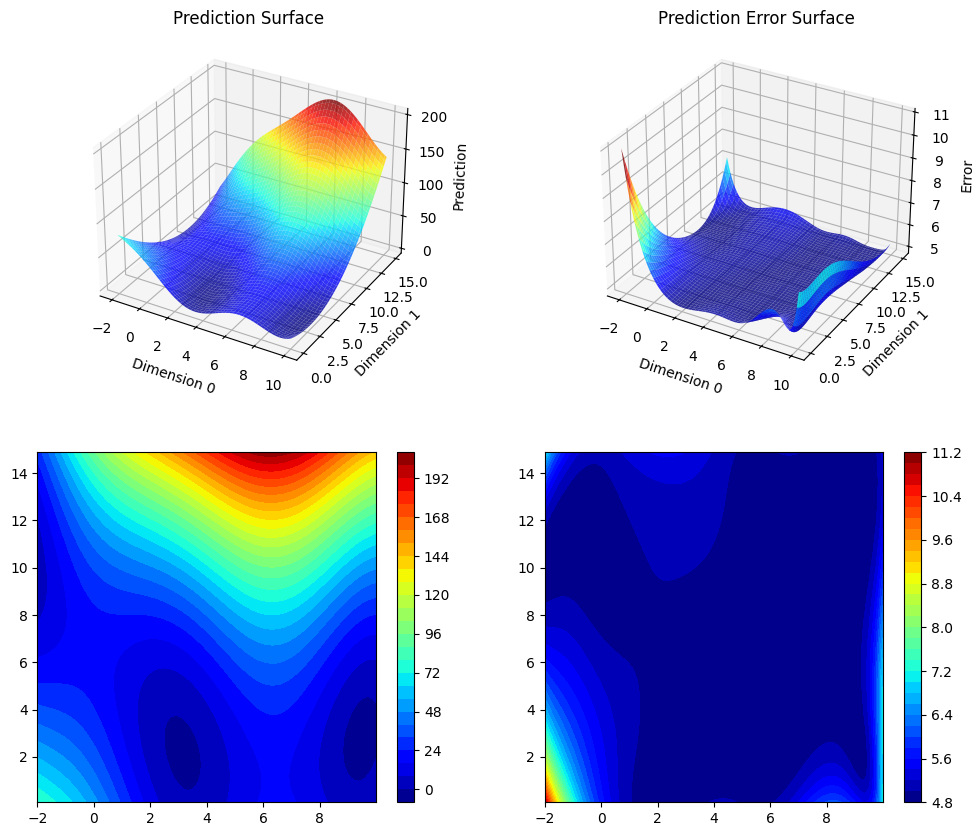

In [14]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import spot
from spotpython.utils.init import (
     fun_control_init, surrogate_control_init, design_control_init
 )
fun_control = fun_control_init(
     lower=np.array([-2, 0, 0]),
     upper=np.array([10, 15, 3]),
     fun_evals=100,
     var_type=["num", "num", "factor"],  # Specify variable types
 )
design_control = design_control_init(init_size=90)
surrogate_control = surrogate_control_init(n_theta="anisotropic", method="interpolation")
S = spot.Spot(
     fun=Analytical().fun_branin_factor,
     fun_control=fun_control,
     design_control=design_control,
     surrogate_control=surrogate_control
 )
S.run()
S.plot_contour(i=0, j=1, title="", contour_levels=25, n_grid=100, show=True)


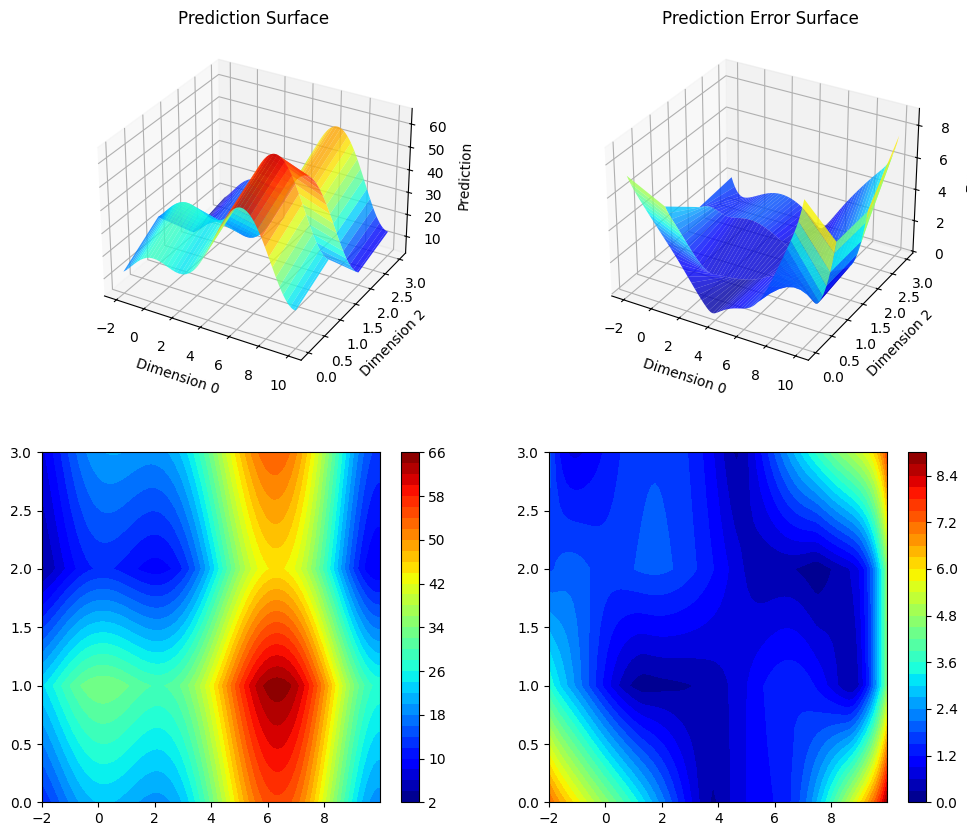

In [15]:
S.plot_contour(i=0, j=2, title="", contour_levels=25, n_grid=100, show=True)

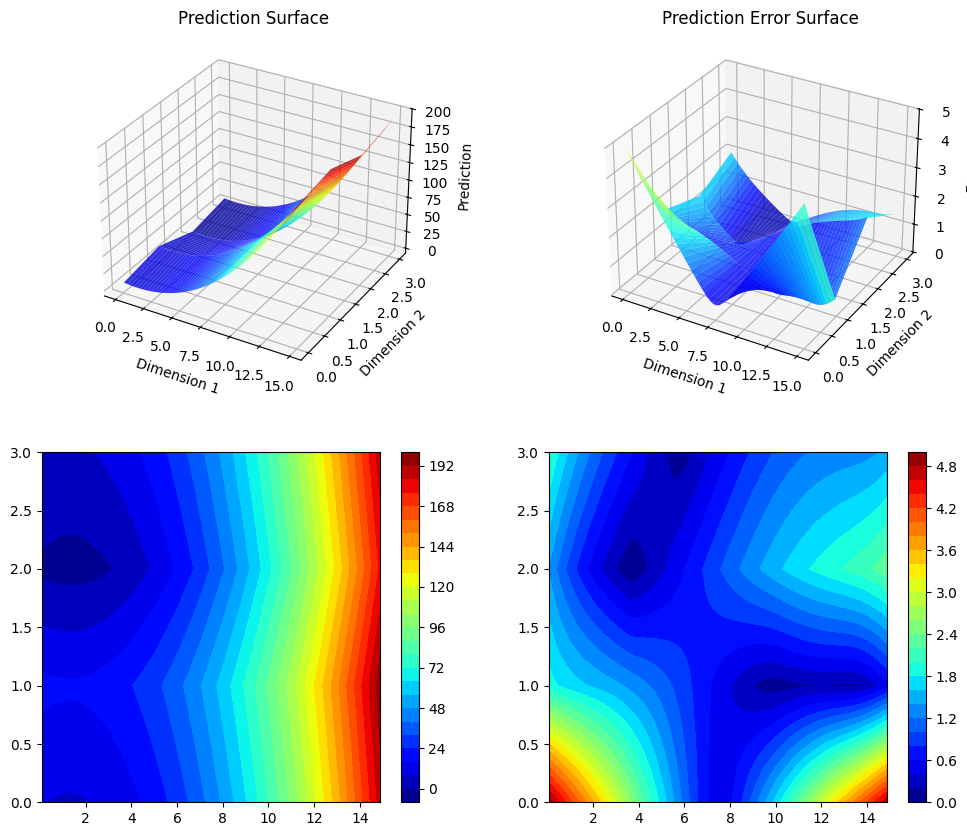

In [16]:
S.plot_contour(i=1, j=2, title="", contour_levels=25, n_grid=100, show=True)